# __Northwind Traders Project__ 📈
- Sales & order data for Northwind Traders, a fictitious gourmet food supplier, 
including information on customers, products, orders, shippers, and employees.

# **PACE stages**

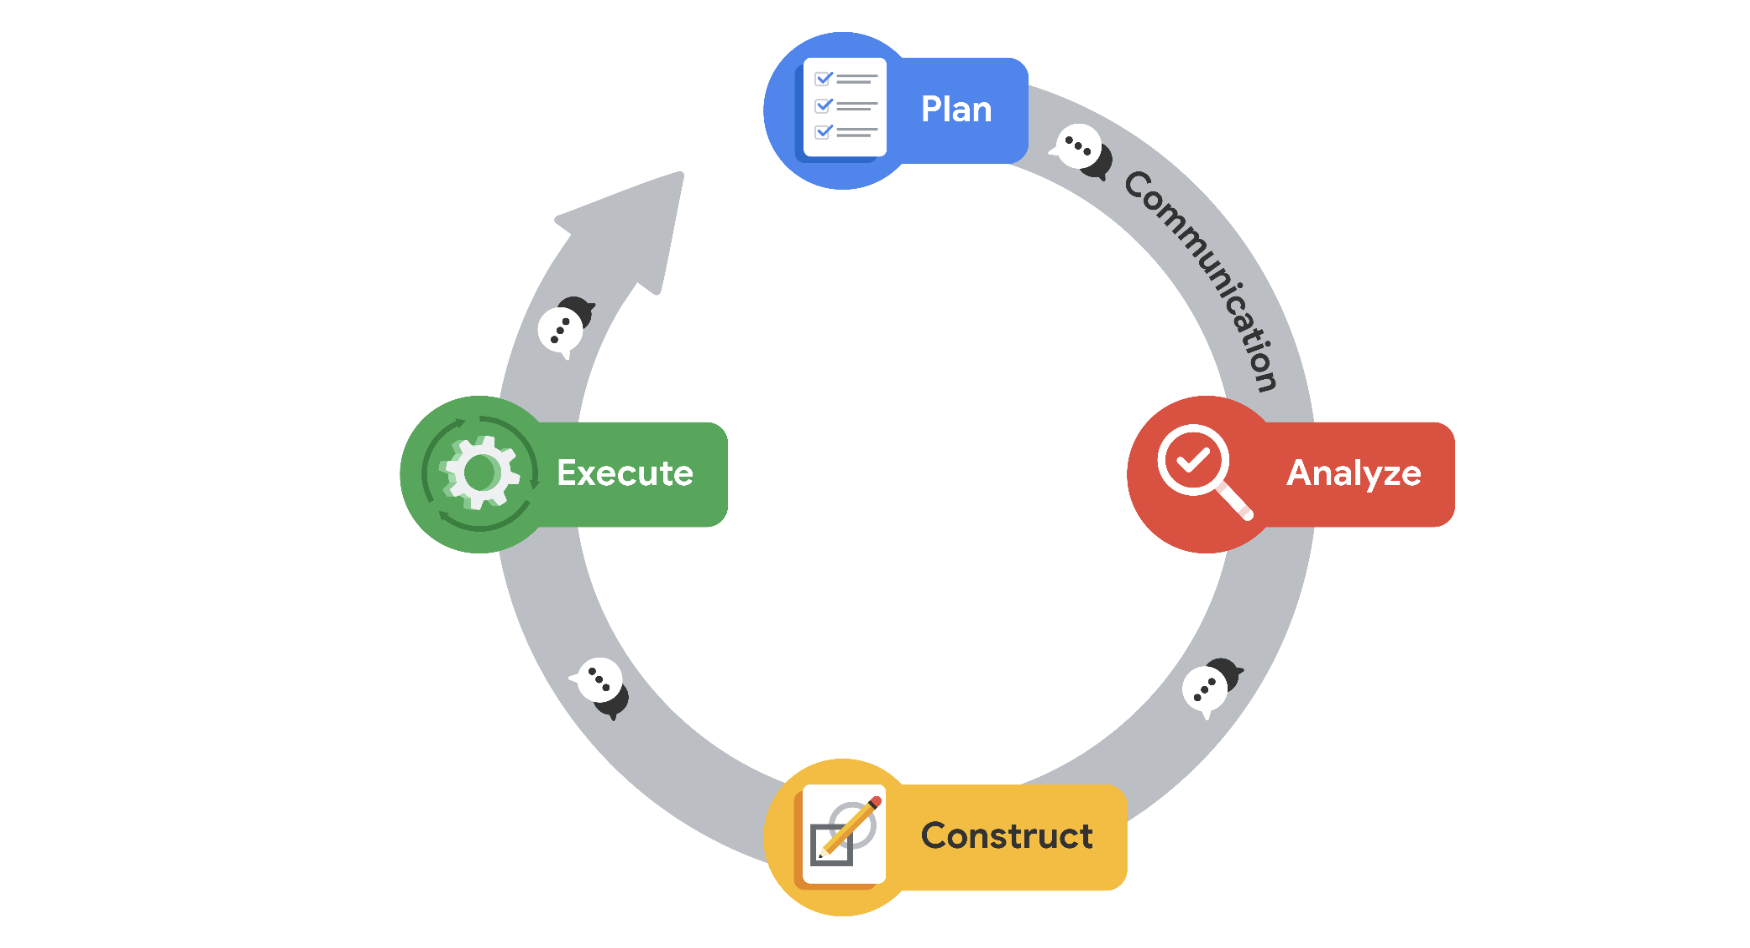

# __🟦Plan__

__understanding the business needs:__

- Extract valuable insights from the data
- Try to figure out how we can enhance the business
- Find any problem that is facing the business
- provide data-driven suggestions based on your understanding of the data
- provide useful recommendations for helping to improve the business

__Recommended Analysis:__

- Are there any noticable sales trends over time?
- Which are the best and worst selling products?
- Can you identify any key customers?
- Are shipping costs consistent across providers?

In [1]:
# Import Packages
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from dash import Dash , html , dcc
from jupyter_dash import JupyterDash
from dash.dependencies import Input , Output
import dash_bootstrap_components as dbc
from dash_bootstrap_templates import load_figure_template
from dash.exceptions import PreventUpdate
import dash_mantine_components as dmc

import re
from datetime import datetime

In [2]:
# Create a Function To access the datasets Easily

def read_data(data_name = 'Unknown'):

    '''
       Could you just put any word from the path of your data 
       and also could you see all the paths of the data 
       by give the fuction what you want data or dirctions
    '''

    dfORdir = input('Do you wanna show the dirctions or data: ').strip().lower() # Enter ('dirctions' , 'dir' , 'paths') if you wanna see the dirctions and ('data' ,'datasets' , 'df' , 'd') for select the datafram

    for path in os.listdir('Data'): #Iterate on all paths

        if dfORdir in ['dirctions' , 'dir' , 'paths'] :

            print(path)             

        elif  dfORdir in ['data' ,'datasets' , 'df' , 'd']:
             
             if str(data_name) in path : # Extract the path

                return pd.read_csv(f'Data/{str(path)}' ,  encoding=('ISO-8859-1'))

In [3]:
# load the datasets
orders = read_data('orders')
customers = read_data('customers')
employees = read_data('employees')
order_details = read_data('order_details')
products = read_data('products')
categories = read_data('categories')
shippers = read_data('shippers')

In [4]:
Description = read_data('data_dictionary')
Description

Table            Field  \
0          orders          orderID   
1          orders       customerID   
2          orders       employeeID   
3          orders        orderDate   
4          orders     requiredDate   
5          orders      shippedDate   
6          orders        shipperID   
7          orders          freight   
8   order_details          orderID   
9   order_details        productID   
10  order_details        unitPrice   
11  order_details         quantity   
12  order_details         discount   
13      customers       customerID   
14      customers      companyName   
15      customers      contactName   
16      customers     contactTitle   
17      customers             city   
18      customers          country   
19       products        productID   
20       products      productName   
21       products  quantityPerUnit   
22       products        unitPrice   
23       products     discontinued   
24       products       categoryID   
25     categories       categoryID   
26     categories     categoryName   
27     categories      description   
28      employees       employeeID   
29      employees     employeeName   
30      employees            title   
31      employees             city   
32      employees          country   
33      employees        reportsTo   
34       shippers        shipperID   
35       shippers      companyName   

                                          Description  
0                    Unique identifier for each order  
1                   The customer who placed the order  
2                The employee who processed the order  
3                  The date when the order was placed  
4   The date when the customer requested the order...  
5                 The date when the order was shipped  
6   The ID of the shipping company used for the order  
7               The shipping cost for the order (USD)  
8          The ID of the order this detail belongs to  
9                 The ID of the product being ordered  
10  The price per unit of the product at the time ...  
11                  The number of units being ordered  
12  The discount percentage applied to the price p...  
13                Unique identifier for each customer  
14                 The name of the customer's company  
15   The name of the primary contact for the customer  
16  The job title of the primary contact for the c...  
17             The city where the customer is located  
18          The country where the customer is located  
19                 Unique identifier for each product  
20                            The name of the product  
21            The quantity of the product per package  
22    The current price per unit of the product (USD)  
23  Indicates with a 1 if the product has been dis...  
24      The ID of the category the product belongs to  
25        Unique identifier for each product category  
26                           The name of the category  
27     A description of the category and its products  
28                Unique identifier for each employee  
29                          Full name of the employee  
30                           The employee's job title  
31                  The city where the employee works  
32               The country where the employee works  
33                   The ID of the employee's manager  
34                 Unique identifier for each shipper  
35  The name of the company that provides shipping...

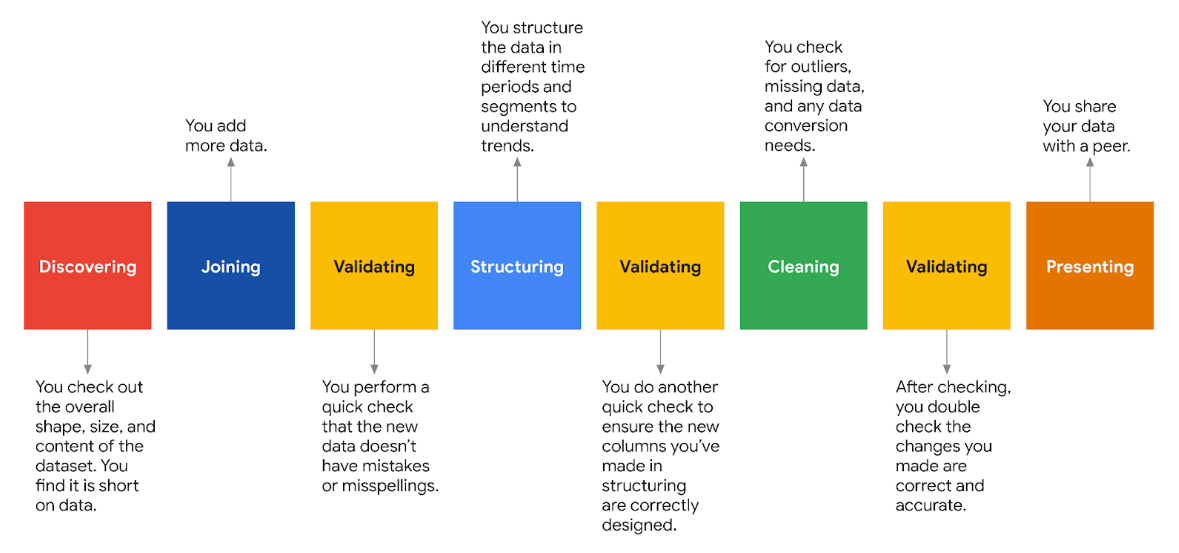

Discovering: You check out the overall shape, size, and content of the dataset. You find it is short on data. 

Joining: You add more data.

Validating: You perform a quick check that the new data doesn’t have mistakes or misspellings. 

Structuring: You structure the data in different time periods and segments to understand trends. 

Validating: You do another quick check to ensure the new columns you’ve made in structuring are correctly designed. 

Cleaning: You check for outliers, missing data, and needs for conversions or transformations. 

Validating: After cleaning, you double check the changes you made are correct and accurate. 

Presenting: You share your dataset with a peer.

- There's no specific arrangement of the steps and it can be iterative

---
---
---

# __🟥Analyze__

__Joining__|
---

I'll start by joining because I have multiple tables I want to merge them all together to be easier to work with

In [13]:
# First, let's describe the orders table which is the main table to understand the variables
orders.describe(include='all')

orderID customerID  employeeID   orderDate requiredDate  \
count     830.000000        830  830.000000         830          830   
unique           NaN         89         NaN         480          454   
top              NaN      SAVEA         NaN  2015-02-26   2015-03-26   
freq             NaN         31         NaN           6            7   
mean    10662.500000        NaN    4.403614         NaN          NaN   
std       239.744656        NaN    2.499648         NaN          NaN   
min     10248.000000        NaN    1.000000         NaN          NaN   
25%     10455.250000        NaN    2.000000         NaN          NaN   
50%     10662.500000        NaN    4.000000         NaN          NaN   
75%     10869.750000        NaN    7.000000         NaN          NaN   
max     11077.000000        NaN    9.000000         NaN          NaN   

       shippedDate   shipperID      freight  
count          809  830.000000   830.000000  
unique         387         NaN          NaN  
top     2015-04-10         NaN          NaN  
freq             8         NaN          NaN  
mean           NaN    2.007229    78.244205  
std            NaN    0.779685   116.779294  
min            NaN    1.000000     0.020000  
25%            NaN    1.000000    13.380000  
50%            NaN    2.000000    41.360000  
75%            NaN    3.000000    91.430000  
max            NaN    3.000000  1007.640000

the orders table has 1 primary key columns (order ID) and 2 foreign key (employee ID ,shipping ID).

that means each row has a unique order ID we can use this column to merge the others table with it.

In [5]:
# Merge each primary key with foreign key
pd.set_option('display.max_columns',None) # To display all columns
df = orders.merge(order_details , on='orderID',how='left')\
            .merge(customers , on='customerID' , how='right' )\
            .merge(categories.merge(products , on='categoryID',how='left') , on='productID' , how='right' ,suffixes=['_orders','_products'])\
            .merge(employees , on='employeeID' , how='right',suffixes=['_customer','_employees'])\
            .merge(shippers , on='shipperID' , how='right' , suffixes=['_orders','_shippers'])


1- Merging the primary key (OrderID) of the orders table with the foreign key (OrderID) of order_details so I used left join.

2- Merging the foreign key (customerID) of the orders table with the primary key (customerID) of order_details so I used right join.

3- First I Merged the primary key (categoryID) of the categories table with the foreign key (categoryID) of products so I used left join,
Second I Merged the foreign key (productID) of order_details with the primary key (productID) of that merged table above so I used right join.

4- Merging the foreign key (employeeID) of the orders table with the primary key (employeeID) of employees so I used right join.

5- Merging the foreign key (shipperID) of the orders table with the primary key (shipperID) of shippers so I used right join.


---

__Discovering__|
---

In [7]:
df.head()

orderID customerID  employeeID   orderDate requiredDate shippedDate  \
0  10258.0      ERNSH         1.0  2013-07-17   2013-08-14  2013-07-23   
1  10991.0      QUICK         1.0  2015-04-01   2015-04-29  2015-04-07   
2  10813.0      RICAR         1.0  2015-01-05   2015-02-02  2015-01-09   
3  10469.0      WHITC         1.0  2014-03-10   2014-04-07  2014-03-14   
4  11027.0      BOTTM         1.0  2015-04-16   2015-05-14  2015-04-20   

   shipperID  freight  productID  unitPrice_orders  quantity  discount  \
0        1.0   140.51        2.0              15.2      50.0      0.20   
1        1.0    38.51        2.0              19.0      50.0      0.20   
2        1.0    47.38        2.0              19.0      12.0      0.20   
3        1.0    60.18        2.0              15.2      40.0      0.15   
4        1.0    52.52       24.0               4.5      30.0      0.25   

      companyName_orders        contactName           contactTitle  \
0           Ernst Handel      Roland Mendel          Sales Manager   
1             QUICK-Stop        Horst Kloss     Accounting Manager   
2     Ricardo Adocicados     Janete Limeira  Assistant Sales Agent   
3   White Clover Markets     Karl Jablonski                  Owner   
4  Bottom-Dollar Markets  Elizabeth Lincoln     Accounting Manager   

    city_customer country_customer  categoryID categoryName  \
0            Graz          Austria           1    Beverages   
1       Cunewalde          Germany           1    Beverages   
2  Rio de Janeiro           Brazil           1    Beverages   
3         Seattle              USA           1    Beverages   
4       Tsawassen           Canada           1    Beverages   

                                   description         productName  \
0  Soft drinks, coffees, teas, beers, and ales               Chang   
1  Soft drinks, coffees, teas, beers, and ales               Chang   
2  Soft drinks, coffees, teas, beers, and ales               Chang   
3  Soft drinks, coffees, teas, beers, and ales               Chang   
4  Soft drinks, coffees, teas, beers, and ales  Guarana Fantastica   

      quantityPerUnit  unitPrice_products  discontinued   employeeName  \
0  24 - 12 oz bottles                19.0             0  Nancy Davolio   
1  24 - 12 oz bottles                19.0             0  Nancy Davolio   
2  24 - 12 oz bottles                19.0             0  Nancy Davolio   
3  24 - 12 oz bottles                19.0             0  Nancy Davolio   
4    12 - 355 ml cans                 4.5             1  Nancy Davolio   

                  title city_employees country_employees  reportsTo  \
0  Sales Representative       New York               USA        8.0   
1  Sales Representative       New York               USA        8.0   
2  Sales Representative       New York               USA        8.0   
3  Sales Representative       New York               USA        8.0   
4  Sales Representative       New York               USA        8.0   

  companyName_shippers  
0       Speedy Express  
1       Speedy Express  
2       Speedy Express  
3       Speedy Express  
4       Speedy Express

In [8]:
# I'll minimize the memory usage later by changing the data type for each column
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   orderID               2155 non-null   float64
 1   customerID            2155 non-null   object 
 2   employeeID            2155 non-null   float64
 3   orderDate             2155 non-null   object 
 4   requiredDate          2155 non-null   object 
 5   shippedDate           2082 non-null   object 
 6   shipperID             2155 non-null   float64
 7   freight               2155 non-null   float64
 8   productID             2155 non-null   float64
 9   unitPrice_orders      2155 non-null   float64
 10  quantity              2155 non-null   float64
 11  discount              2155 non-null   float64
 12  companyName_orders    2155 non-null   object 
 13  contactName           2155 non-null   object 
 14  contactTitle          2155 non-null   object 
 15  city_customer        

In [9]:
df.shape

(2155, 30)

In [10]:
# 2155 * 30
df.size

64650

In [11]:
# Over view of the data
desc = df.describe(include='all').round(2)
desc

orderID customerID  employeeID   orderDate requiredDate shippedDate  \
count    2155.00       2155     2155.00        2155         2155        2082   
unique       NaN         89         NaN         480          454         387   
top          NaN      SAVEA         NaN  2015-05-06   2015-06-03  2015-04-10   
freq         NaN        116         NaN          32           32          21   
mean    10659.38        NaN        4.33         NaN          NaN         NaN   
std       241.38        NaN        2.49         NaN          NaN         NaN   
min     10248.00        NaN        1.00         NaN          NaN         NaN   
25%     10451.00        NaN        2.00         NaN          NaN         NaN   
50%     10657.00        NaN        4.00         NaN          NaN         NaN   
75%     10862.50        NaN        7.00         NaN          NaN         NaN   
max     11077.00        NaN        9.00         NaN          NaN         NaN   

        shipperID  freight  productID  unitPrice_orders  quantity  discount  \
count     2155.00  2155.00    2155.00           2155.00   2155.00   2155.00   
unique        NaN      NaN        NaN               NaN       NaN       NaN   
top           NaN      NaN        NaN               NaN       NaN       NaN   
freq          NaN      NaN        NaN               NaN       NaN       NaN   
mean         2.00    96.20      40.79             26.22     23.81      0.06   
std          0.77   133.01      22.16             29.83     19.02      0.08   
min          1.00     0.02       1.00              2.00      1.00      0.00   
25%          1.00    19.61      22.00             12.00     10.00      0.00   
50%          2.00    53.80      41.00             18.40     20.00      0.00   
75%          3.00   120.92      60.00             32.00     30.00      0.10   
max          3.00  1007.64      77.00            263.50    130.00      0.25   

        companyName_orders     contactName          contactTitle  \
count                 2155            2155                  2155   
unique                  89              89                    12   
top     Save-a-lot Markets  Jose Pavarotti  Sales Representative   
freq                   116             116                   414   
mean                   NaN             NaN                   NaN   
std                    NaN             NaN                   NaN   
min                    NaN             NaN                   NaN   
25%                    NaN             NaN                   NaN   
50%                    NaN             NaN                   NaN   
75%                    NaN             NaN                   NaN   
max                    NaN             NaN                   NaN   

       city_customer country_customer  categoryID categoryName  \
count           2155             2155     2155.00         2155   
unique            69               21         NaN            8   
top            Boise              USA         NaN    Beverages   
freq             116              352         NaN          404   
mean             NaN              NaN        4.14          NaN   
std              NaN              NaN        2.38          NaN   
min              NaN              NaN        1.00          NaN   
25%              NaN              NaN        2.00          NaN   
50%              NaN              NaN        4.00          NaN   
75%              NaN              NaN        6.00          NaN   
max              NaN              NaN        8.00          NaN   

                                        description           productName  \
count                                          2155                  2155   
unique                                            8                    77   
top     Soft drinks, coffees, teas, beers, and ales  Raclette Courdavault   
freq                                            404                    54   
mean                                            NaN                   NaN   
std                        

In [12]:
df.select_dtypes(exclude='number').describe().shape

(4, 18)

Many information here but there're variables that should be converted data type to get better info.

info :
- number of unique orderID __830__ and most frequent 11077 = __25__ have __0.011__ % of total
- number of unique customerID __89__ and most frequent SAVEA = __116__ have __0.05__ % of total
- number of unique employeeID __9__ and most frequent 4 = __420__ have __0.19__ % of total
- number of unique orderDate __480__ and most frequent 2015-05-06 = __32__ have __0.014__ % of total
- number of unique requiredDate __454__ and most frequent 2015-06-03 = __32__ have __0.014__ % of total
- number of unique shippedDate __387__ and most frequent 2015-04-10 = __21__ have __0.009__ % of total and NaN requiredDate __0.033__ of total

It's 30😅 column so let us use a loop to automate this task

In [13]:
# Extract number of unique and most frequent and % of total for each column from describe table
for col in desc.columns:
    unique = df[col].nunique() if str(desc.loc['unique',col]) == 'nan' else  desc.loc['unique',col] 
    top = df[col].value_counts().idxmax() if str(desc.loc['top',col]) == 'nan' else  desc.loc['top',col]
    freq =  df[col].value_counts().max() if str(desc.loc['freq',col]) == 'nan' else  desc.loc['freq',col]
    precantage = df[col].value_counts(normalize=True).max()

    print(f'number of unique "{col}" => |{unique}| and most frequent {top} =>  |{freq}| have  |{precantage.round(3)}%| of total')
    print('=' * 100)

"""
This loop will be very help full with categorical variables but won't be with numerical variables
"""    

number of unique "orderID" => |830| and most frequent 11077.0 =>  |25| have  |0.012%| of total
number of unique "customerID" => |89| and most frequent SAVEA =>  |116| have  |0.054%| of total
number of unique "employeeID" => |9| and most frequent 4.0 =>  |420| have  |0.195%| of total
number of unique "orderDate" => |480| and most frequent 2015-05-06 =>  |32| have  |0.015%| of total
number of unique "requiredDate" => |454| and most frequent 2015-06-03 =>  |32| have  |0.015%| of total
number of unique "shippedDate" => |387| and most frequent 2015-04-10 =>  |21| have  |0.01%| of total
number of unique "shipperID" => |3| and most frequent 2.0 =>  |864| have  |0.401%| of total
number of unique "freight" => |799| and most frequent 8.53 =>  |25| have  |0.012%| of total
number of unique "productID" => |77| and most frequent 59.0 =>  |54| have  |0.025%| of total
number of unique "unitPrice_orders" => |116| and most frequent 18.0 =>  |102| have  |0.047%| of total
number of unique "quantity" => |5

"\nThis loop will be very help full with categorical variables but won't be with numerical variables\n"

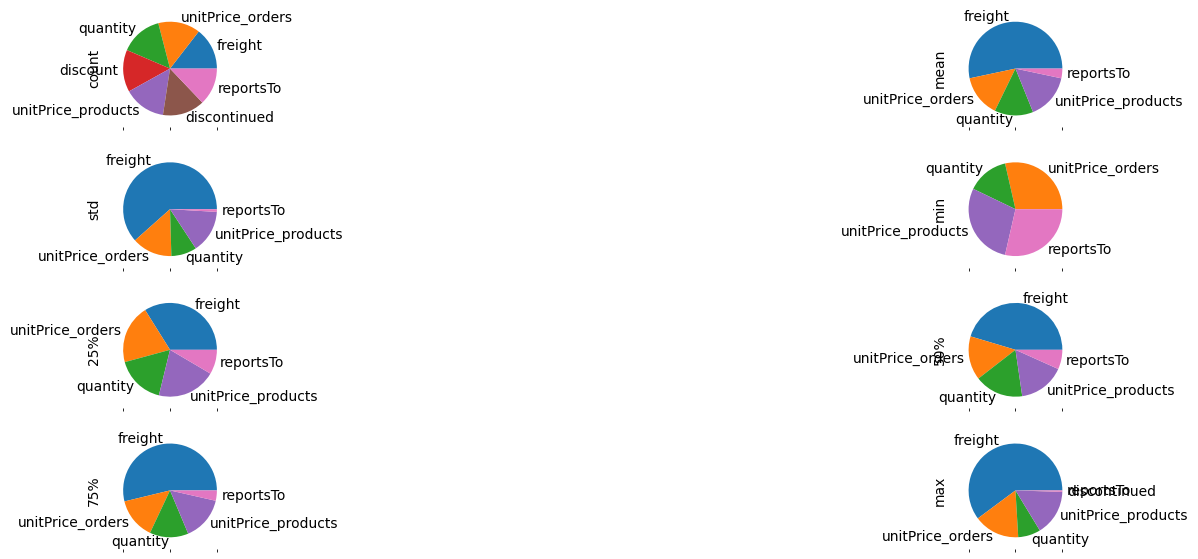

In [14]:
# Select the number columns that not contains 'ID'
df[[col for col in df.select_dtypes('number').columns if 'ID' not in col ]].describe().round().T.plot.pie(subplots=True,
                                                                                                        figsize=(20,7),
                                                                                                        layout=(4,2),
                                                                                                        legend=False,
                                                                                                        );

In [15]:
pd.set_option('display.float_format','{:.2f}'.format)
df[[col for col in df.select_dtypes('number').columns if 'ID' not in col ]].describe().style.bar(color='gray' ,axis=1).format('{:.2f}')


__Info:__
- freight : 
            
            The average of shipping cost for ordre is 96.20.

            The stand deviation of shipping cost is 133.01 that means there are high dispersion between the values.

            The mean is > the median which indicates there is right skew and might be outliers in the right of the distribution.

            The minimum value of shipping is 0.02 and the maximum value is 1007 and the median is 53 so it is obvious this is not a normal distribution and there are outliers

            50% of the shipping cost falls or equal  53 and the 75% is 120

            From 120 to 1007 of shipping cost it's the last 25% which means (under 75% of shipping cost is 120 and above 75% between 120 to 1007)
            
- We will do the same for each column
- but over all the rest of the columns didn't have abnormal values like the freight column we'll discuss that more in-depth later

---

__Cleaning__|
---

__Chick Missing Values__

In [16]:
#Showing the missing values for each table
for data in os.listdir('Data'):
    print(data[:data.index('.')],':')
    print(pd.read_csv(f'Data/{str(data)}' ,  encoding=('ISO-8859-1')).isna().sum())
    print('-'*50)
"""
NOTE:
    We have missing values before implementing marge in just two table 
    employees table in reportsTo column => 1
    orders table in shipped date  column => 21
    so it will have an effect on the merging
"""

categories :
categoryID      0
categoryName    0
description     0
dtype: int64
--------------------------------------------------
customers :
customerID      0
companyName     0
contactName     0
contactTitle    0
city            0
country         0
dtype: int64
--------------------------------------------------
data_dictionary :
Table          0
Field          0
Description    0
dtype: int64
--------------------------------------------------
employees :
employeeID      0
employeeName    0
title           0
city            0
country         0
reportsTo       1
dtype: int64
--------------------------------------------------
Northwind :
Unnamed: 0                            0
orderID                               0
customerID                            0
employeeID                            0
orderDate                             0
requiredDate                          0
shippedDate                           0
shipperID                             0
freight                             

'\nNOTE:\n    We have missing values before implementing marge in just two table \n    employees table in reportsTo column => 1\n    orders table in shipped date  column => 21\n    so it will have an effect on the merging\n'

In [17]:
orders.loc[orders.shippedDate.isna()] 

orderID customerID  employeeID   orderDate requiredDate shippedDate  \
760    11008      ERNSH           7  2015-04-08   2015-05-06         NaN   
771    11019      RANCH           6  2015-04-13   2015-05-11         NaN   
791    11039      LINOD           1  2015-04-21   2015-05-19         NaN   
792    11040      GREAL           4  2015-04-22   2015-05-20         NaN   
797    11045      BOTTM           6  2015-04-23   2015-05-21         NaN   
803    11051      LAMAI           7  2015-04-27   2015-05-25         NaN   
806    11054      CACTU           8  2015-04-28   2015-05-26         NaN   
810    11058      BLAUS           9  2015-04-29   2015-05-27         NaN   
811    11059      RICAR           2  2015-04-29   2015-06-10         NaN   
813    11061      GREAL           4  2015-04-30   2015-06-11         NaN   
814    11062      REGGC           4  2015-04-30   2015-05-28         NaN   
817    11065      LILAS           8  2015-05-01   2015-05-29         NaN   
820    11068      QUEEN           8  2015-05-04   2015-06-01         NaN   
822    11070      LEHMS           2  2015-05-05   2015-06-02         NaN   
823    11071      LILAS           1  2015-05-05   2015-06-02         NaN   
824    11072      ERNSH           4  2015-05-05   2015-06-02         NaN   
825    11073      PERIC           2  2015-05-05   2015-06-02         NaN   
826    11074      SIMOB           7  2015-05-06   2015-06-03         NaN   
827    11075      RICSU           8  2015-05-06   2015-06-03         NaN   
828    11076      BONAP           4  2015-05-06   2015-06-03         NaN   
829    11077      RATTC           1  2015-05-06   2015-06-03         NaN   

     shipperID  freight  
760          3    79.46  
771          3     3.17  
791          2    65.00  
792          3    18.84  
797          2    70.58  
803          3     2.79  
806          1     0.33  
810          3    31.14  
811          2    85.80  
813          3    14.01  
814          2    29.93  
817          1    12.91  
820          2    81.75  
822          1   136.00  
823          1     0.93  
824          2   258.64  
825          2    24.95  
826          2    18.44  
827          2     6.19  
828          2    38.28  
829          2     8.53

In [18]:
employees[employees.reportsTo.isna()]

employeeID   employeeName                 title      city country  \
1           2  Andrew Fuller  Vice President Sales  New York     USA   

   reportsTo  
1        NaN

In [19]:
# We can drop them because it's not a big number in the reportsTo column but we will leave it without drop it and for shippedDate I'll fill it by the most frequent value

pd.concat([df.isna().sum() , round(df.isna().sum() / len(df),2) * 100] , axis=1 , keys=['Total_missing','Ratio_missing']).sort_values(by='Ratio_missing',ascending=False)

Total_missing  Ratio_missing
reportsTo                       241          11.00
shippedDate                      73           3.00
orderID                           0           0.00
country_customer                  0           0.00
country_employees                 0           0.00
city_employees                    0           0.00
title                             0           0.00
employeeName                      0           0.00
discontinued                      0           0.00
unitPrice_products                0           0.00
quantityPerUnit                   0           0.00
productName                       0           0.00
description                       0           0.00
categoryName                      0           0.00
categoryID                        0           0.00
city_customer                     0           0.00
customerID                        0           0.00
contactTitle                      0           0.00
contactName                       0           0.00
companyName_orders                0           0.00
discount                          0           0.00
quantity                          0           0.00
unitPrice_orders                  0           0.00
productID                         0           0.00
freight                           0           0.00
shipperID                         0           0.00
requiredDate                      0           0.00
orderDate                         0           0.00
employeeID                        0           0.00
companyName_shippers              0           0.00

In [15]:
# Fill by most frq
df.shippedDate = df.shippedDate.fillna(df.shippedDate.value_counts().idxmax())

# Check if there're still null values
df.shippedDate.isna().sum()

0

__Check Duplicates__

In [21]:
# There aren't duplications found
df.duplicated().sum()

0

In [22]:
# Show each column and its duplicates to see if there are abnormal duplicates
[{col:df.duplicated(subset=[col]).sum()} for col in df.columns]

[{'orderID': 1325},
 {'customerID': 2066},
 {'employeeID': 2146},
 {'orderDate': 1675},
 {'requiredDate': 1701},
 {'shippedDate': 1768},
 {'shipperID': 2152},
 {'freight': 1356},
 {'productID': 2078},
 {'unitPrice_orders': 2039},
 {'quantity': 2100},
 {'discount': 2144},
 {'companyName_orders': 2066},
 {'contactName': 2066},
 {'contactTitle': 2143},
 {'city_customer': 2086},
 {'country_customer': 2134},
 {'categoryID': 2147},
 {'categoryName': 2147},
 {'description': 2147},
 {'productName': 2078},
 {'quantityPerUnit': 2085},
 {'unitPrice_products': 2093},
 {'discontinued': 2153},
 {'employeeName': 2146},
 {'title': 2152},
 {'city_employees': 2153},
 {'country_employees': 2153},
 {'reportsTo': 2151},
 {'companyName_shippers': 2152}]

__Check Outliers__

In [6]:
# Number of outliers in each columns using IQR
def outliers(data):
      
        # Create Dataframe to showing number of outliers for each column 
        dic = {}
        for col in data.select_dtypes('number').columns:
            IQR = data[col].quantile(.75) - data[col].quantile(.25)
            lower = data[col].quantile(.25) - 1.5 * IQR
            upper = data[col].quantile(.75) + 1.5 * IQR
            num = data.loc[(data[col] < lower) | (data[col] > upper),col].count() 
            ratio = round((num / len(df) ) * 100 , 2)
            dic.update({col :{'num_outliers':num, 'ratio_outliers':ratio}})

        return pd.DataFrame({'columns':dic.keys(),
                             'num_outliers':[values['num_outliers'] for  values in dic.values()],
                             'ratio_outliers':[value['ratio_outliers'] for  value in dic.values()]}).sort_values(by='ratio_outliers' , ascending=False) 

         
outliers(df)

columns  num_outliers  ratio_outliers
10        discontinued           228           10.58
3              freight           155            7.19
5     unitPrice_orders            98            4.55
6             quantity            87            4.04
9   unitPrice_products            77            3.57
0              orderID             0            0.00
1           employeeID             0            0.00
2            shipperID             0            0.00
4            productID             0            0.00
7             discount             0            0.00
8           categoryID             0            0.00
11           reportsTo             0            0.00

In [8]:
from scipy.stats import zscore
# Number of outliers in each columns using zscore
def zscore_outliers(data):
      
        # Create Dataframe to showing number of outliers for each column 
        dic = {}
        for col in data.select_dtypes('number').columns:
            lower = data[col].mean() - data[col].std() * 3
            upper = data[col].mean() + data[col].std() * 3
            num = data.loc[(data[col] < lower) | (data[col] > upper),col].count() 
            ratio = round((num / len(df) ) * 100 , 2)
            dic.update({col :{'num_outliers':num, 'ratio_outliers':ratio}})

        return pd.DataFrame({'columns':dic.keys(),
                             'num_outliers':[values['num_outliers'] for  values in dic.values()],
                             'ratio_outliers':[value['ratio_outliers'] for  value in dic.values()]}).sort_values(by='ratio_outliers' , ascending=False) 

         
zscore_outliers(df)  

columns  num_outliers  ratio_outliers
9   unitPrice_products            56            2.60
5     unitPrice_orders            46            2.13
3              freight            45            2.09
6             quantity            30            1.39
0              orderID             0            0.00
1           employeeID             0            0.00
2            shipperID             0            0.00
4            productID             0            0.00
7             discount             0            0.00
8           categoryID             0            0.00
10        discontinued             0            0.00
11           reportsTo             0            0.00

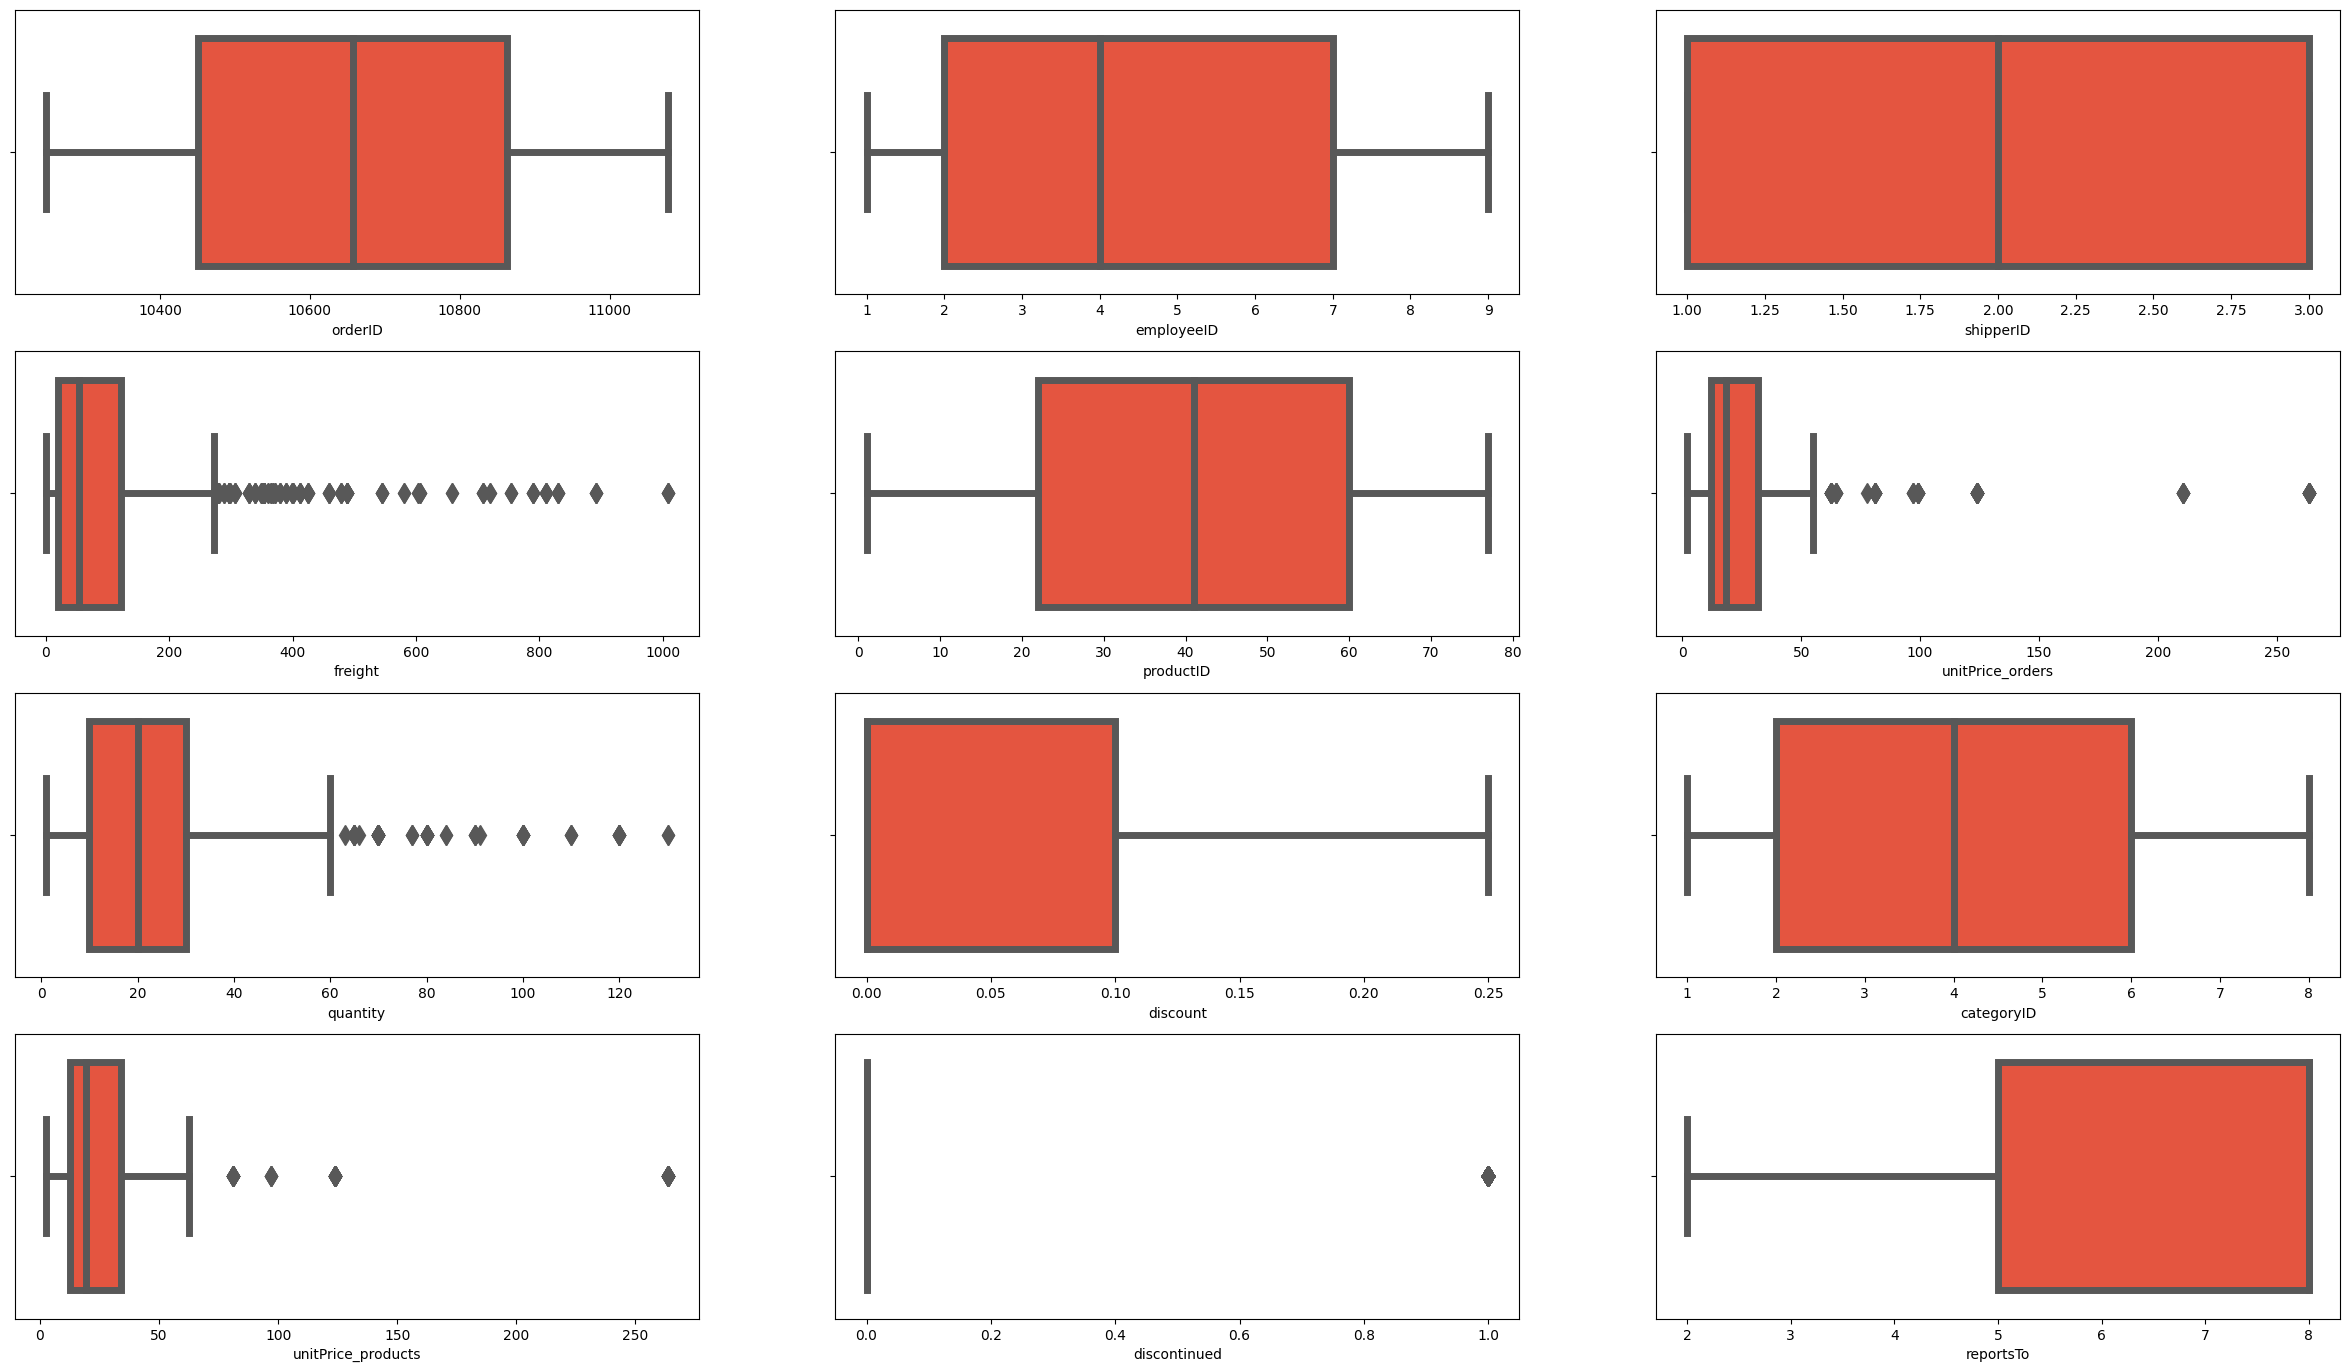

In [25]:
# showing the outliers by boxplot for numerical variables
fig = plt.figure(figsize=(30,17))
for n,col in enumerate(df.select_dtypes('number').columns):
    ax = fig.add_subplot(4,3,n + 1)
    sns.boxplot(x=df[col] , ax=ax , fliersize=10, linewidth=5 ,color='#ff4125')

In [26]:
def select_outliers(data):
    """ 
    this function takes two inputs the first one asks you if want to show all data frame or just a series and
    the second input is the column that you want to select outliers,
    Parameter: only the dataset  
    """
    
    # Choose Select all or column
    
    ask = input('Do you wanna select all outliers or particular column: ').strip().lower()
    column_name = input(f'Put the column name that you wanna select: ').split()
    column_name = ''.join(column_name) # Convert from list to string

    try:
        # Select Outliers and print the whole dataset
        if ask in ['all','a']:
            IQR = data[column_name].quantile(.75) - data[column_name].quantile(.25)
            lower = data[column_name].quantile(.25) - 1.5 * IQR
            upper = data[column_name].quantile(.75) + 1.5 * IQR
            return data[(data[column_name] < lower) | (data[column_name] > upper)]
        
        # Select Outliers and print the series of column
        elif ask in ['column','c']:
            IQR = data[column_name].quantile(.75) - data[column_name].quantile(.25)
            lower = data[column_name].quantile(.25) - 1.5 * IQR
            upper = data[column_name].quantile(.75) + 1.5 * IQR
            return data.loc[(data[column_name] < lower) | (data[column_name] > upper), column_name]
        
        else:

            print('Please Enter column or all')
    
    # If you put categorical column let you try again
    except:
        print('Please Enter Numrical Column Try Again ')  
        ask = input('Do you wanna select all outliers or particular column: ').strip().lower()
        column_name = input(f'Put the column name that you wanna select: ').split()
        column_name = ''.join(column_name) # Convert from list to string  
             

select_outliers(df)

orderID customerID  employeeID   orderDate requiredDate shippedDate  \
107  10865.00      QUICK        2.00  2015-02-02   2015-02-16  2015-02-12   
108  10865.00      QUICK        2.00  2015-02-02   2015-02-16  2015-02-12   
187  11021.00      QUICK        3.00  2015-04-14   2015-05-12  2015-04-21   
194  10762.00      FOLKO        3.00  2014-12-02   2014-12-30  2014-12-09   
214  11021.00      QUICK        3.00  2015-04-14   2015-05-12  2015-04-21   
...       ...        ...         ...         ...          ...         ...   
2061 10694.00      QUICK        8.00  2014-10-06   2014-11-03  2014-10-09   
2087 10694.00      QUICK        8.00  2014-10-06   2014-11-03  2014-10-09   
2105 10694.00      QUICK        8.00  2014-10-06   2014-11-03  2014-10-09   
2126 10889.00      RATTC        9.00  2015-02-16   2015-03-16  2015-02-23   
2137 10889.00      RATTC        9.00  2015-02-16   2015-03-16  2015-02-23   

      shipperID  freight  productID  unitPrice_orders  quantity  discount  \
107        1.00   348.14      38.00            263.50     60.00      0.05   
108        1.00   348.14      39.00             18.00     80.00      0.05   
187        1.00   297.18       2.00             19.00     11.00      0.25   
194        1.00   328.74      39.00             18.00     16.00      0.00   
214        1.00   297.18      20.00             81.00     15.00      0.00   
...         ...      ...        ...               ...       ...       ...   
2061       3.00   398.36      70.00             15.00     50.00      0.00   
2087       3.00   398.36      59.00             55.00     25.00      0.00   
2105       3.00   398.36       7.00             30.00     90.00      0.00   
2126       3.00   280.61      38.00            263.50     40.00      0.00   
2137       3.00   280.61      11.00             21.00     40.00      0.00   

              companyName_orders    contactName  \
107                   QUICK-Stop    Horst Kloss   
108                   QUICK-Stop    Horst Kloss   
187                   QUICK-Stop    Horst Kloss   
194               Folk och fä HB  Maria Larsson   
214                   QUICK-Stop    Horst Kloss   
...                          ...            ...   
2061                  QUICK-Stop    Horst Kloss   
2087                  QUICK-Stop    Horst Kloss   
2105                  QUICK-Stop    Horst Kloss   
2126  Rattlesnake Canyon Grocery   Paula Wilson   
2137  Rattlesnake Canyon Grocery   Paula Wilson   

                        contactTitle city_customer country_customer  \
107               Accounting Manager     Cunewalde          Germany   
108               Accounting Manager     Cunewalde          Germany   
187               Accounting Manager     Cunewalde          Germany   
194                            Owner        Bräcke           Sweden   
214               Accounting Manager     Cunewalde          Germany   
...                              ...           ...              ...   
2061              Accounting Manager     Cunewalde          Germany   
2087              Accounting Manager     Cunewalde          Germany   
2105              Accounting Manager     Cunewalde          Germany   
2126  Assistant Sales Representative   Albuquerque              USA   
2137  Assistant Sales Representative   Albuquerque              USA   

      categoryID    categoryName                                  description  \
107            1       Beverages  Soft drinks, coffees, teas, beers, and ales   
108            1       Beverages  Soft drinks, coffees, teas, beers, and ales   
187            1       Beverages  Soft drinks, coffees, teas, beers, and ales   
194            1       Beverages  Soft drinks, coffees, teas, beers, and ales   
214            3     Confections          Desserts, candies, and sweet breads   
...          ...             ...                                          ...   
2061           1       Beverages  Soft drinks, coffees, teas, beers, and ales   
2087           4  Dairy Products          

In [27]:
def remove_outliers(data , col):
        
        """
        Remove outliers from a given column and return data without outliers       
        """  
        
        IQR = data[col].quantile(.75) - data[col].quantile(.25)
        lower = data[col].quantile(.25) - 1.5 * IQR
        upper = data[col].quantile(.75) + 1.5 * IQR
        data = data[(data[col] > lower) & (data[col]  < upper)]
            
        return data

         
dd = remove_outliers(df , 'freight') 

In [28]:
dd.freight.describe()

count   2000.00
mean      66.58
std       62.67
min        0.02
25%       16.72
50%       47.30
75%       95.66
max      272.47
Name: freight, dtype: float64

_investigate Outliers:_

- "freight" column has __150__ outliers between __275__ to __1007__ are outliers so if I removed the outliers the max value would be __275__ but I will leave it to study this group in-depth
- "discontinued" column contains just __1__ and __0__ there aren't outliers that prove why zscore hasn't seen any outliers in this column
- "unitPrice_orders" column has __98__ outliers between __62__ to __263__ are outliers so if I removed the outliers the max value would be __62__ maybe there are some units that have a higher price than others so I will leave it to figure out later
- "quantity" column has __87__ outliers between __63__ to __130__ are outliers so if I removed the outliers the max value would be __63__


__Check Normal Distribution__

the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean

In [29]:
# Check the normal distribution for each numerical column using the empirical rule
numbers_columns = df[[col for col in df.select_dtypes('number').columns if 'ID' not in col ]]
def empirical_rule(data_name):
    for col in numbers_columns:
        for i in range(1 , 4):
            lower_limit =  data_name[col].mean() - data_name[col].std() * i 
            upper_limit =  data_name[col].mean() + data_name[col].std() * i 
            percentage = df[col].between(lower_limit , upper_limit).mean() * 100
            print(f'{col} => about {percentage.round(2)}% of the data falls within {i} standard deviation of the mean.')
        print('=='*50)
empirical_rule(df) 

freight => about 90.63% of the data falls within 1 standard deviation of the mean.
freight => about 95.55% of the data falls within 2 standard deviation of the mean.
freight => about 97.91% of the data falls within 3 standard deviation of the mean.
unitPrice_orders => about 95.45% of the data falls within 1 standard deviation of the mean.
unitPrice_orders => about 97.22% of the data falls within 2 standard deviation of the mean.
unitPrice_orders => about 97.87% of the data falls within 3 standard deviation of the mean.
quantity => about 79.86% of the data falls within 1 standard deviation of the mean.
quantity => about 95.96% of the data falls within 2 standard deviation of the mean.
quantity => about 98.61% of the data falls within 3 standard deviation of the mean.
discount => about 78.1% of the data falls within 1 standard deviation of the mean.
discount => about 92.85% of the data falls within 2 standard deviation of the mean.
discount => about 100.0% of the data falls within 3 stan

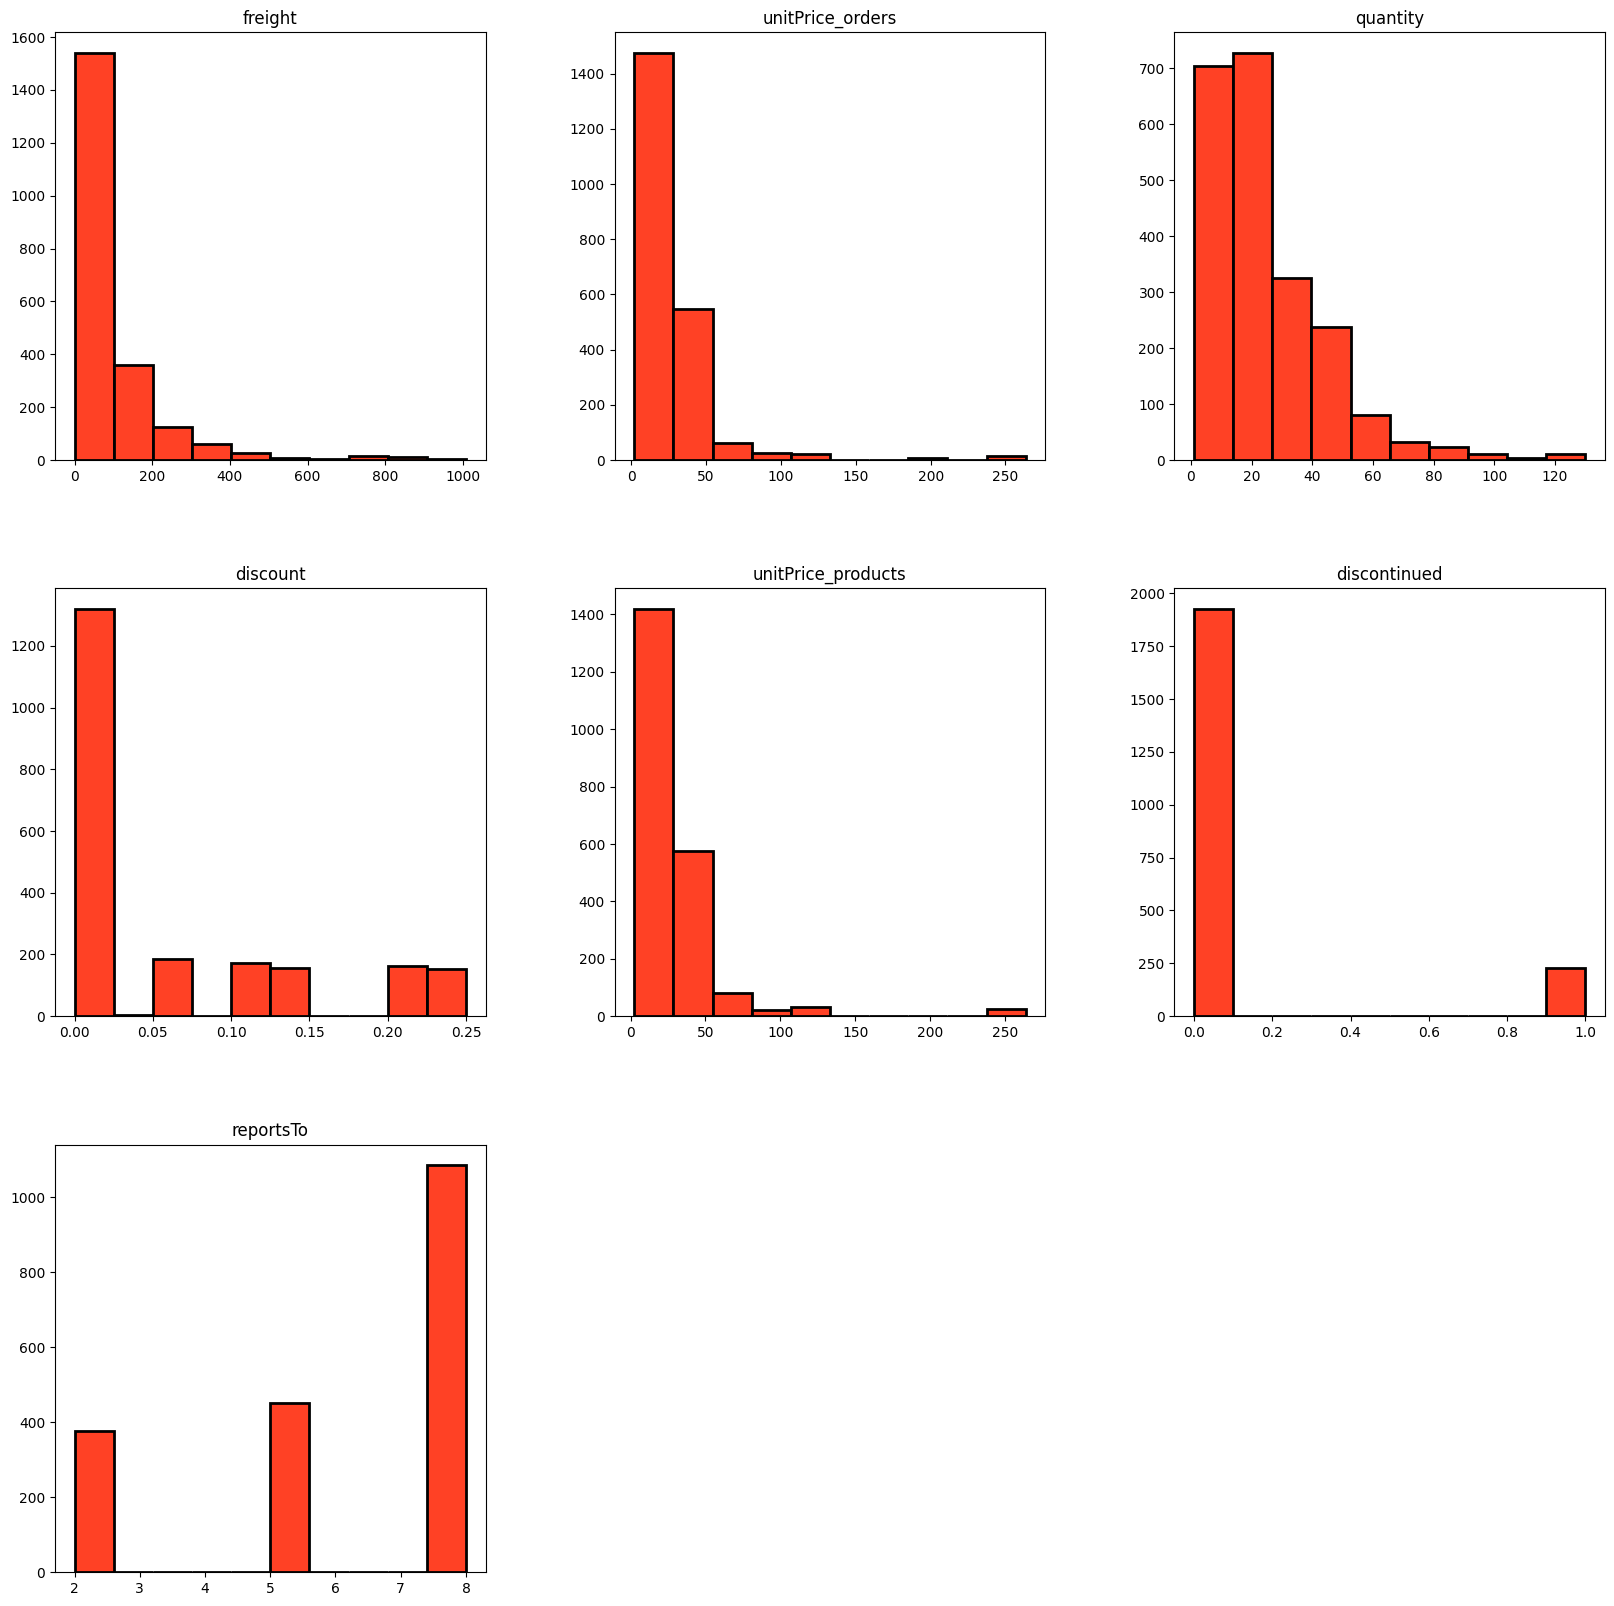

In [30]:
numbers_columns.hist(figsize=(20,20) ,edgecolor="black" , linewidth=2 ,color='#ff4125' , grid=False);

Let's See If I Removed All Outliers

In [9]:
df_without_outliers = df.copy()
outliers_columns = outliers(df)
outliers_columns = outliers_columns.loc[outliers_columns.num_outliers != 0 , 'columns'].tolist()
def remove_all_outliers(data):

         
        """
        Remove outliers from a given data and iterate for each column to catch the outliers from it and append its indexs so I can remove it all at once from the original data 
        and finally return a unique list because definitely there are duplicates in numbers       
        """
        outlier_list = []  
        for col in outliers_columns:
                IQR = data[col].quantile(.75) - data[col].quantile(.25)
                lower = data[col].quantile(.25) - 1.5 * IQR
                upper = data[col].quantile(.75) + 1.5 * IQR
                outliers = data[(data[col] < lower) | (data[col]  > upper)].index.tolist()
                outlier_list.append(outliers)
        index_outliers = pd.Series([ii  for i in outlier_list for ii in i]).unique().tolist()

        return  df_without_outliers.drop(index_outliers , axis=0)

         
df_without_outliers = remove_all_outliers(df_without_outliers)
df_without_outliers.head()

orderID customerID  employeeID   orderDate requiredDate shippedDate  \
0  10258.0      ERNSH         1.0  2013-07-17   2013-08-14  2013-07-23   
1  10991.0      QUICK         1.0  2015-04-01   2015-04-29  2015-04-07   
2  10813.0      RICAR         1.0  2015-01-05   2015-02-02  2015-01-09   
3  10469.0      WHITC         1.0  2014-03-10   2014-04-07  2014-03-14   
6  10587.0      QUEDE         1.0  2014-07-02   2014-07-30  2014-07-09   

   shipperID  freight  productID  unitPrice_orders  quantity  discount  \
0        1.0   140.51        2.0              15.2      50.0      0.20   
1        1.0    38.51        2.0              19.0      50.0      0.20   
2        1.0    47.38        2.0              19.0      12.0      0.20   
3        1.0    60.18        2.0              15.2      40.0      0.15   
6        1.0    62.52       35.0              18.0      20.0      0.00   

     companyName_orders       contactName           contactTitle  \
0          Ernst Handel     Roland Mendel          Sales Manager   
1            QUICK-Stop       Horst Kloss     Accounting Manager   
2    Ricardo Adocicados    Janete Limeira  Assistant Sales Agent   
3  White Clover Markets    Karl Jablonski                  Owner   
6           Que Delícia  Bernardo Batista     Accounting Manager   

    city_customer country_customer  categoryID categoryName  \
0            Graz          Austria           1    Beverages   
1       Cunewalde          Germany           1    Beverages   
2  Rio de Janeiro           Brazil           1    Beverages   
3         Seattle              USA           1    Beverages   
6  Rio de Janeiro           Brazil           1    Beverages   

                                   description     productName  \
0  Soft drinks, coffees, teas, beers, and ales           Chang   
1  Soft drinks, coffees, teas, beers, and ales           Chang   
2  Soft drinks, coffees, teas, beers, and ales           Chang   
3  Soft drinks, coffees, teas, beers, and ales           Chang   
6  Soft drinks, coffees, teas, beers, and ales  Steeleye Stout   

      quantityPerUnit  unitPrice_products  discontinued   employeeName  \
0  24 - 12 oz bottles                19.0             0  Nancy Davolio   
1  24 - 12 oz bottles                19.0             0  Nancy Davolio   
2  24 - 12 oz bottles                19.0             0  Nancy Davolio   
3  24 - 12 oz bottles                19.0             0  Nancy Davolio   
6  24 - 12 oz bottles                18.0             0  Nancy Davolio   

                  title city_employees country_employees  reportsTo  \
0  Sales Representative       New York               USA        8.0   
1  Sales Representative       New York               USA        8.0   
2  Sales Representative       New York               USA        8.0   
3  Sales Representative       New York               USA        8.0   
6  Sales Representative       New York               USA        8.0   

  companyName_shippers  
0       Speedy Express  
1       Speedy Express  
2       Speedy Express  
3       Speedy Express  
6       Speedy Express

In [10]:
# Check the normal distribution for each numerical column using the empirical rule after remove all outliers
numbers_columns_without_outliers = df_without_outliers[[col for col in df_without_outliers.select_dtypes('number').columns if 'ID' not in col ]]
def empirical_rule(data_name):
    for col in numbers_columns_without_outliers:
        for i in range(1 , 4):
            lower_limit =  data_name[col].mean() - data_name[col].std() * i 
            upper_limit =  data_name[col].mean() + data_name[col].std() * i 
            percentage = df[col].between(lower_limit , upper_limit).mean() * 100
            print(f'{col} => about {percentage.round(2)}% of the data falls within {i} standard deviation of the mean.')
        print('=='*50)
empirical_rule(df_without_outliers) 

freight => about 70.53% of the data falls within 1 standard deviation of the mean.
freight => about 86.17% of the data falls within 2 standard deviation of the mean.
freight => about 91.6% of the data falls within 3 standard deviation of the mean.
unitPrice_orders => about 62.55% of the data falls within 1 standard deviation of the mean.
unitPrice_orders => about 89.7% of the data falls within 2 standard deviation of the mean.
unitPrice_orders => about 95.45% of the data falls within 3 standard deviation of the mean.
quantity => about 62.23% of the data falls within 1 standard deviation of the mean.
quantity => about 88.82% of the data falls within 2 standard deviation of the mean.
quantity => about 96.01% of the data falls within 3 standard deviation of the mean.
discount => about 78.1% of the data falls within 1 standard deviation of the mean.
discount => about 92.85% of the data falls within 2 standard deviation of the mean.
discount => about 100.0% of the data falls within 3 standa

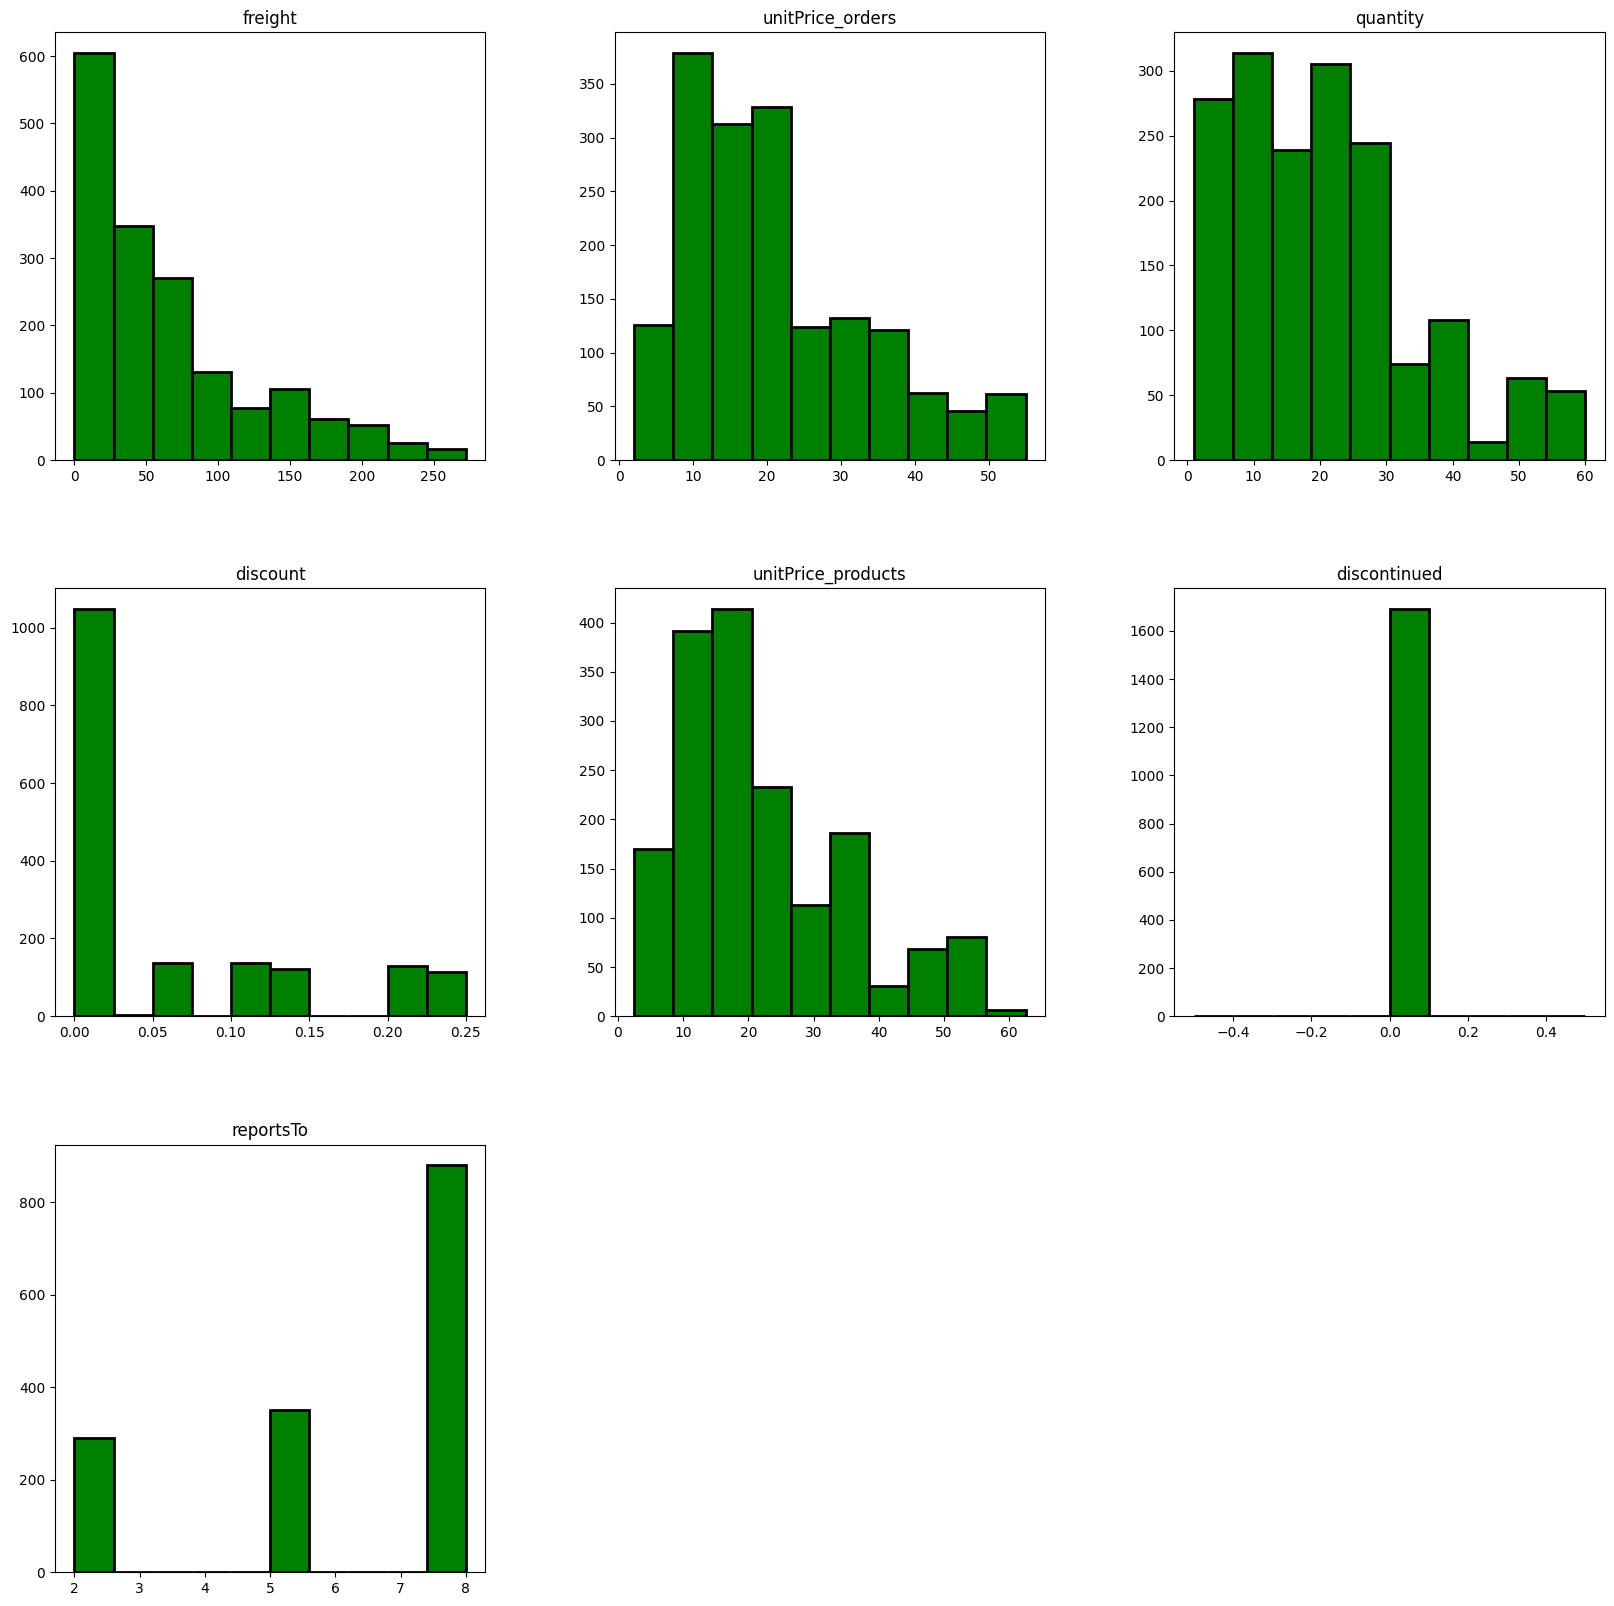

In [33]:
numbers_columns_without_outliers.hist(figsize=(20,20) ,edgecolor="black" , linewidth=2 ,color='green' , grid=False);

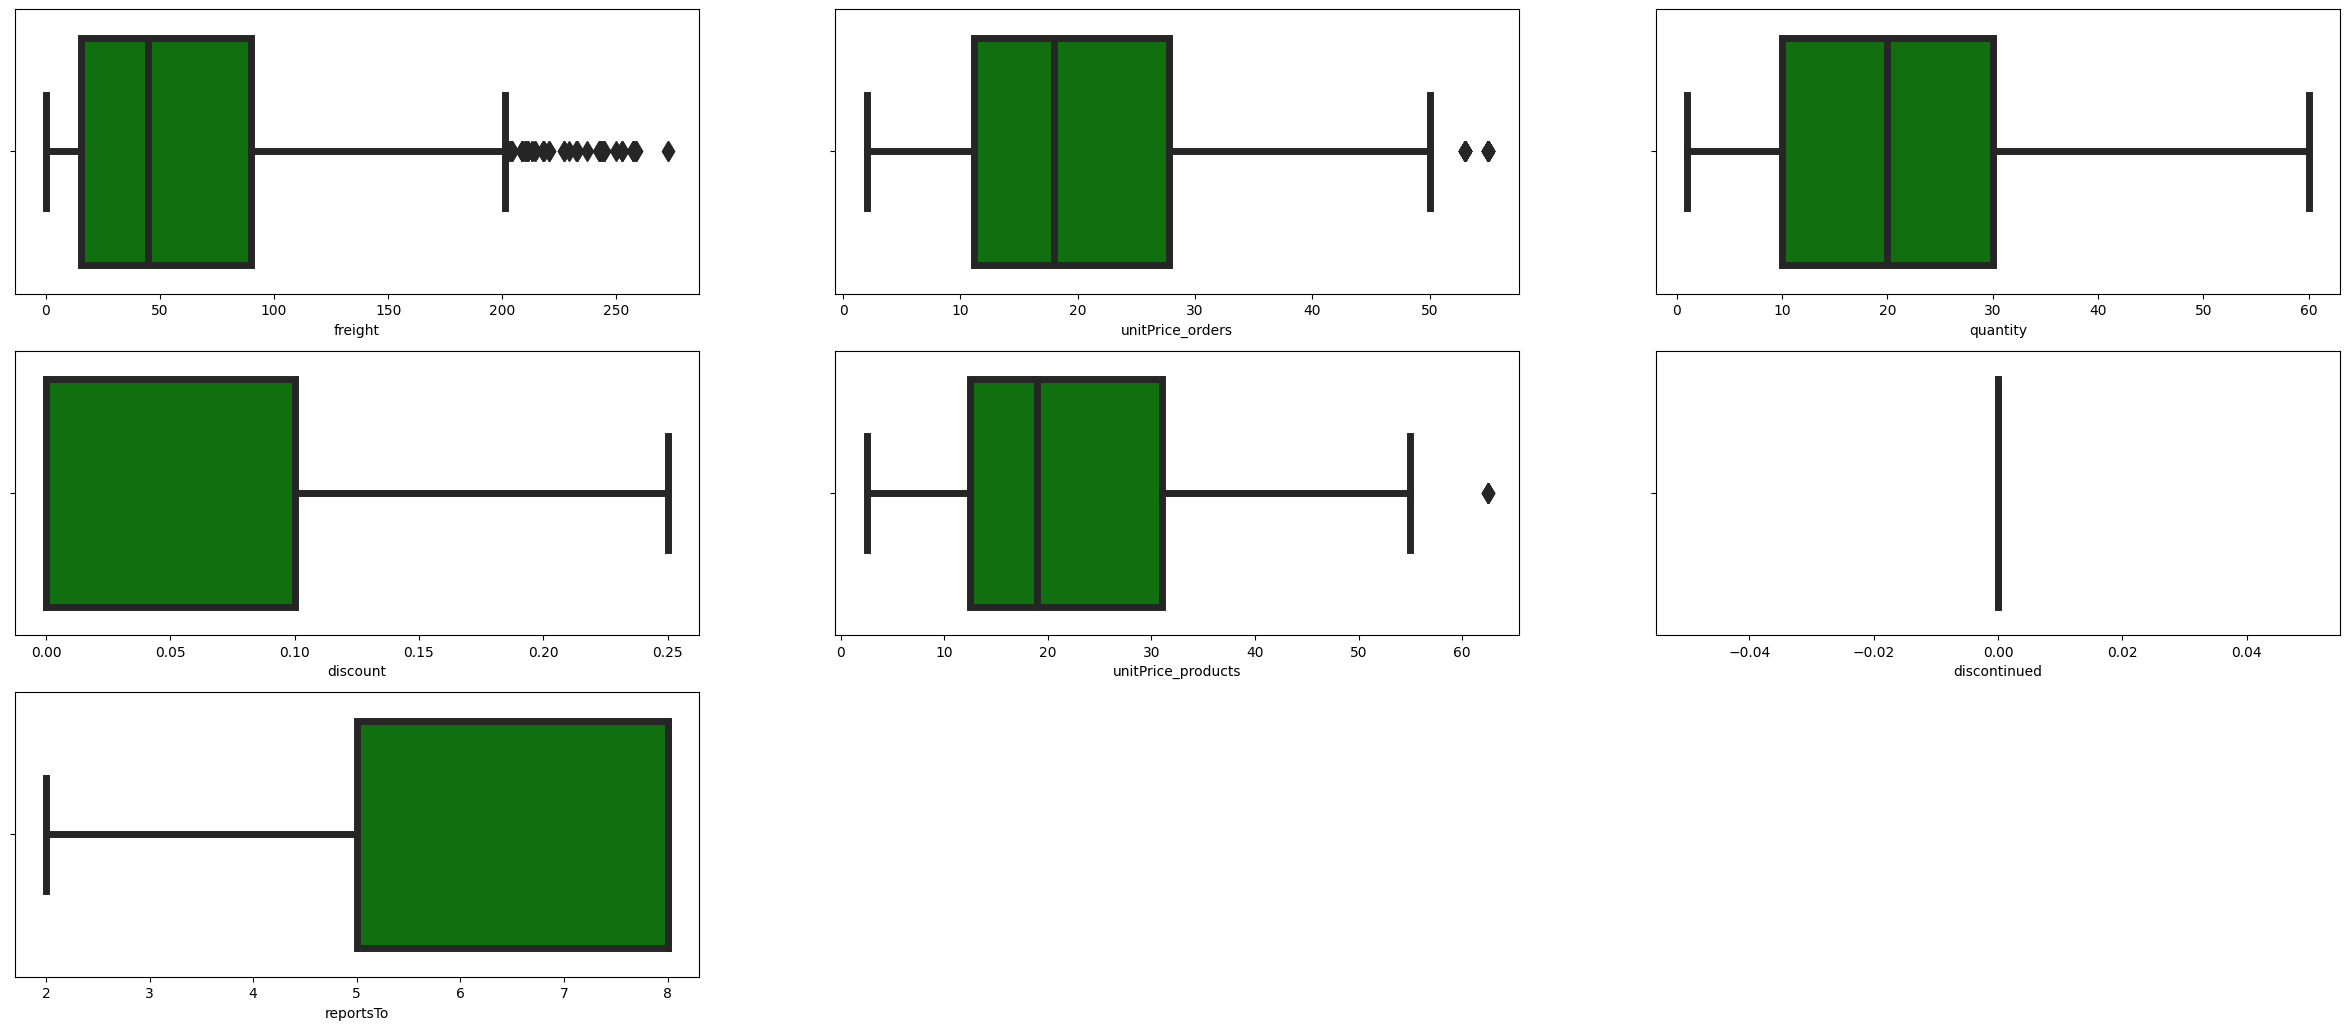

In [34]:
# showing the outliers by boxplot for numerical variables
fig = plt.figure(figsize=(30,17))
for n,col in enumerate(numbers_columns_without_outliers.columns ):
    ax = fig.add_subplot(4,3,n + 1)
    sns.boxplot(x=df_without_outliers[col] , ax=ax , fliersize=10, linewidth=5 ,color='green')

In [35]:
# The outliers have (463)=(21%) of the data
round((len(df) - len(df_without_outliers)) / len(df) * 100 ,2 )

21.48

I decided to leave the outliers because I'll lose a lot of data if I remove them and also the outliers here might be useful for analysis

__Converting Data Type__

In [36]:
#show data type of each column
df.dtypes

orderID                 float64
customerID               object
employeeID              float64
orderDate                object
requiredDate             object
shippedDate              object
shipperID               float64
freight                 float64
productID               float64
unitPrice_orders        float64
quantity                float64
discount                float64
companyName_orders       object
contactName              object
contactTitle             object
city_customer            object
country_customer         object
categoryID                int64
categoryName             object
description              object
productName              object
quantityPerUnit          object
unitPrice_products      float64
discontinued              int64
employeeName             object
title                    object
city_employees           object
country_employees        object
reportsTo               float64
companyName_shippers     object
dtype: object

In [37]:
#number of types of date
df.dtypes.value_counts()

object     18
float64    10
int64       2
dtype: int64

In [38]:
# look at memory usage befor start = 2.9 MB
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   orderID               2155 non-null   float64
 1   customerID            2155 non-null   object 
 2   employeeID            2155 non-null   float64
 3   orderDate             2155 non-null   object 
 4   requiredDate          2155 non-null   object 
 5   shippedDate           2155 non-null   object 
 6   shipperID             2155 non-null   float64
 7   freight               2155 non-null   float64
 8   productID             2155 non-null   float64
 9   unitPrice_orders      2155 non-null   float64
 10  quantity              2155 non-null   float64
 11  discount              2155 non-null   float64
 12  companyName_orders    2155 non-null   object 
 13  contactName           2155 non-null   object 
 14  contactTitle          2155 non-null   object 
 15  city_customer        

In [39]:
# Copy the columns that you want to covert it
df.columns

Index(['orderID', 'customerID', 'employeeID', 'orderDate', 'requiredDate',
       'shippedDate', 'shipperID', 'freight', 'productID', 'unitPrice_orders',
       'quantity', 'discount', 'companyName_orders', 'contactName',
       'contactTitle', 'city_customer', 'country_customer', 'categoryID',
       'categoryName', 'description', 'productName', 'quantityPerUnit',
       'unitPrice_products', 'discontinued', 'employeeName', 'title',
       'city_employees', 'country_employees', 'reportsTo',
       'companyName_shippers'],
      dtype='object')

In [7]:
# Convert Date column to DateTime
for col in ['orderDate', 'requiredDate','shippedDate']: df[col] = pd.to_datetime(df[col] , errors='coerce' )

# Convert columns that cannot be used in calculations into a class but make sure that the number of unique  is less than the number of rows dividing by two, otherwise it will increase memory usage instead decrease it
for col in ['orderID', 'customerID', 'employeeID', 'productID', 'categoryID' ,'shipperID','companyName_orders', 'contactName','contactTitle', 'city_customer', 'country_customer','discontinued', 
             'employeeName', 'title','city_employees', 'country_employees', 'reportsTo','companyName_shippers','categoryName' ,'productName'  ]: 
    df = df.astype({col:'category'})

# Convert just quantity column by int and the rest by float
for col in ['freight', 'unitPrice_orders','quantity', 'discount']:     
    if col == 'quantity' :
        df = df.astype({col:'int32'})    
    else :
        df = df.astype({col:'float32'}) 

In [8]:
# Check the condition of the categorical variables above

for col in ['orderID', 'customerID', 'employeeID', 'productID', 'categoryID' ,'shipperID','companyName_orders', 'contactName','contactTitle', 'city_customer', 'country_customer','discontinued', 
             'employeeName', 'title','city_employees', 'country_employees', 'reportsTo','companyName_shippers','categoryName' ,'description','productName'  ,'quantityPerUnit']:
    if df[col].nunique() < (len(df) / 2):
        print(f'{col} : 🟢Valid')
    else:
        print(f'{col} : 🔻Invalide')         

orderID : 🟢Valid
customerID : 🟢Valid
employeeID : 🟢Valid
productID : 🟢Valid
categoryID : 🟢Valid
shipperID : 🟢Valid
companyName_orders : 🟢Valid
contactName : 🟢Valid
contactTitle : 🟢Valid
city_customer : 🟢Valid
country_customer : 🟢Valid
discontinued : 🟢Valid
employeeName : 🟢Valid
title : 🟢Valid
city_employees : 🟢Valid
country_employees : 🟢Valid
reportsTo : 🟢Valid
companyName_shippers : 🟢Valid
categoryName : 🟢Valid
description : 🟢Valid
productName : 🟢Valid
quantityPerUnit : 🟢Valid


In [9]:
# Conver [quantityPerUnit,description] as object
df = df.astype({'quantityPerUnit':'object','description':'object'})

In [10]:
# look at memory usage after converting  the data type  582.3 KB
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   orderID               2155 non-null   category      
 1   customerID            2155 non-null   category      
 2   employeeID            2155 non-null   category      
 3   orderDate             2155 non-null   datetime64[ns]
 4   requiredDate          2155 non-null   datetime64[ns]
 5   shippedDate           2082 non-null   datetime64[ns]
 6   shipperID             2155 non-null   category      
 7   freight               2155 non-null   float32       
 8   productID             2155 non-null   category      
 9   unitPrice_orders      2155 non-null   float32       
 10  quantity              2155 non-null   int32         
 11  discount              2155 non-null   float32       
 12  companyName_orders    2155 non-null   category      
 13  contactName       

---

__Validating__|
---

check that the data doesn’t have mistakes or misspellings

In [44]:
# Validate Data Types Manually
pd.DataFrame(df.dtypes,columns=['Data_type'])

Data_type
orderID                     category
customerID                  category
employeeID                  category
orderDate             datetime64[ns]
requiredDate          datetime64[ns]
shippedDate           datetime64[ns]
shipperID                   category
freight                      float32
productID                   category
unitPrice_orders             float32
quantity                       int32
discount                     float32
companyName_orders          category
contactName                 category
contactTitle                category
city_customer               category
country_customer            category
categoryID                  category
categoryName                category
description                   object
productName                 category
quantityPerUnit               object
unitPrice_products           float64
discontinued                category
employeeName                category
title                       category
city_employees              category
country_employees           category
reportsTo                   category
companyName_shippers        category

In [11]:
# Validate if there's any column containing any of the punctuation signs !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ and 
from string import punctuation

for col in df.select_dtypes('category'):
    if any(df[col].astype('str').str.contains(r"[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]")):
        print(f'{col} : Has punctuation 💩')
    else:
        print(f'{col} : clear 🧹 ')  
        

orderID : Has punctuation 💩
customerID : clear 🧹 
employeeID : Has punctuation 💩
shipperID : Has punctuation 💩
productID : Has punctuation 💩
companyName_orders : Has punctuation 💩
contactName : clear 🧹 
contactTitle : Has punctuation 💩
city_customer : Has punctuation 💩
country_customer : clear 🧹 
categoryID : clear 🧹 
categoryName : Has punctuation 💩
productName : Has punctuation 💩
discontinued : clear 🧹 
employeeName : clear 🧹 
title : clear 🧹 
city_employees : clear 🧹 
country_employees : clear 🧹 
reportsTo : Has punctuation 💩
companyName_shippers : clear 🧹 


In [12]:
# Adjust dots in the columns 
for col in ['orderID', 'employeeID', 'shipperID', 'productID', 'reportsTo']:
    df[col] = df[col].astype('str').str.strip('.0').astype('category')

In [13]:
# I'll remove any punctuation except {&} sign using regular expression
for col in ['companyName_orders','contactTitle','city_customer','categoryName','productName']:
    df[col] = df[col].apply(lambda x : re.sub(r"[!\"#$%'()*+,-./:;<=>?@[\]^_`{|}~]",' ',x))

First IDs columns contain Dot sign . so I supposed to convert it to int before the category so let's fix that

I gonna leave these columns as they are [companyName_orders , categoryName ,description,quantityPerUnit ] case I want see & sign

The description column I want to leave , that used to separate the words

The quantityPerUnit column has many separate signs for in it

reportTo I'll drop this column because wouldn't be useful in analysis

In [48]:
#Lets check missing dates using set difference
missing_dates = list(set(pd.date_range(df.orderDate.min(),df.orderDate.max()).astype('str')) - set(df.orderDate.astype('str')))
missing_dates

['2013-11-16',
 '2013-07-28',
 '2014-08-03',
 '2013-11-30',
 '2015-02-08',
 '2015-04-05',
 '2013-10-27',
 '2014-02-01',
 '2015-02-14',
 '2015-05-02',
 '2014-08-23',
 '2014-03-22',
 '2013-09-15',
 '2015-01-10',
 '2014-07-06',
 '2013-09-29',
 '2015-03-14',
 '2014-10-12',
 '2013-12-21',
 '2013-12-28',
 '2013-09-14',
 '2014-09-13',
 '2014-12-06',
 '2013-07-21',
 '2014-08-16',
 '2013-07-07',
 '2013-09-01',
 '2013-07-20',
 '2013-11-10',
 '2013-10-19',
 '2013-08-04',
 '2013-11-24',
 '2014-07-20',
 '2014-06-29',
 '2013-07-13',
 '2013-07-06',
 '2013-11-17',
 '2014-06-21',
 '2015-04-25',
 '2014-10-25',
 '2015-02-28',
 '2015-03-07',
 '2014-05-10',
 '2014-03-01',
 '2014-10-05',
 '2014-02-08',
 '2014-05-17',
 '2015-01-31',
 '2013-09-28',
 '2015-03-01',
 '2015-01-18',
 '2014-06-15',
 '2013-10-26',
 '2014-07-26',
 '2014-01-18',
 '2014-11-09',
 '2014-01-05',
 '2014-09-06',
 '2014-05-24',
 '2014-02-23',
 '2014-02-02',
 '2013-10-05',
 '2014-09-28',
 '2014-10-11',
 '2013-12-07',
 '2015-03-22',
 '2014-06-

In [49]:
# All Missing Dates are the holiday days Saturday and Sunday
pd.Series(missing_dates).astype('datetime64[ns]').dt.day_name().value_counts()

Saturday    96
Sunday      96
dtype: int64

In [50]:
# To make sure that these value haven't in the data
df[df.orderDate.isin(missing_dates)]

Empty DataFrame
Columns: [orderID, customerID, employeeID, orderDate, requiredDate, shippedDate, shipperID, freight, productID, unitPrice_orders, quantity, discount, companyName_orders, contactName, contactTitle, city_customer, country_customer, categoryID, categoryName, description, productName, quantityPerUnit, unitPrice_products, discontinued, employeeName, title, city_employees, country_employees, reportsTo, companyName_shippers]
Index: []

In [51]:
# Double check 
len(df[~df.orderDate.isin(missing_dates)])

2155

In [52]:
# number of missing dates
len(missing_dates)

192

In [14]:
# Format the float values to be 00.00
pd.set_option('display.float_format', '{:.2f}'.format)
df.select_dtypes('float')

freight  unitPrice_orders  discount  unitPrice_products
0      140.51             15.20      0.20               19.00
1       38.51             19.00      0.20               19.00
2       47.38             19.00      0.20               19.00
3       60.18             15.20      0.15               19.00
4       52.52              4.50      0.25                4.50
...       ...               ...       ...                 ...
2150    30.76              6.00      0.15                6.00
2151   146.06             20.70      0.25               25.89
2152   148.33             15.20      0.00               19.00
2153    13.32             18.40      0.00               18.40
2154    23.65              7.70      0.20                9.65

[2155 rows x 4 columns]

In [15]:
# Grab all columns that have names and make sure to title it
for col in df.columns[df.columns.str.lower().str.contains(r'name')]:
    df[col] = df[col].astype('str').str.title().astype('category')

In [25]:
# Take a sample to recheck the data overall
df.sample(10)

orderID customerID employeeID  orderDate requiredDate shippedDate  \
1120   10294      RATTC          4 2013-08-30   2013-09-27  2013-09-05   
1767    1086      FRANR          3 2015-01-29   2015-02-26  2015-02-04   
682    10946      VAFFE          1 2015-03-12   2015-04-09  2015-03-19   
2147   10263      ERNSH          9 2013-07-23   2013-08-20  2013-07-31   
1565   10835      ALFKI          1 2015-01-15   2015-02-12  2015-01-21   
959     1053      PICCO          3 2014-05-08   2014-06-05  2014-05-12   
1211   10254      CHOPS          5 2013-07-11   2013-08-08  2013-07-23   
675    11077      RATTC          1 2015-05-06   2015-06-03  2015-04-10   
1540   10357      LILAS          1 2013-11-19   2013-12-17  2013-12-02   
830    11001      FOLKO          2 2015-04-06   2015-05-04  2015-04-14   

     shipperID  freight productID  unitPrice_orders  quantity  discount  \
1120         2   147.26        17             31.20        15      0.00   
1767         3    19.26        51             53.00         3      0.00   
682          2    27.20        77             13.00        40      0.00   
2147         3   146.06        74              8.00        36      0.25   
1565         3    69.53        59             55.00        15      0.00   
959          2   339.22        17             39.00        40      0.00   
1211         2    22.98        74              8.00        21      0.00   
675          2     8.53         4             22.00         1      0.00   
1540         3    34.88        26             24.90        16      0.00   
830          2   197.30        22             21.00        25      0.00   

              companyName_orders      contactName  \
1120  Rattlesnake Canyon Grocery     Paula Wilson   
1767         France Restauration   Carine Schmitt   
682                 Vaffeljernet      Palle Ibsen   
2147                Ernst Handel    Roland Mendel   
1565         Alfreds Futterkiste     Maria Anders   
959             Piccolo Und Mehr      Georg Pipps   
1211           Chop Suey Chinese        Yang Wang   
675   Rattlesnake Canyon Grocery     Paula Wilson   
1540           Lila Supermercado  Carlos González   
830               Folk Och Fä Hb    Maria Larsson   

                        contactTitle city_customer country_customer  \
1120  Assistant Sales Representative   Albuquerque              USA   
1767               Marketing Manager        Nantes           France   
682                    Sales Manager         Århus          Denmark   
2147                   Sales Manager          Graz          Austria   
1565            Sales Representative        Berlin          Germany   
959                    Sales Manager      Salzburg          Austria   
1211                           Owner          Bern      Switzerland   
675   Assistant Sales Representative   Albuquerque              USA   
1540              Accounting Manager  Barquisimeto        Venezuela   
830                            Owner        Bräcke           Sweden   

     categoryID      categoryName  \
1120          6    Meat & Poultry   
1767          7           Produce   
682           2        Condiments   
2147          7           Produce   
1565          4    Dairy Products   
959           6    Meat & Poultry   
1211          7           Produce   
675           2        Condiments   
1540          3       Confections   
830           5  Grains & Cereals   

                                            description  \
1120                                     Prepared meats   
1767                          Dried fruit and bean curd   
682   Sweet and savory sauces, relishes, spreads, an...   
2147                          Dried fruit and bean curd   
1565                                            Cheeses   
959                                      Prepared meats   
1211                          Dried fruit and bean curd   
675   Sweet and savory sauces, relishes, spreads, an...   
1540                Desserts, candies, and sweet breads   


First IDs columns contain Dot sign . so I supposed to convert it to int before the category so let's fix that

I gonna leave these columns as they are [companyName_orders , categoryName ,description,quantityPerUnit ] case I want see & sign

The description column I want to leave , that used to separate the words

The quantityPerUnit column has many separate signs for in it

reportTo I'll drop this column because wouldn't be useful in analysis

---

__Structuring__|
---

In [56]:
# To I can see the description for each row easily and completely
[{Description.iloc[index , 0]:{Description.iloc[index , 1]: Description.iloc[index , 2]}} for index in range(len(Description))]

[{'orders': {'orderID': 'Unique identifier for each order'}},
 {'orders': {'customerID': 'The customer who placed the order'}},
 {'orders': {'employeeID': 'The employee who processed the order'}},
 {'orders': {'orderDate': 'The date when the order was placed'}},
 {'orders': {'requiredDate': 'The date when the customer requested the order to be delivered'}},
 {'orders': {'shippedDate': 'The date when the order was shipped'}},
 {'orders': {'shipperID': 'The ID of the shipping company used for the order'}},
 {'orders': {'freight': 'The shipping cost for the order (USD)'}},
 {'order_details': {'orderID': 'The ID of the order this detail belongs to'}},
 {'order_details': {'productID': 'The ID of the product being ordered'}},
 {'order_details': {'unitPrice': 'The price per unit of the product at the time the order was placed (USD - discount not included)'}},
 {'order_details': {'quantity': 'The number of units being ordered'}},
 {'order_details': {'discount': 'The discount percentage applied

In [16]:
# rename the columns by the right name
df.rename(columns={'companyName_orders':'companyName_customers'} , inplace=True)

__Feature Engineering__

In [17]:
# Let's create some new columns
df = df.assign(
    
         Mon_Day_orderDate = df.orderDate.dt.strftime('%b-%a'), # Extract month and day form orderDate

         Year_Quarter_orderDate = df.orderDate.dt.strftime('%Y') + "-" + 'Q'+df.orderDate.dt.quarter.astype('str'), # Extract year and quarter form orderDate

         weeks_of_year_orderDate = df.orderDate.dt.strftime('%Y-W%U'), # Extract weekOfyears and year form orderDate

         Year_Month_orderDate = df.orderDate.dt.strftime('%Y-%b'), # Extract year and month from orderDate

         day_order = df.orderDate.dt.day_name(),# Extract day of week from orderDate

         month_order = df.orderDate.dt.month_name(),# Extract month from orderDate

         quarter_order = df.orderDate.dt.quarter ,# Extract quarter from orderDate

         year_order = df.orderDate.dt.year , # Extract week of your from orderDate

         weekofyear_order = df.orderDate.dt.strftime('%W'), # Extract week of your from orderDate

         days_difference_required_shipped = (df.requiredDate - df.shippedDate).dt.days, # Extract number of days between requiredDate and ShippedDate

         Sales = df.quantity * (df.unitPrice_orders * (1 - df.discount)), # Create a Sales column by minus the unit price column with discount and  by multiplying the quantity

         freight_ratio_of_sales = lambda x : round(x['freight'] /  x['Sales'] * 100 , 3) , # Cost shipping Ratio by Sales

         percentile_unitPrice_orders = lambda x : pd.qcut(x['Sales'] , 10 , [f'<{i}%' for i in np.linspace(0.1 , 1 ,10).round(2)]) # Extract quantile of sales for each 0.10 percentile                                                  
)

df.head()

orderID customerID employeeID  orderDate requiredDate shippedDate shipperID  \
0   10258      ERNSH          1 2013-07-17   2013-08-14  2013-07-23         1   
1   10991      QUICK          1 2015-04-01   2015-04-29  2015-04-07         1   
2   10813      RICAR          1 2015-01-05   2015-02-02  2015-01-09         1   
3   10469      WHITC          1 2014-03-10   2014-04-07  2014-03-14         1   
4   11027      BOTTM          1 2015-04-16   2015-05-14  2015-04-20         1   

   freight productID  unitPrice_orders  quantity  discount  \
0   140.51         2             15.20        50      0.20   
1    38.51         2             19.00        50      0.20   
2    47.38         2             19.00        12      0.20   
3    60.18         2             15.20        40      0.15   
4    52.52        24              4.50        30      0.25   

   companyName_customers        contactName           contactTitle  \
0           Ernst Handel      Roland Mendel          Sales Manager   
1             Quick Stop        Horst Kloss     Accounting Manager   
2     Ricardo Adocicados     Janete Limeira  Assistant Sales Agent   
3   White Clover Markets     Karl Jablonski                  Owner   
4  Bottom Dollar Markets  Elizabeth Lincoln     Accounting Manager   

    city_customer country_customer categoryID categoryName  \
0            Graz          Austria          1    Beverages   
1       Cunewalde          Germany          1    Beverages   
2  Rio de Janeiro           Brazil          1    Beverages   
3         Seattle              USA          1    Beverages   
4       Tsawassen           Canada          1    Beverages   

                                   description         productName  \
0  Soft drinks, coffees, teas, beers, and ales               Chang   
1  Soft drinks, coffees, teas, beers, and ales               Chang   
2  Soft drinks, coffees, teas, beers, and ales               Chang   
3  Soft drinks, coffees, teas, beers, and ales               Chang   
4  Soft drinks, coffees, teas, beers, and ales  Guarana Fantastica   

      quantityPerUnit  unitPrice_products discontinued   employeeName  \
0  24 - 12 oz bottles               19.00            0  Nancy Davolio   
1  24 - 12 oz bottles               19.00            0  Nancy Davolio   
2  24 - 12 oz bottles               19.00            0  Nancy Davolio   
3  24 - 12 oz bottles               19.00            0  Nancy Davolio   
4    12 - 355 ml cans                4.50            1  Nancy Davolio   

                  title city_employees country_employees reportsTo  \
0  Sales Representative       New York               USA         8   
1  Sales Representative       New York               USA         8   
2  Sales Representative       New York               USA         8   
3  Sales Representative       New York               USA         8   
4  Sales Representative       New York               USA         8   

  companyName_shippers Mon_Day_orderDate Year_Quarter_orderDate  \
0       Speedy Express           Jul-Wed                2013-Q3   
1       Speedy Express           Apr-Wed                2015-Q2   
2       Speedy Express           Jan-Mon                2015-Q1   
3       Speedy Express           Mar-Mon                2014-Q1   
4       Speedy Express           Apr-Thu                2015-Q2   

  weeks_of_year_orderDate Year_Month_orderDate  day_order month_order  \
0                2013-W28             2013-Jul  Wednesday        July   
1                2015-W13             2015-Apr  Wednesday       April   
2                2015-W01             2015-Jan     Monday     January   
3                2014-W10             2014-Mar     Monday       March   
4                2015-W15             2015-Apr   Thursday       April   

   quarter_order  year_order weekofyear_order  \
0              3        2013               28   
1              2        2015               13   
2              1        2015               01   
3              1        2014 

In [18]:
def rank(data , groubed_column , numerical_column):
    """
    This function return rank values by giving it 
    data and column which you want to group and numeric column to groupby
    """
    unique = data.groupby(groubed_column,as_index=False)[numerical_column].sum().sort_values(by=numerical_column,ascending=False)[groubed_column].astype('str').unique()   
    series_rank = data[groubed_column].map({i : rank for i , rank in zip(unique , range(1 , len(unique)+1))})  
    return series_rank 



In [19]:
#Creat ranks column                                       
df = df.assign(
    
          country_customer_rank_sales = rank(df , 'country_customer','Sales' ), # Total sales by country customer and rank each country in the original data by Total sales, for example, the top country has sales would be in rank 1 
                                                                                                       
          companyName_customers_rank_Sales = rank(df ,'companyName_customers' ,'Sales'), # Total Sales by companyName customer and rank each companyName in the original data by Total Sales, for example, the top companyName has Sales would be in rank 1

          product_rank_sales = rank(df , 'productName','Sales'), # Total sales by product and rank each product in the original data by Total sales, for example, the top product has sales would be in rank 1

          employee_rank_sales = rank(df , 'employeeName','Sales') , # Total sales by employee and rank each employee in the original data by Total sales, for example, the top employeeName has sales would be in rank 1

          city_customer_rank_freight =  rank(df , 'city_customer','freight') # Total freight by city_customer and rank each city_customer in the original data by Total freight, for example, the top city_customer has freight would be in rank 1

          ) 
                                                    
df.head()        

orderID customerID employeeID  orderDate requiredDate shippedDate shipperID  \
0   10258      ERNSH          1 2013-07-17   2013-08-14  2013-07-23         1   
1   10991      QUICK          1 2015-04-01   2015-04-29  2015-04-07         1   
2   10813      RICAR          1 2015-01-05   2015-02-02  2015-01-09         1   
3   10469      WHITC          1 2014-03-10   2014-04-07  2014-03-14         1   
4   11027      BOTTM          1 2015-04-16   2015-05-14  2015-04-20         1   

   freight productID  unitPrice_orders  quantity  discount  \
0   140.51         2             15.20        50      0.20   
1    38.51         2             19.00        50      0.20   
2    47.38         2             19.00        12      0.20   
3    60.18         2             15.20        40      0.15   
4    52.52        24              4.50        30      0.25   

   companyName_customers        contactName           contactTitle  \
0           Ernst Handel      Roland Mendel          Sales Manager   
1             Quick Stop        Horst Kloss     Accounting Manager   
2     Ricardo Adocicados     Janete Limeira  Assistant Sales Agent   
3   White Clover Markets     Karl Jablonski                  Owner   
4  Bottom Dollar Markets  Elizabeth Lincoln     Accounting Manager   

    city_customer country_customer categoryID categoryName  \
0            Graz          Austria          1    Beverages   
1       Cunewalde          Germany          1    Beverages   
2  Rio de Janeiro           Brazil          1    Beverages   
3         Seattle              USA          1    Beverages   
4       Tsawassen           Canada          1    Beverages   

                                   description         productName  \
0  Soft drinks, coffees, teas, beers, and ales               Chang   
1  Soft drinks, coffees, teas, beers, and ales               Chang   
2  Soft drinks, coffees, teas, beers, and ales               Chang   
3  Soft drinks, coffees, teas, beers, and ales               Chang   
4  Soft drinks, coffees, teas, beers, and ales  Guarana Fantastica   

      quantityPerUnit  unitPrice_products discontinued   employeeName  \
0  24 - 12 oz bottles               19.00            0  Nancy Davolio   
1  24 - 12 oz bottles               19.00            0  Nancy Davolio   
2  24 - 12 oz bottles               19.00            0  Nancy Davolio   
3  24 - 12 oz bottles               19.00            0  Nancy Davolio   
4    12 - 355 ml cans                4.50            1  Nancy Davolio   

                  title city_employees country_employees reportsTo  \
0  Sales Representative       New York               USA         8   
1  Sales Representative       New York               USA         8   
2  Sales Representative       New York               USA         8   
3  Sales Representative       New York               USA         8   
4  Sales Representative       New York               USA         8   

  companyName_shippers Mon_Day_orderDate Year_Quarter_orderDate  \
0       Speedy Express           Jul-Wed                2013-Q3   
1       Speedy Express           Apr-Wed                2015-Q2   
2       Speedy Express           Jan-Mon                2015-Q1   
3       Speedy Express           Mar-Mon                2014-Q1   
4       Speedy Express           Apr-Thu                2015-Q2   

  weeks_of_year_orderDate Year_Month_orderDate  day_order month_order  \
0                2013-W28             2013-Jul  Wednesday        July   
1                2015-W13             2015-Apr  Wednesday       April   
2                2015-W01             2015-Jan     Monday     January   
3                2014-W10             2014-Mar     Monday       March   
4                2015-W15             2015-Apr   Thursday       April   

   quarter_order  year_order weekofyear_order  \
0              3        2013               28   
1              2        2015               13   
2              1        2015               01   
3              1        2014 

- So That's Enough I'll create more columns while doing the analysis 

In [20]:
#validating from new columns
df.iloc[:,-18:].dtypes

Mon_Day_orderDate                     object
Year_Quarter_orderDate                object
weeks_of_year_orderDate               object
Year_Month_orderDate                  object
day_order                             object
month_order                           object
quarter_order                          int64
year_order                             int64
weekofyear_order                      object
days_difference_required_shipped     float64
Sales                                float64
freight_ratio_of_sales               float64
percentile_unitPrice_orders         category
country_customer_rank_sales         category
companyName_customers_rank_Sales    category
product_rank_sales                  category
employee_rank_sales                 category
city_customer_rank_freight          category
dtype: object

In [21]:
# Convert all rank column to category
for col in df.columns[df.columns.str.contains(r'rank')]: 
    df[col] = df[col].astype('category')

In [22]:
# Convert Dates Extraction to strings
for col in ['Mon_Day_orderDate', 'Year_Quarter_orderDate','weeks_of_year_orderDate', 'Year_Month_orderDate', 
            'day_order', 'month_order','quarter_order', 'year_order', 'weekofyear_order']:
    df[col] = df[col].astype('str')

In [23]:
# Make sure all columns are clean from null values
df.iloc[:,-18:].isna().sum()

Mon_Day_orderDate                    0
Year_Quarter_orderDate               0
weeks_of_year_orderDate              0
Year_Month_orderDate                 0
day_order                            0
month_order                          0
quarter_order                        0
year_order                           0
weekofyear_order                     0
days_difference_required_shipped    73
Sales                                0
freight_ratio_of_sales               0
percentile_unitPrice_orders          0
country_customer_rank_sales          0
companyName_customers_rank_Sales     0
product_rank_sales                   0
employee_rank_sales                  0
city_customer_rank_freight           0
dtype: int64

I am certain of the result because I test the results after creating every column so all columns are valid

__Data Visualization__

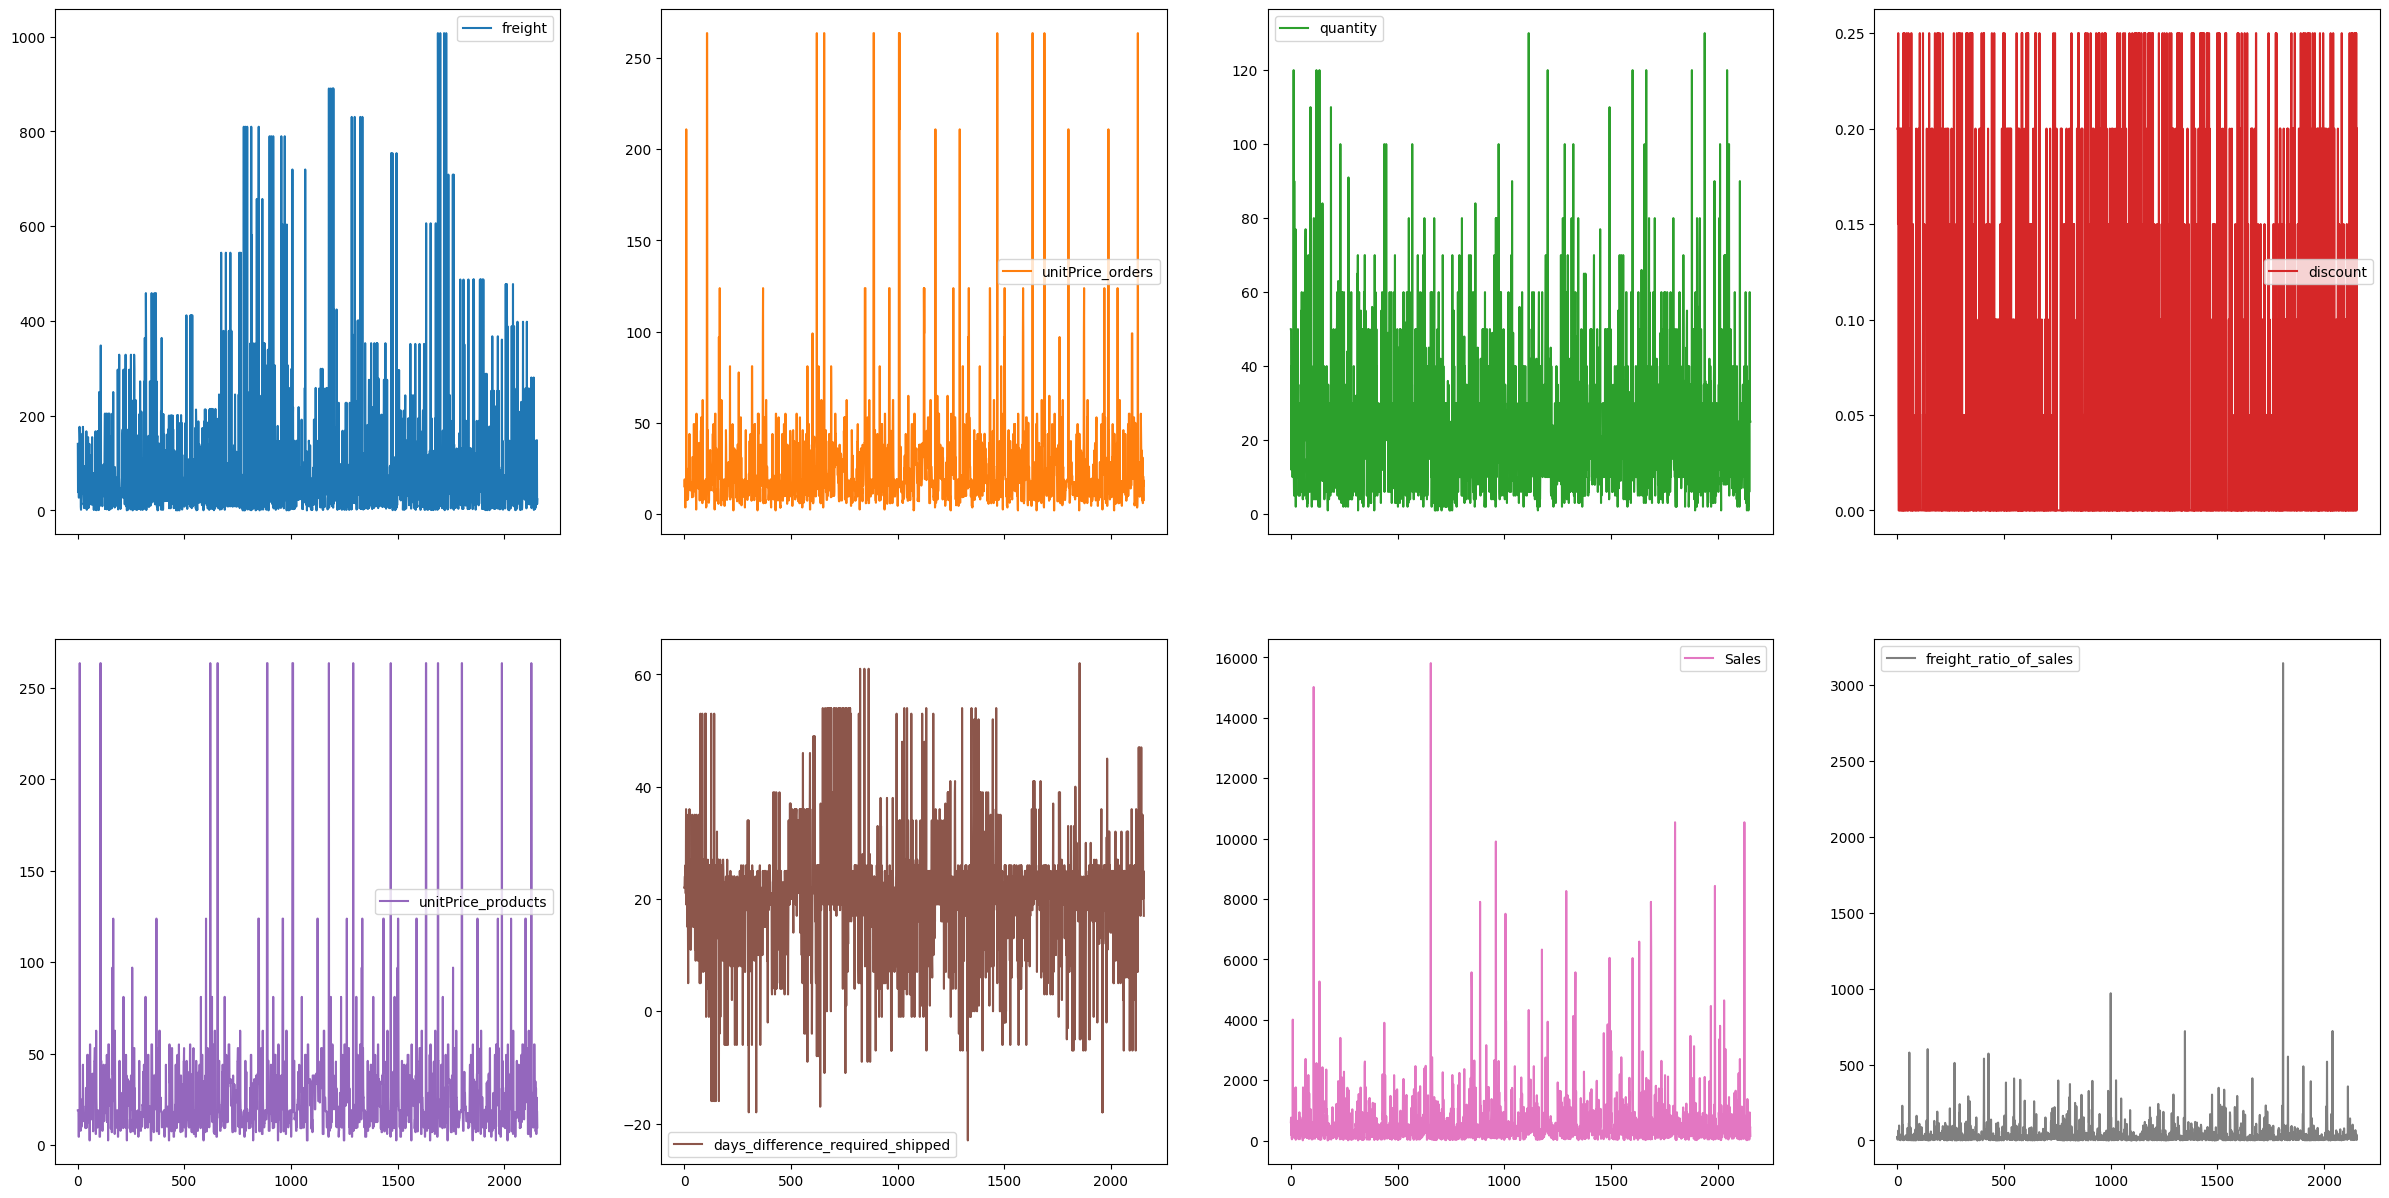

In [65]:
df.select_dtypes(include='number').plot(figsize=(30,15),
                                        subplots=True , 
                                        layout=(2,4)
                                        );

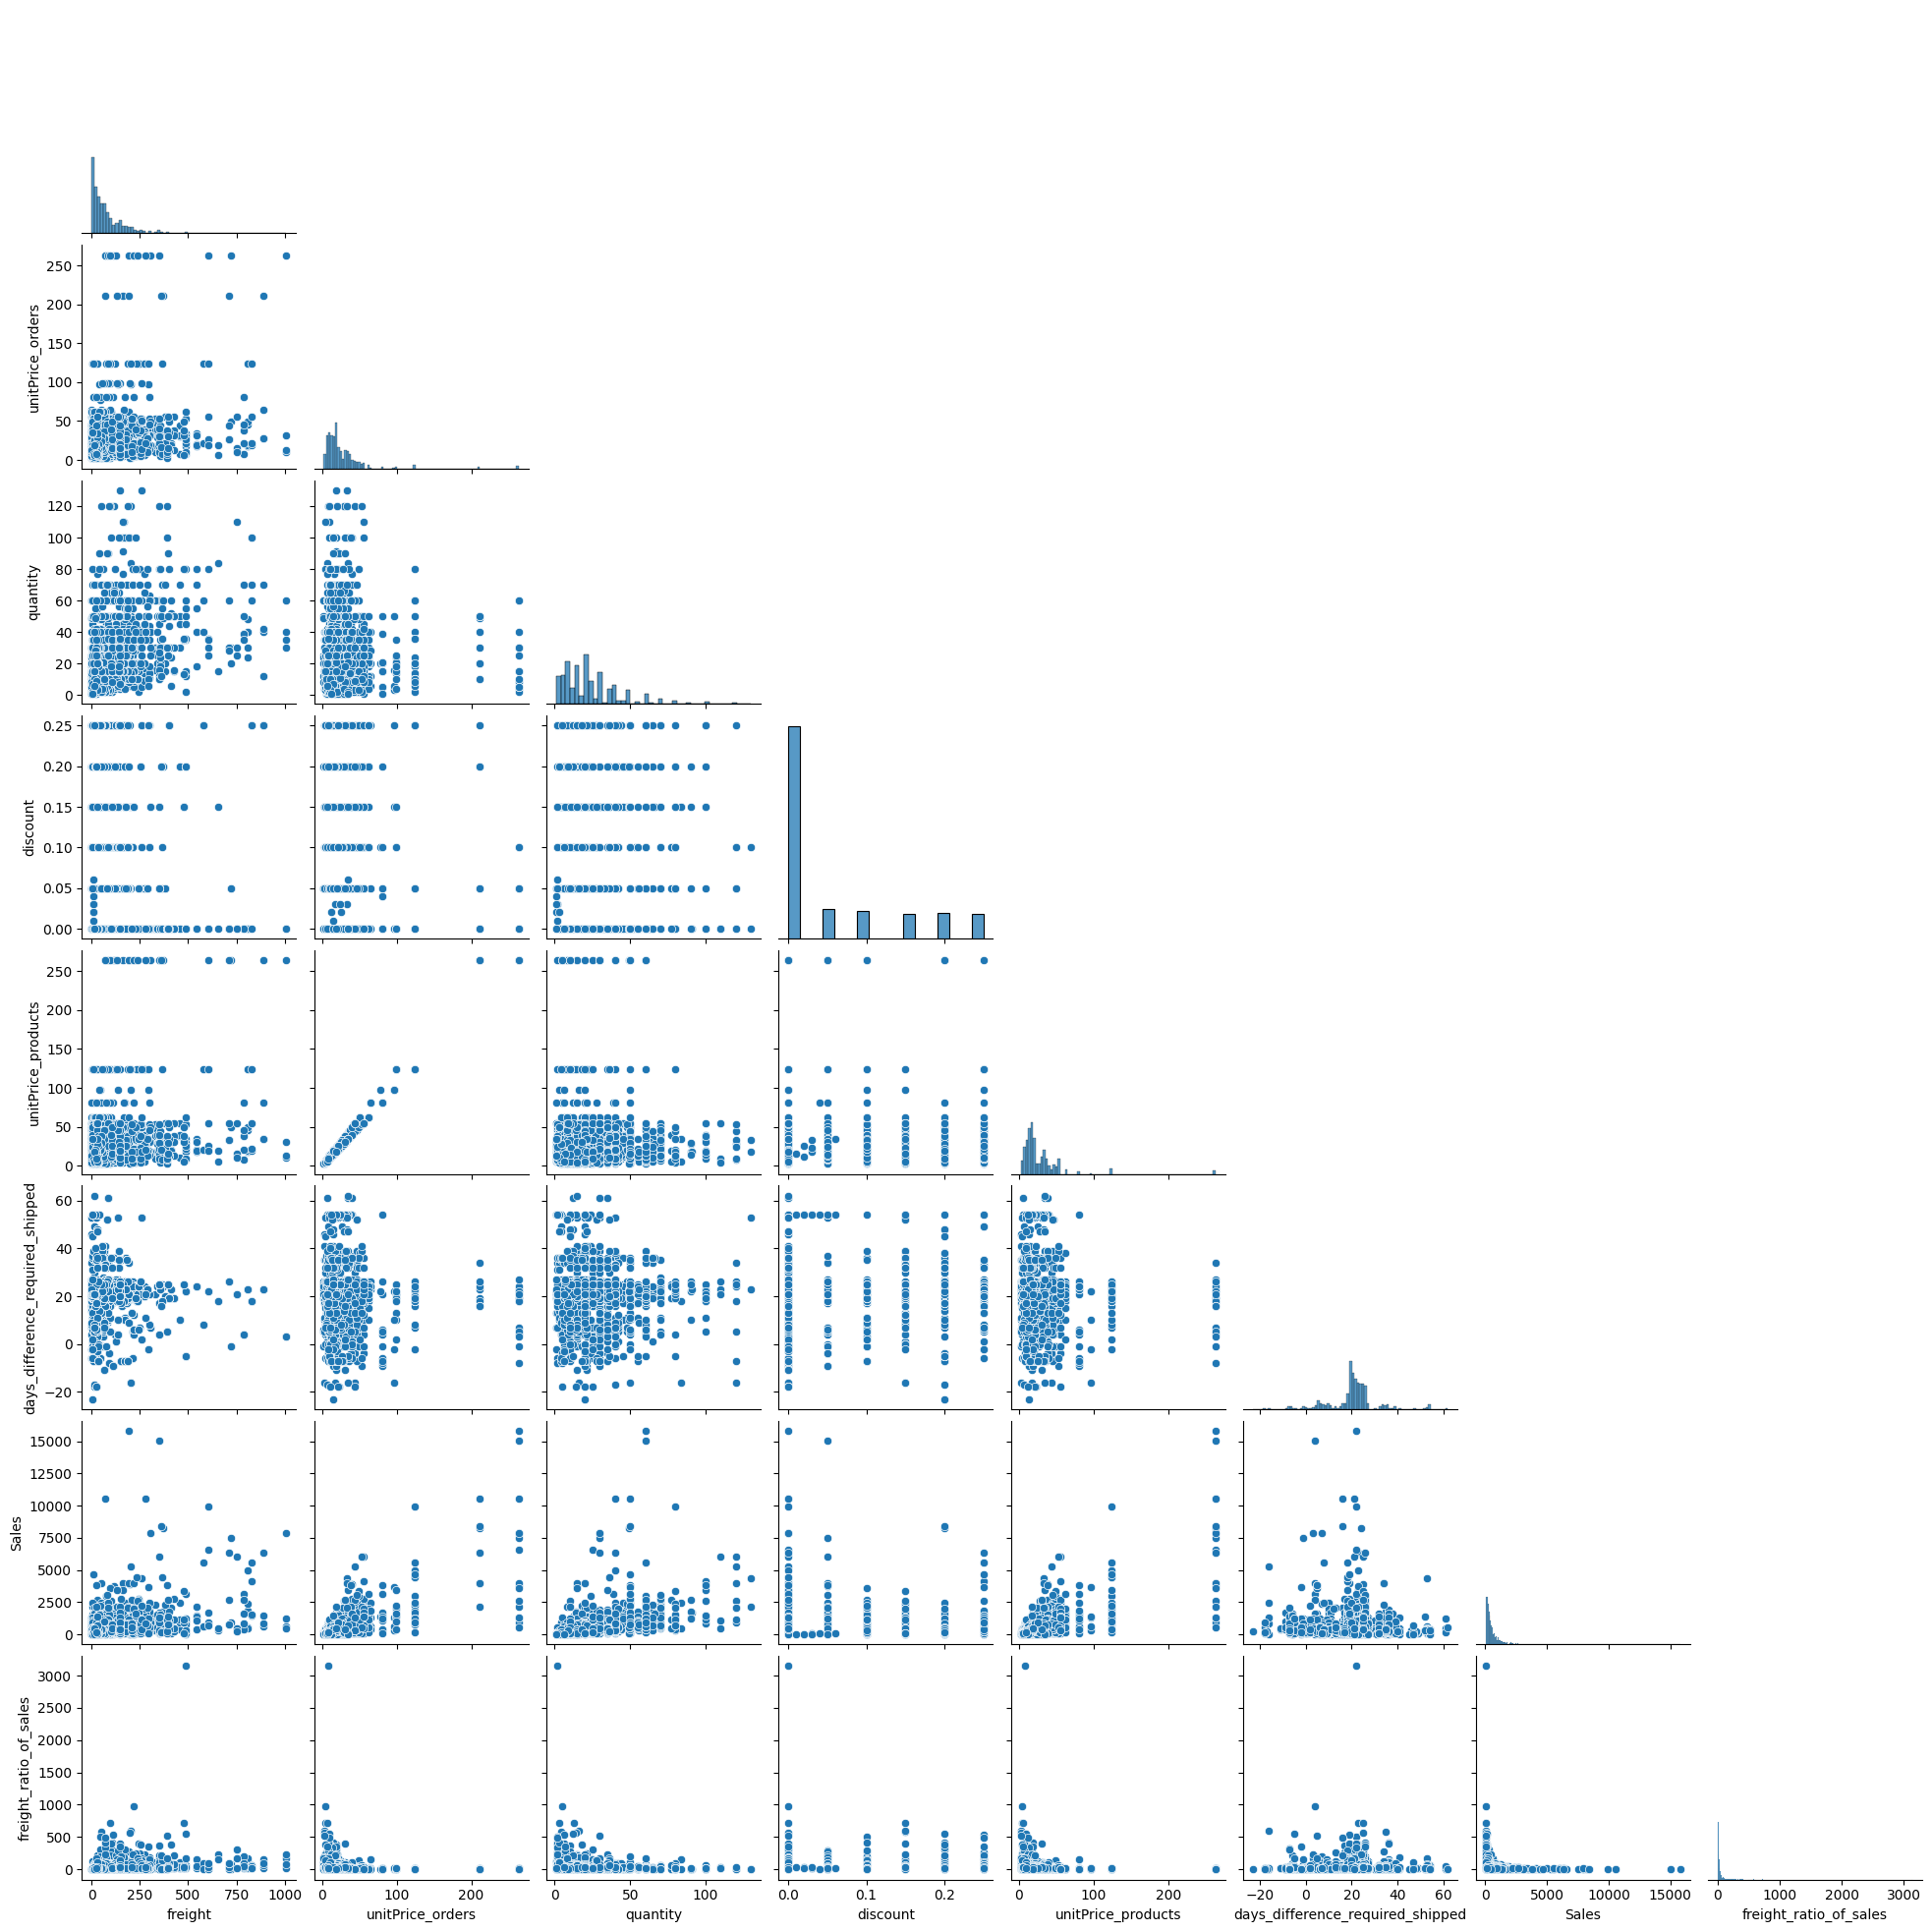

In [66]:
sns.pairplot(df.select_dtypes(include='number'),
             corner=True,
             )

There are positive correlation between sales and quantity,unitPrece_orders 

It seems there are negative correlation between sales and discount

Most quantity falls between 0 to 80 and intersects with freight and unitPrce_orders falls between 0 to 250

The days_difference_required_shipped doesn't correlate with sales or quantity it's normal

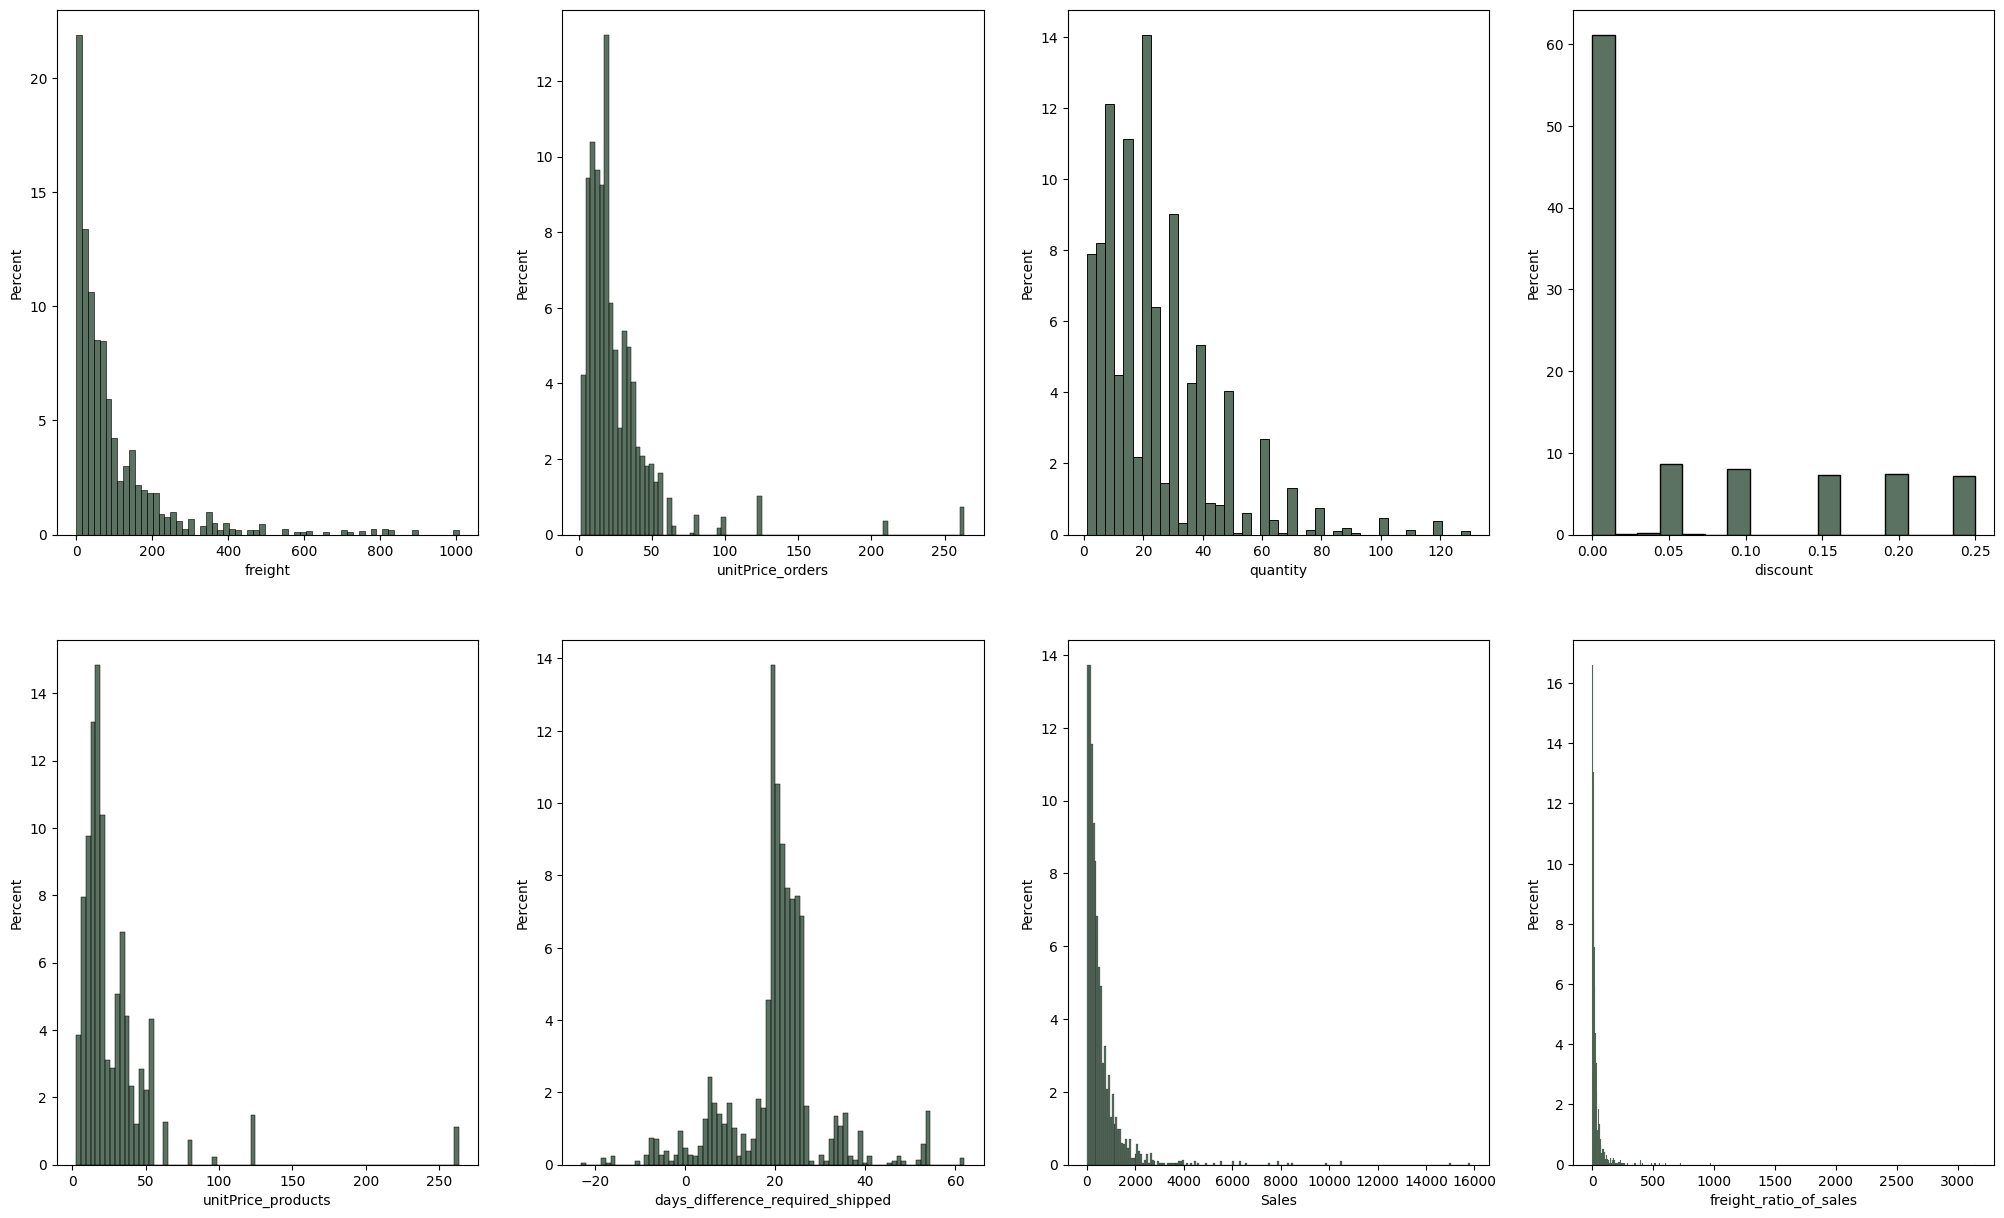

In [67]:
fig = plt.figure(figsize=(25,15))
for idx , col in enumerate(df.select_dtypes(include='number').columns , 1):
    ax = fig.add_subplot(2,4,idx)
    sns.histplot(df[col],
                 ax=ax,
                 stat='percent',
                 color='#24422d',
                 )

In [68]:
print('💡Insight')
print(f'{round(df.freight.between(0,20).mean(),2) * 100}% of freight is between 0 to 20' ,end=' || ')
print(f'{round(df.freight.between(0,200).mean(),2) * 100}% of freight is between 0 to 200 and the freight range between 0 to 1000')
print(f'{round(df.Sales.between(0,100).mean(),2) * 100}% of Sales is between 0 to 100 and the Sales range between 0 to 3000 || {round(df.Sales.between(0,500).mean(),2) * 100}% % of Sales is between 0 to 500 and the Sales range between 0 to 3000')
print(f'{round(df.quantity.between(0,60).mean(),2) * 100}% of quantity is between 0 to 60 and the quantity range between 0 to 120' )
print(f'{round(df.unitPrice_orders.between(0,50).mean(),2) * 100}% of unitPrice_orders is between 0 to 50 and the unitPrice_orders range between 0 to 250' )
print(f'{round(df.discount.between(0,0.02).mean(),2) * 100}% of discount is between 0 to 0.02 While the discount range between 0 to 0.25')


💡Insight
26.0% of freight is between 0 to 20 || 88.0% of freight is between 0 to 200 and the freight range between 0 to 1000
17.0% of Sales is between 0 to 100 and the Sales range between 0 to 3000 || 65.0% % of Sales is between 0 to 500 and the Sales range between 0 to 3000
96.0% of quantity is between 0 to 60 and the quantity range between 0 to 120
92.0% of unitPrice_orders is between 0 to 50 and the unitPrice_orders range between 0 to 250
61.0% of discount is between 0 to 0.02 While the discount range between 0 to 0.25


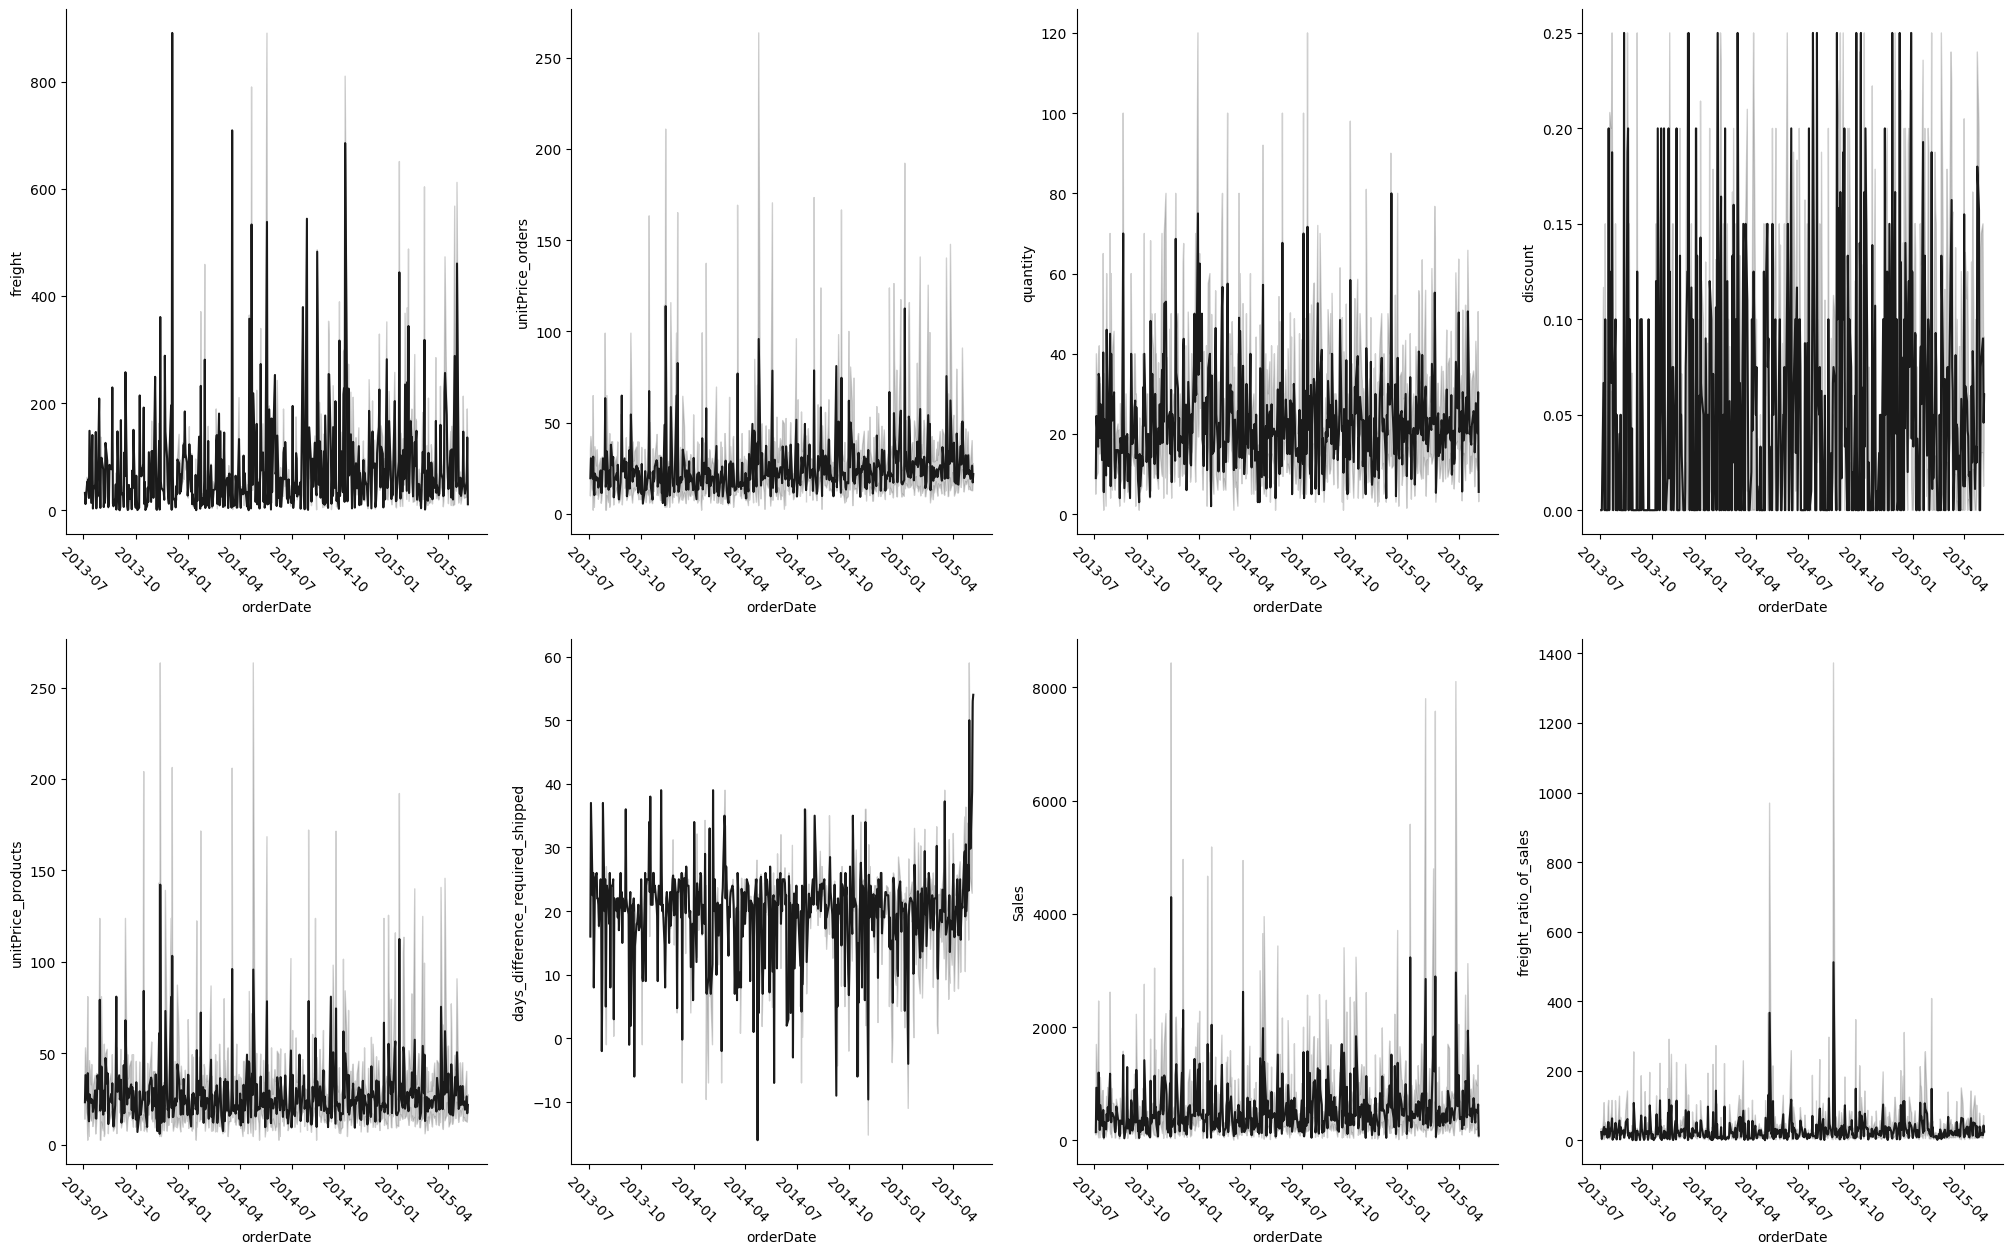

In [70]:
# Overall Trands
trand_number = df.select_dtypes(include='number')
fig = plt.figure(figsize=(25,15))
for idx , col in enumerate(trand_number.select_dtypes(include='number').columns , 1):
    ax = fig.add_subplot(2,4,idx)
    sns.lineplot(
                 x = df['orderDate'] ,
                 y = df[col],
                 ax=ax,
                 color='#1a1a1a')
    sns.despine()
    plt.xticks(rotation=-45 )

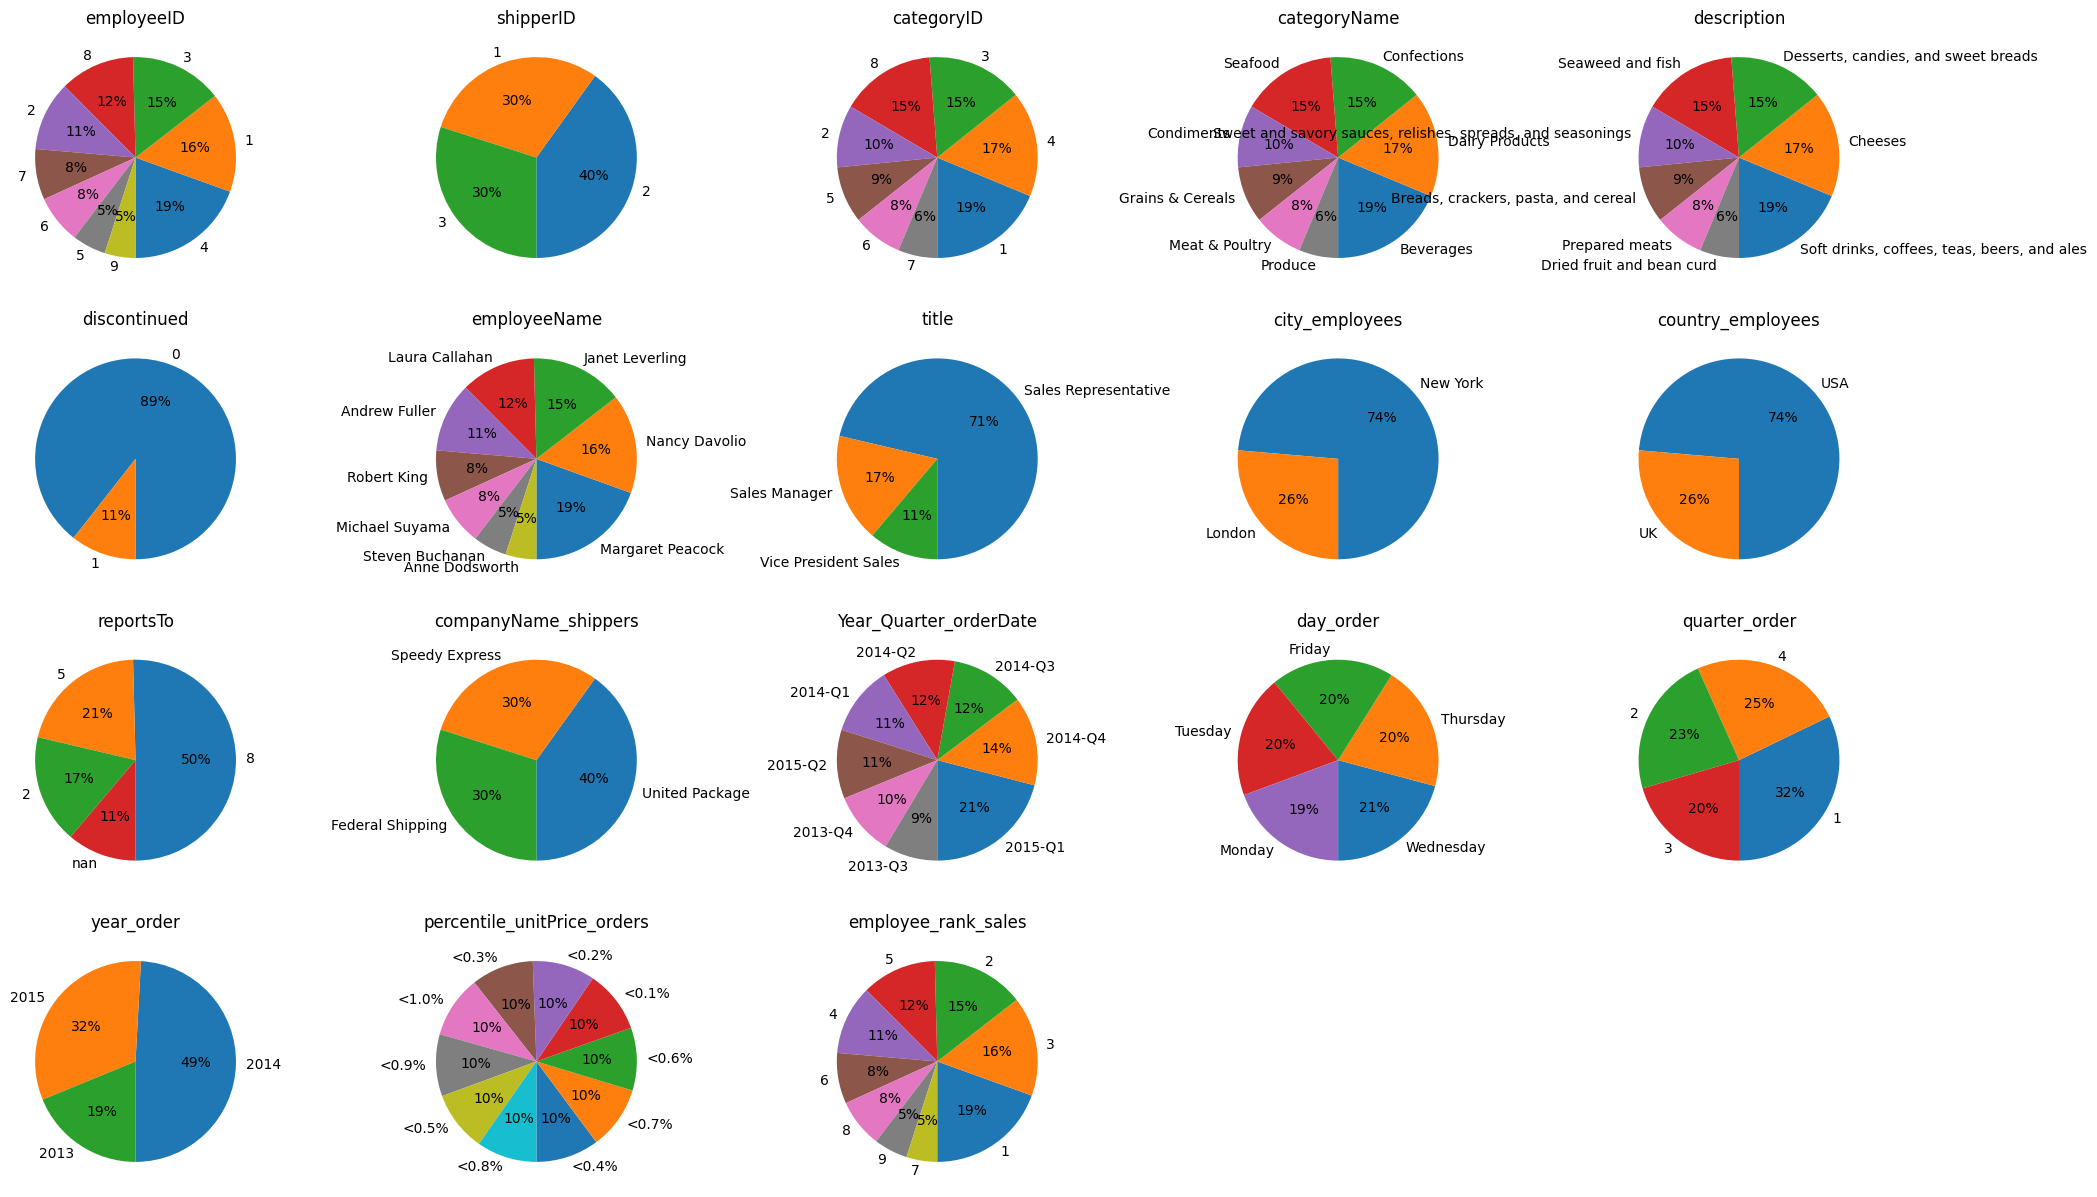

In [ ]:
# Catch the columns which have  number of unique values less or equal than 10
doc = df.select_dtypes(['category','object']).describe()
columns = [doc.columns[i] for  i in range(doc.shape[1]) if doc.loc['unique'][i] <= 10]   

fig = plt.figure(figsize=(25,15))
for idx , col in enumerate(columns , 1):
    ax = fig.add_subplot(4,5,idx)
    plt.pie(
         x= df[col].value_counts().tolist(),
         labels=df[col].value_counts().index.tolist(),
         startangle=-90,
         autopct= '%.0f%%'
    )
    ax.set_title(col)
    


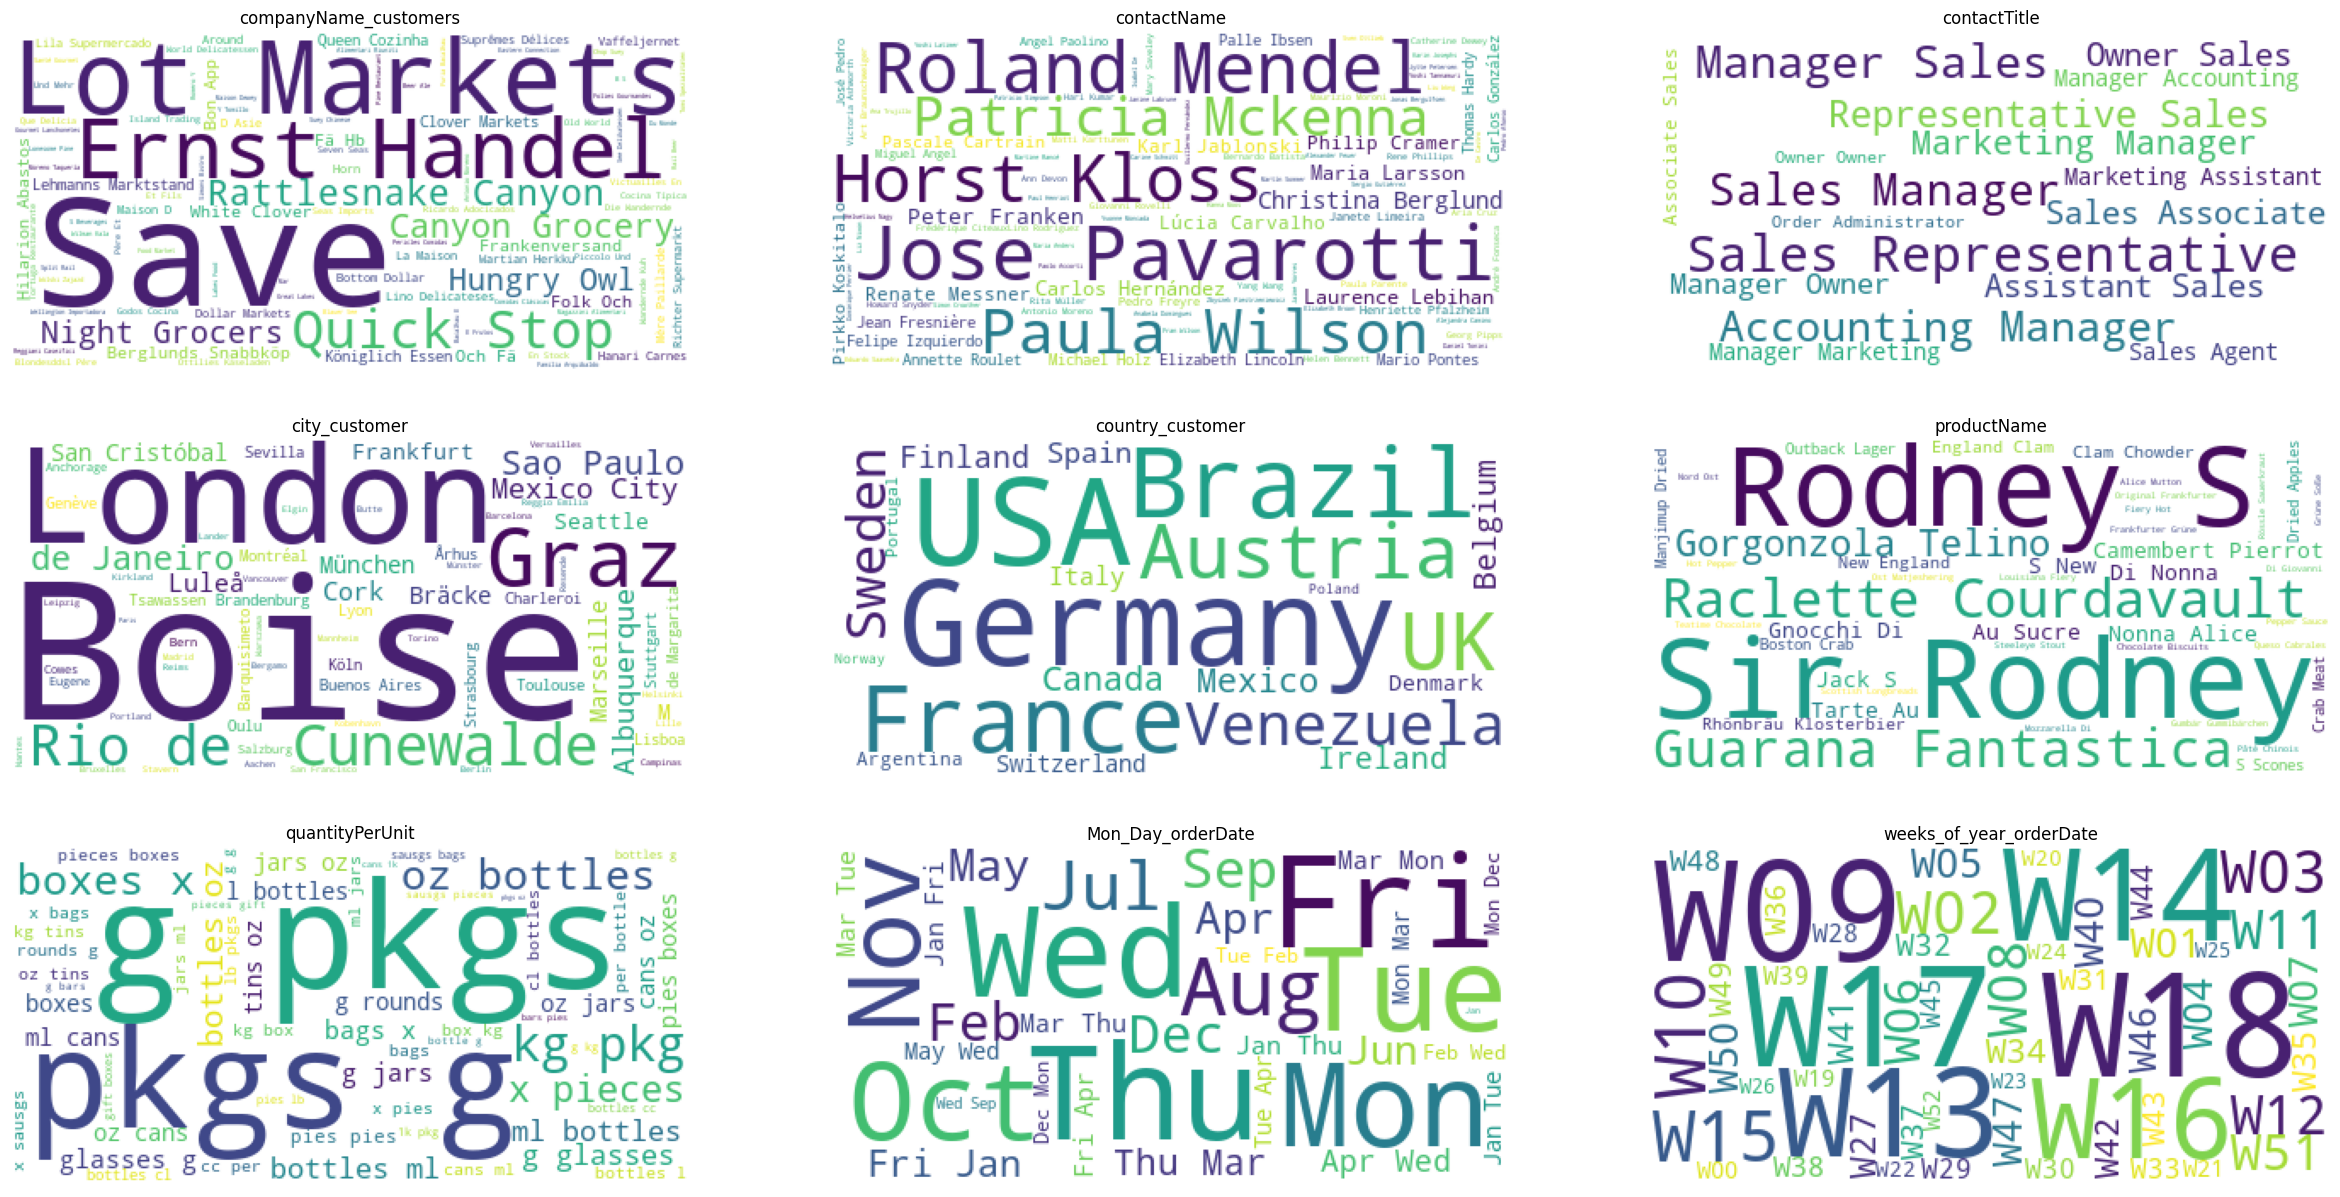

In [ ]:
# Catch the columns which have  number of unique values greater than 10 
from wordcloud import WordCloud ,STOPWORDS
columns = ['companyName_customers','contactName','contactTitle','city_customer','country_customer','productName','quantityPerUnit','Mon_Day_orderDate','weeks_of_year_orderDate']
fig = plt.figure(figsize=(30,15))
for idx , col in enumerate(columns , 1):
    ax = fig.add_subplot(3,3,idx)
    word_cloud = WordCloud(stopwords=set(STOPWORDS),
                       random_state=42,
                       background_color='white')\
                      .generate(' '.join(df[col].astype('str')))
    plt.imshow(word_cloud)
    plt.axis('off')
    ax.set_title(col)

C:\Users\bhr\AppData\Local\Temp\ipykernel_11048\1304648536.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




C:\Users\bhr\AppData\Local\Temp\ipykernel_11048\1304648536.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\bhr\AppData\Local\Temp\ipykernel_11048\1304648536.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\bhr\AppData\Local\Temp\ipykernel_11048\1304648536.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\bhr\AppData\Local\Temp\ipykernel_11048\1304648536.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\bhr\AppData\Local\Temp\ipykernel_11048\1304648536.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\bhr\AppData\Local\Temp\ipykernel_11048\1304648536.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\bhr\AppData\Local\Temp\ip

Text(0.5, 0.98, 'Total Sales by Each Column')

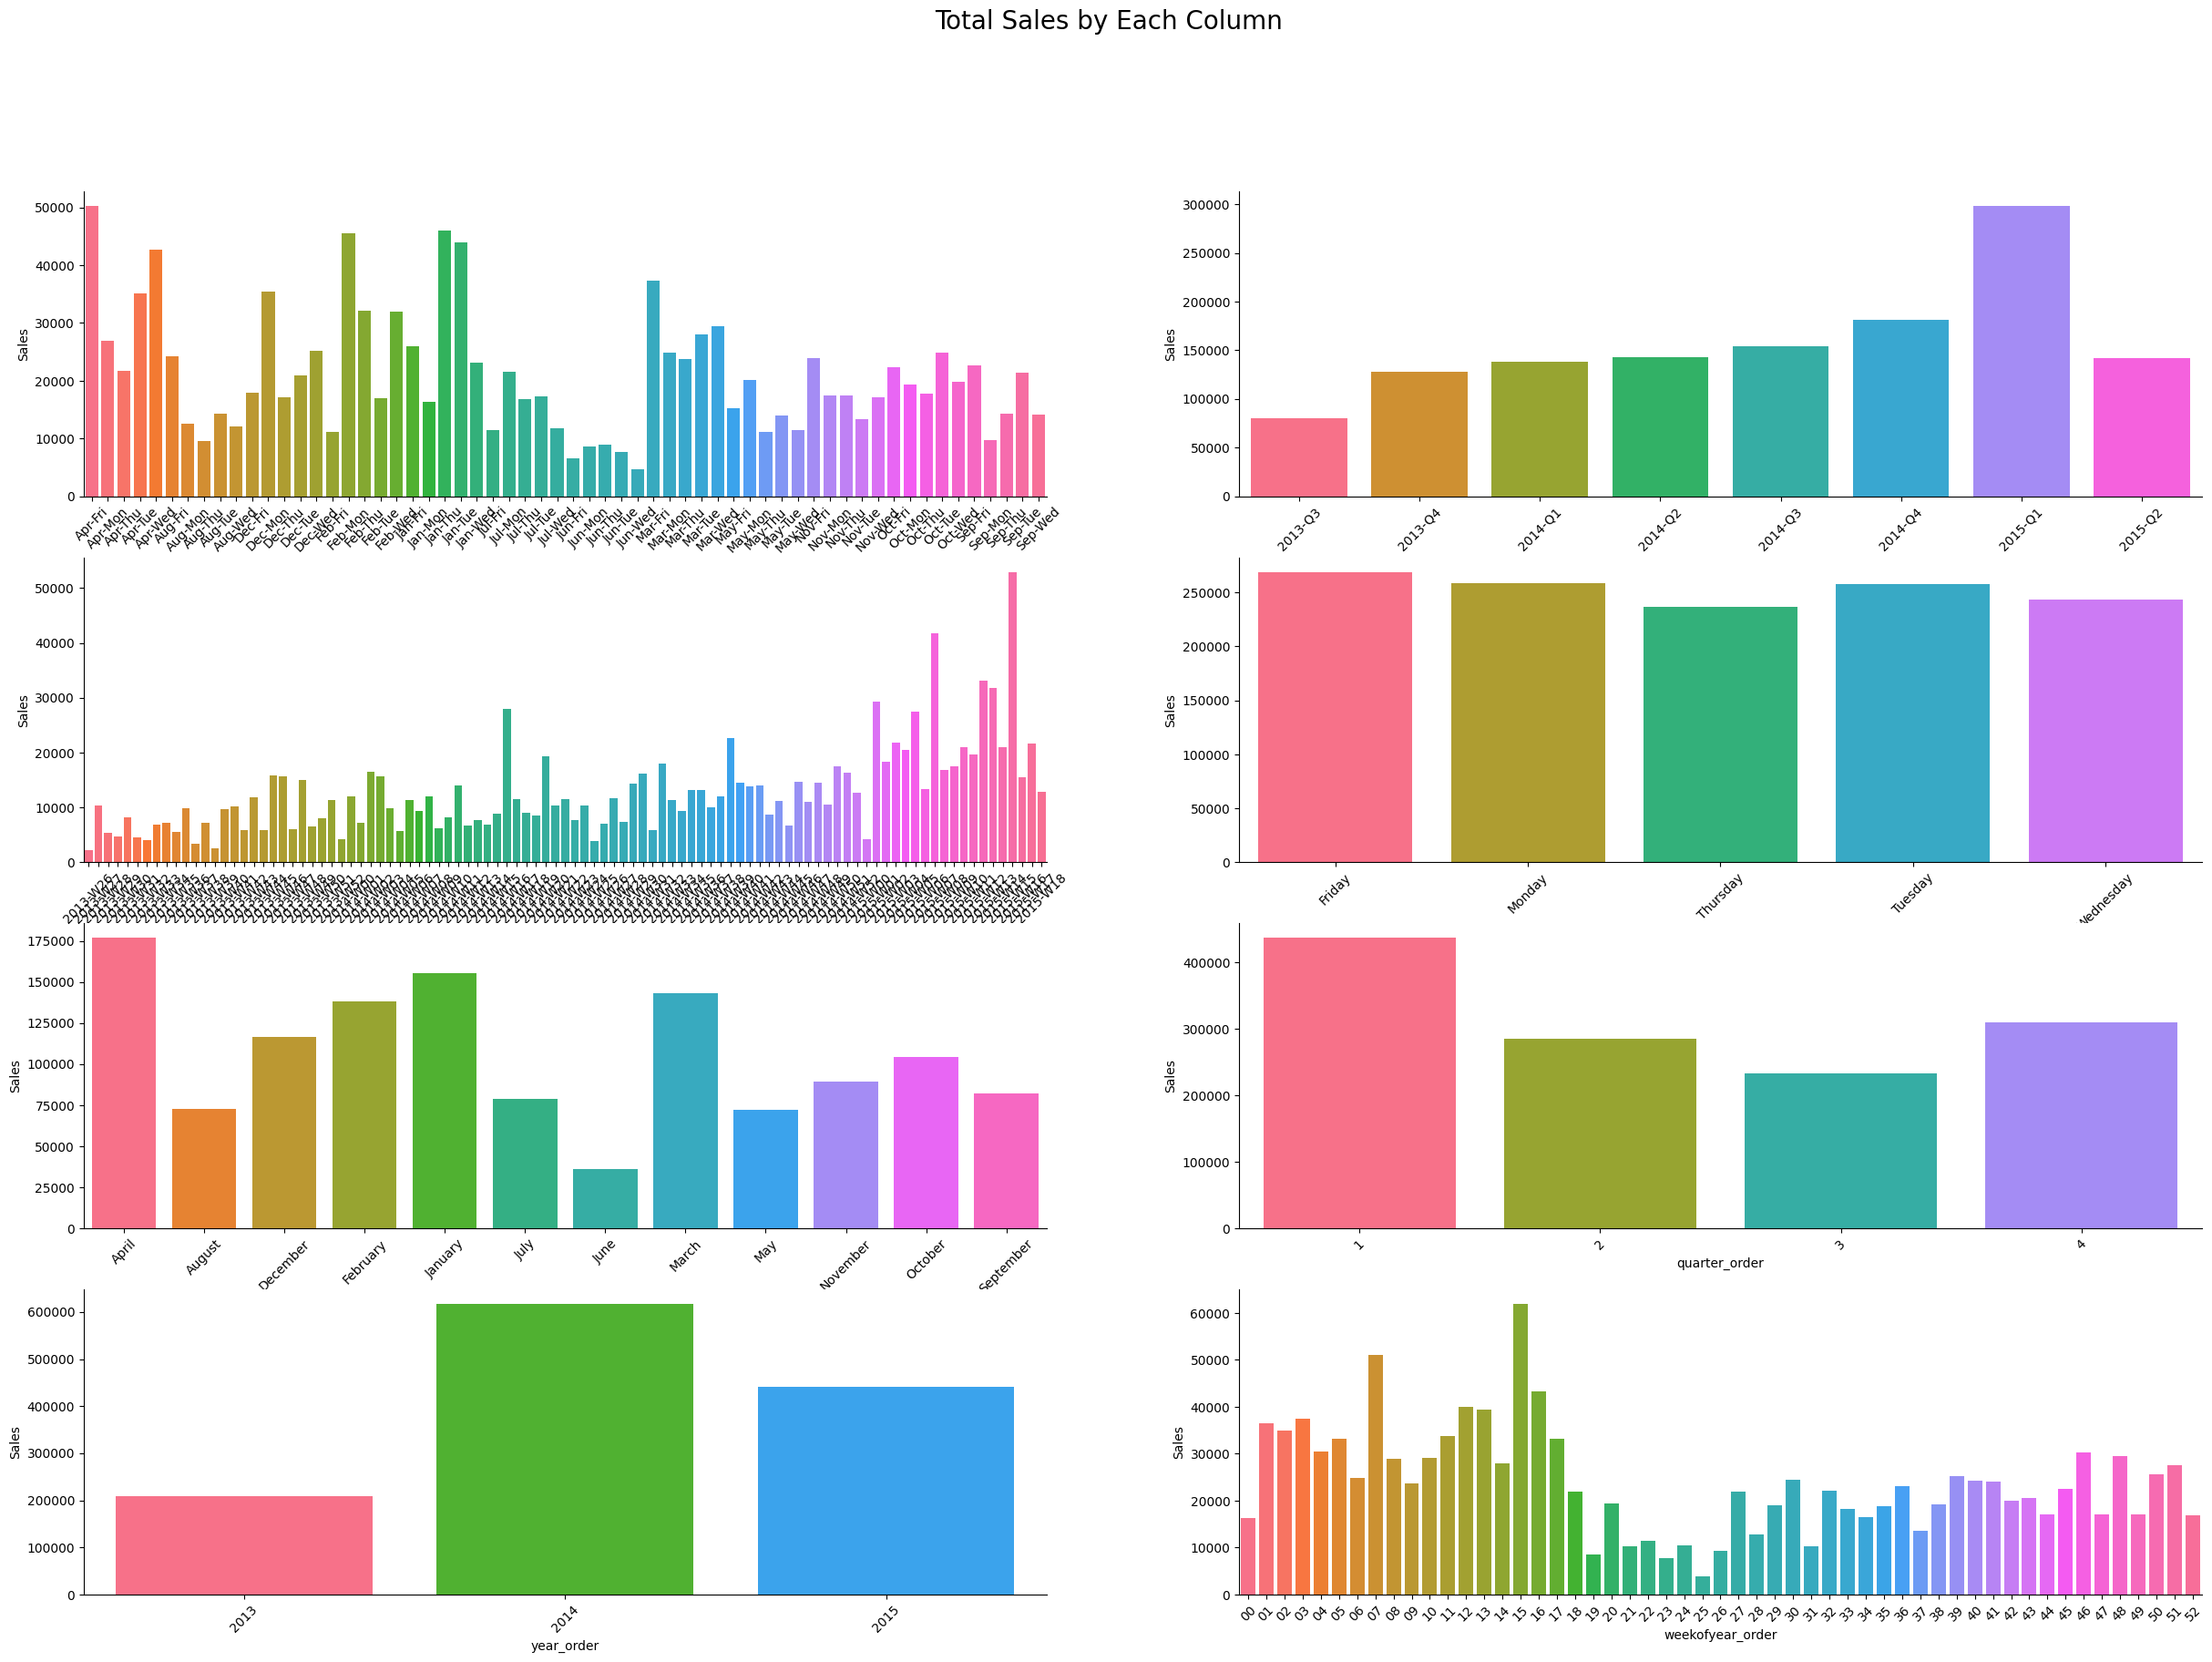

In [ ]:
for col in ['Year_Quarter_orderDate','weeks_of_year_orderDate','Mon_Day_orderDate','Year_Month_orderDate', 
            'day_order', 'month_order','quarter_order', 'year_order', 'weekofyear_order']:
    df[col] = df[col].astype('category')
    
columns = ['Mon_Day_orderDate', 'Year_Quarter_orderDate','weeks_of_year_orderDate', 'day_order', 'month_order','quarter_order', 'year_order', 'weekofyear_order']

fig = plt.figure(figsize=(30,20))
for idx , col in enumerate(columns , 1):
    ax = fig.add_subplot(4,2,idx)
    sns.barplot(data=df,
                x=df[col],
                y='Sales',
                estimator='sum',
                ci=None,
                palette='husl',
                saturation=5)
    sns.despine()
    plt.xticks(rotation=45 )
fig.suptitle('Total Sales by Each Column' ,fontsize=20)

C:\Users\bhr\AppData\Local\Temp\ipykernel_11048\392551813.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\bhr\AppData\Local\Temp\ipykernel_11048\392551813.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\bhr\AppData\Local\Temp\ipykernel_11048\392551813.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\bhr\AppData\Local\Temp\ipykernel_11048\392551813.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\bhr\AppData\Local\Temp\ipykernel_11048\392551813.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\bhr\AppData\Local\Temp\ipykernel_11048\392551813.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\bhr\AppData\Local\Temp\ipykernel_1104

Text(0.5, 0.98, 'Average Sales by Each Column')

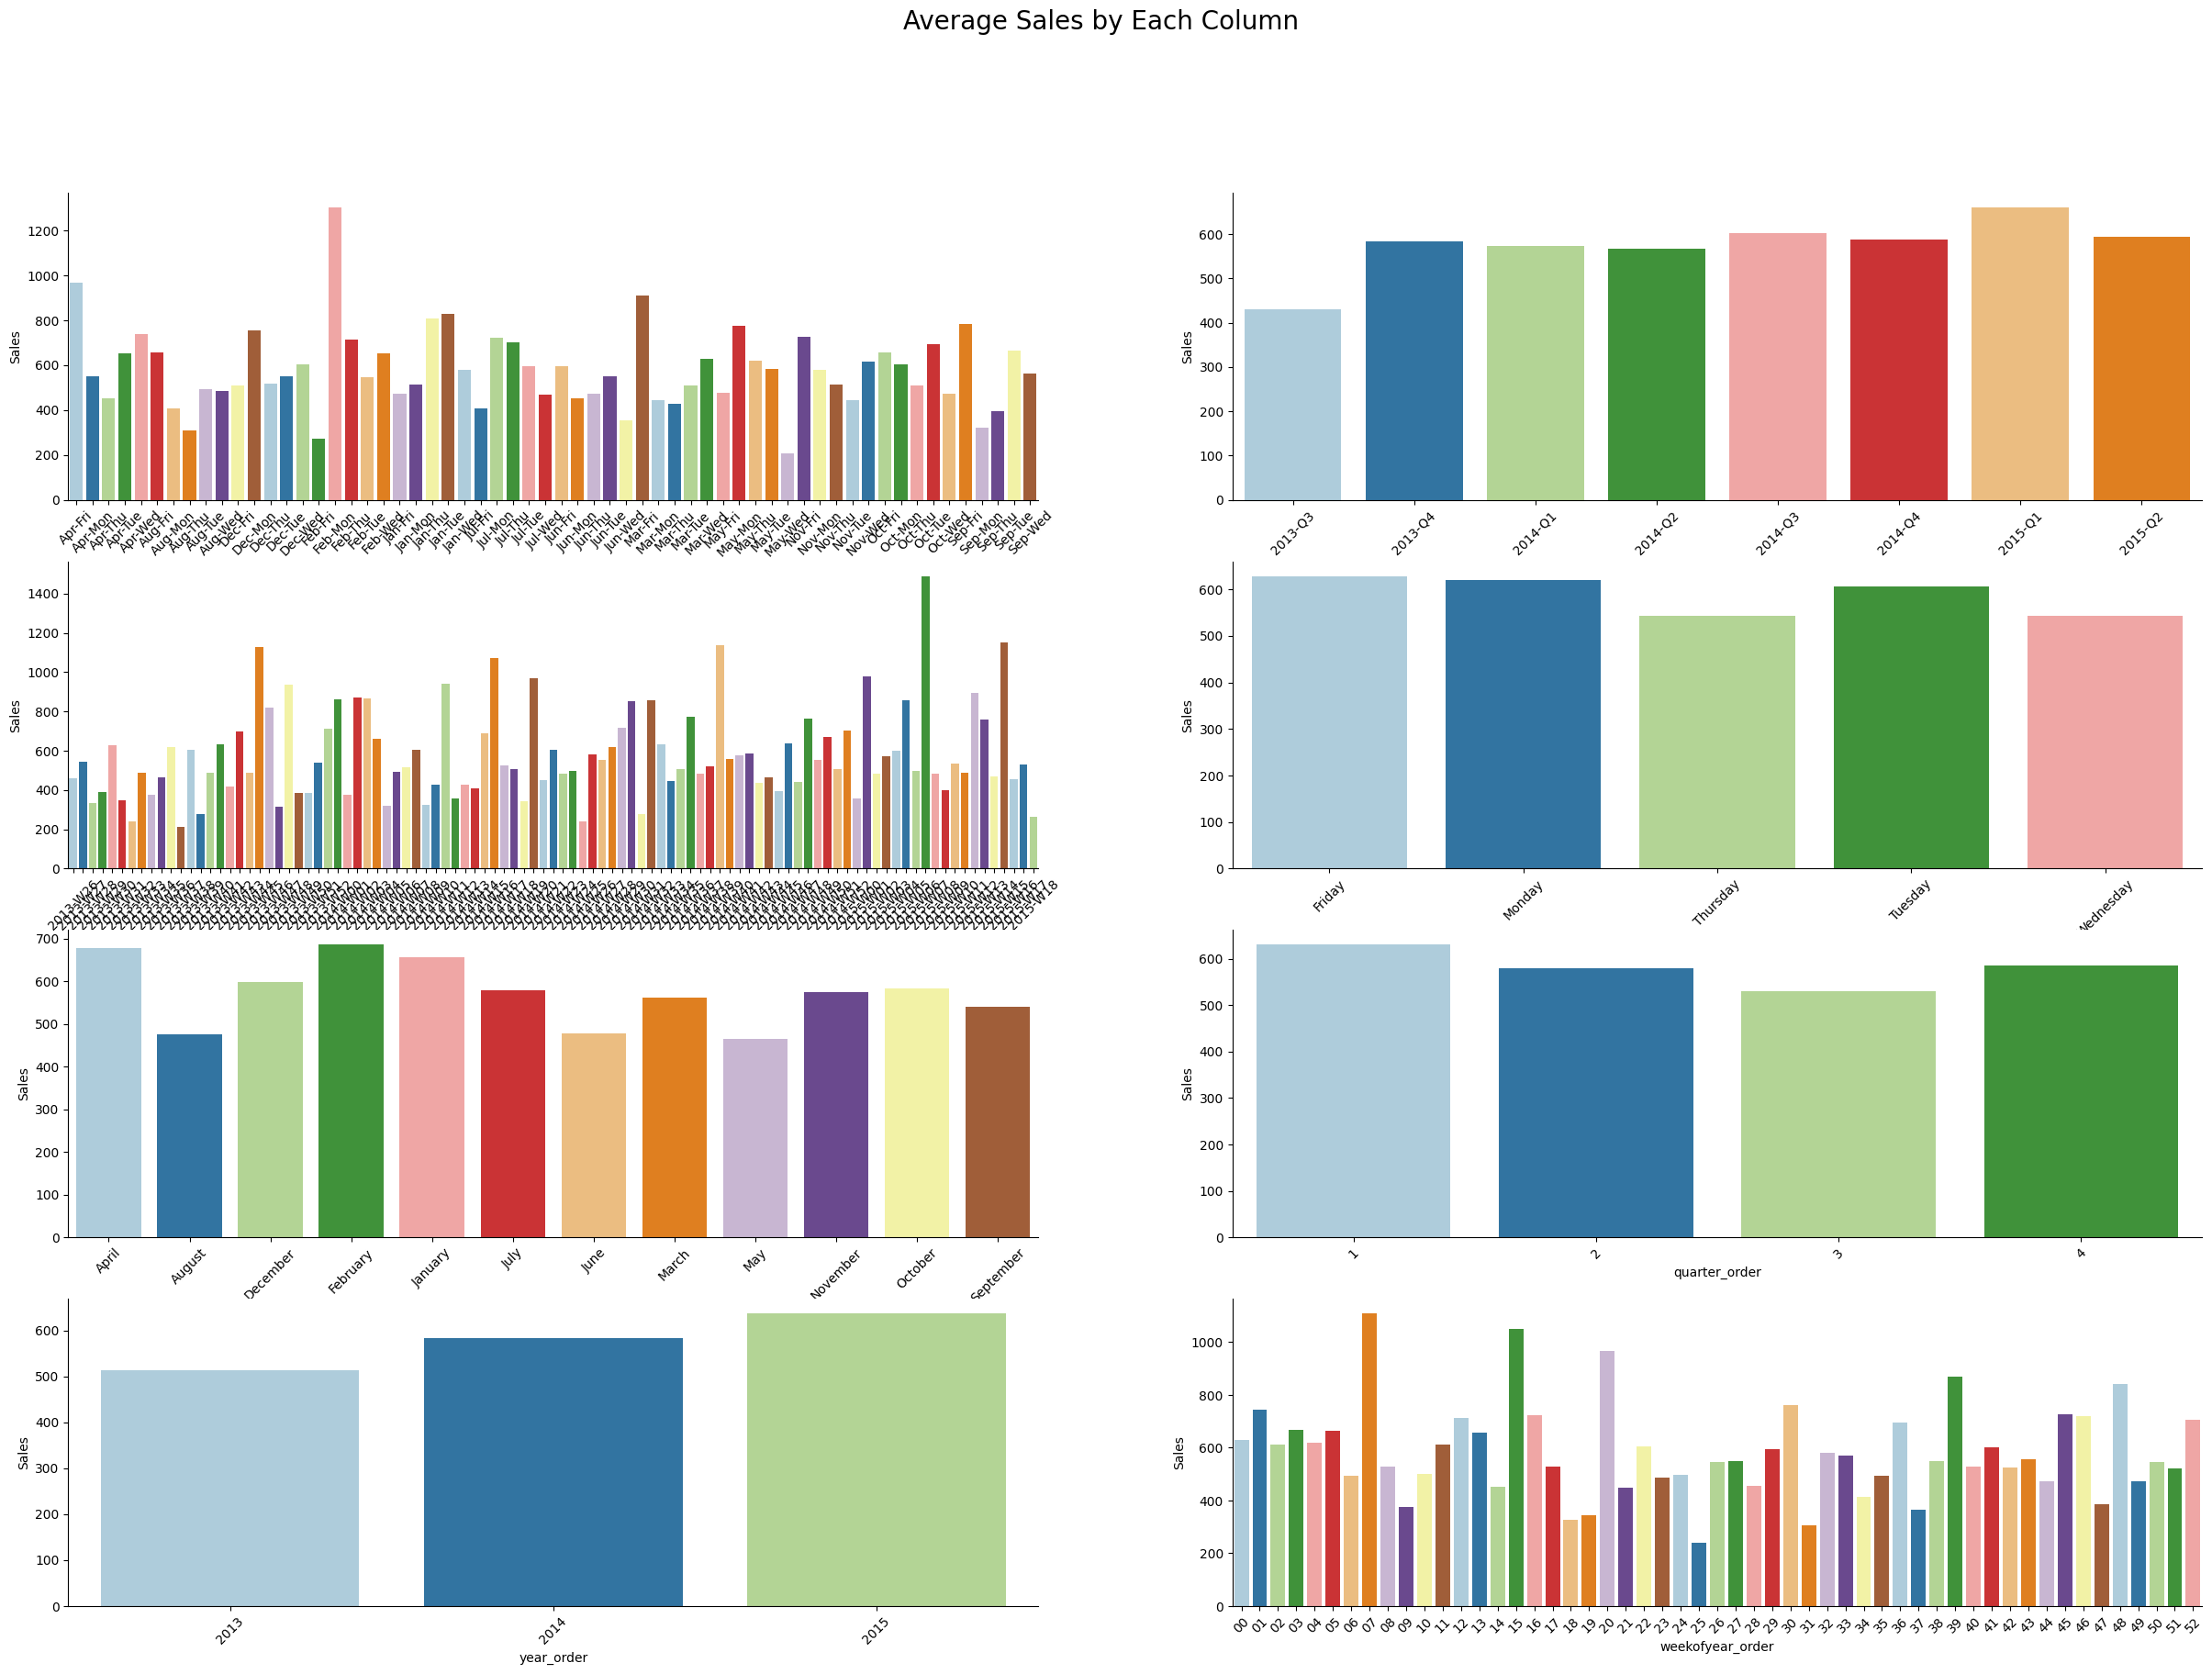

In [ ]:

columns = ['Mon_Day_orderDate', 'Year_Quarter_orderDate','weeks_of_year_orderDate', 'day_order', 'month_order','quarter_order', 'year_order', 'weekofyear_order']

fig = plt.figure(figsize=(30,20))
for idx , col in enumerate(columns , 1):
    ax = fig.add_subplot(4,2,idx)
    sns.barplot(data=df,
                x=df[col],
                y='Sales',
                estimator='mean',
                ci=None,
                palette='Paired')
    sns.despine()
    plt.xticks(rotation=45 );
fig.suptitle('Average Sales by Each Column',fontsize=20)

<AxesSubplot:>

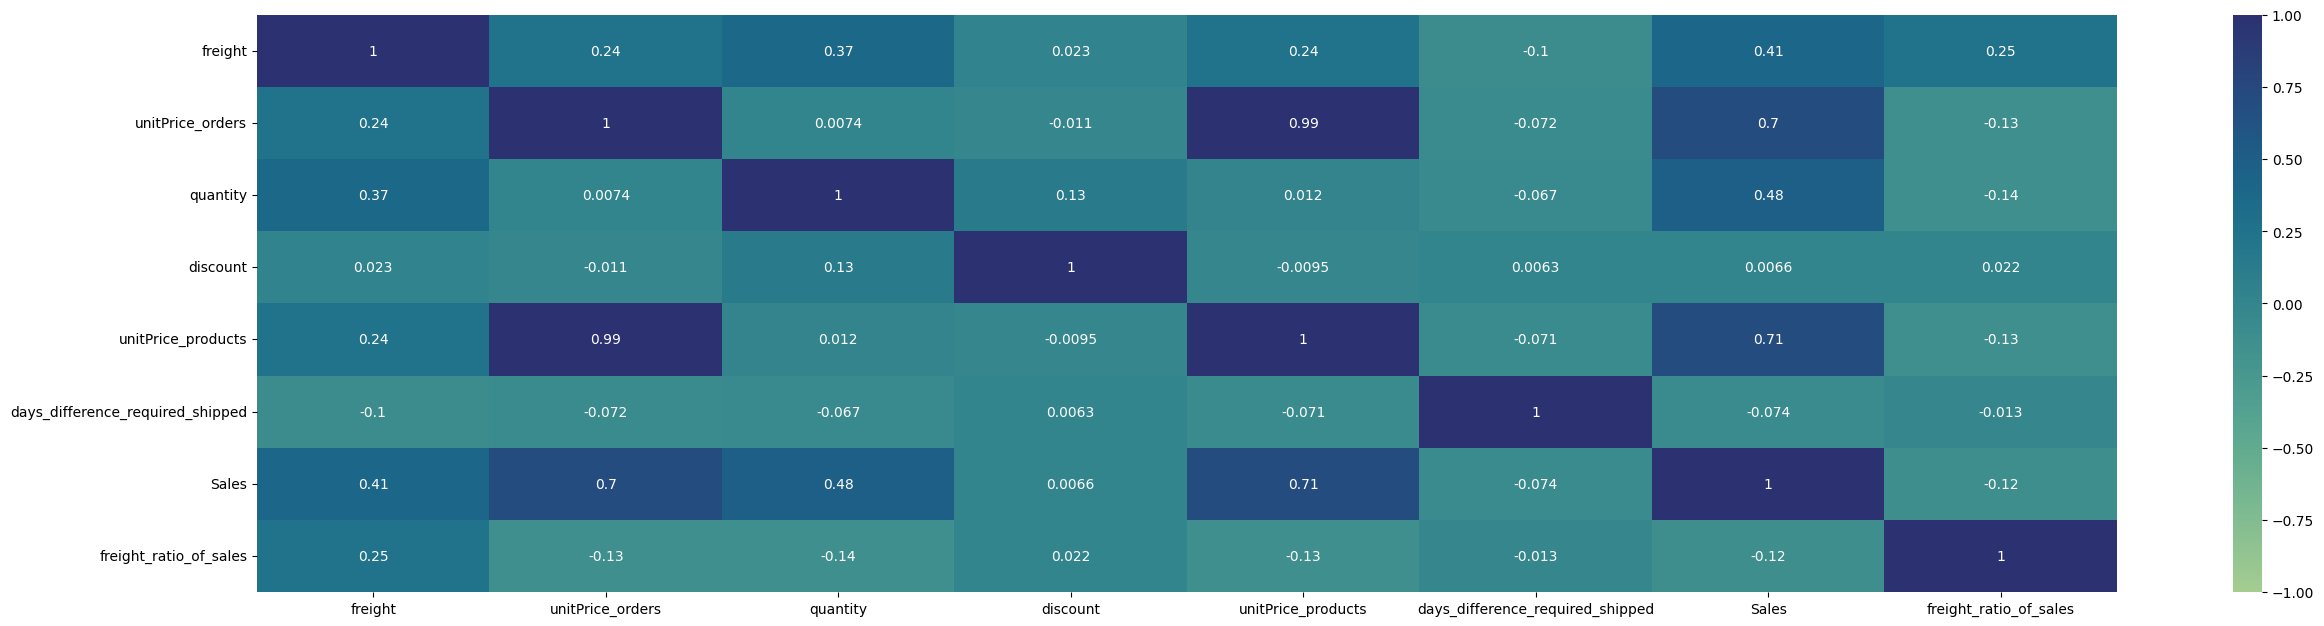

In [ ]:
plt.figure(figsize=(30,7.5))
sns.heatmap(df.select_dtypes('number').corr() , annot=True , cmap="crest" , vmax=1 , vmin=-1)

That graph shows a correlation for each column with each other which's prove what I saw above with pairplot graph

__Statistical Analysis__

In [24]:
# Create a Custom interactive report using Plotly and Dash to group any categorical column by Sales and show complete descriptive stats information
with open('H:/CS50/Portfolio Projects/Northwind Traders/assets/reset.css','w') as file:
    file.write('body{background-color:white;}\n')
    file.close()
app = JupyterDash(__name__,external_stylesheets=['/assets/reset.css'])
app.layout = html.Div([
                    dmc.Grid([
                              dmc.Col(children=[
                               html.P('Select the grouped column.'),   
                               dcc.Dropdown(
                               options=(df.select_dtypes('category').columns.tolist()),
                               value='productName',
                               id='grouped-column')]
                                   ,span=6 ),

                               dmc.Col(children=[
                               html.P('Select one of the metrics.') ,    
                               dcc.Dropdown(
                               options=(df.describe().index.tolist()),
                               value = 'mean' ,
                               id='base-metrics')
                                   ],span=6 ) ,

                             ]
                            ) ,
                     dmc.Grid(dmc.Col(dcc.Graph(id='graph')
                                   ,span=12 ))       

])

@app.callback(
    Output('graph','figure'),
    Input('grouped-column','value'),
    Input('base-metrics','value')

)
def describe_by_Sales(grouped_column , base_column):

       data = df.groupby(grouped_column)[['Sales']].describe().droplevel(0 , axis=1).reset_index()

       fig = px.bar(data,
              y= grouped_column,
              x= base_column,
              height=800,
              template='plotly_white',
              base=base_column,
              title=f'{base_column} of Sales by {grouped_column.replace("_"," ")}',
              text=base_column,
              hover_data={base_column:':.2f'})\
              .update_traces(texttemplate = '%{text:.2s}' , textposition = 'outside')
       return fig
if __name__ == '__main__':
       app.run_server(mode='inline',port=8050)

In [ ]:
# hypothesis testing
from scipy.stats import ttest_ind

Null hypothesis: There is no difference in average of Sales between categoryname(meat & proultry) and categoryname(produce) (any observed difference in the sample data is due to chance or sampling variability).

Alternative hypothesis: There is a difference in average of Sales between categoryname(meat & proultry) and categoryname(produce) (any observed difference in the sample data is due to an actual difference in the corresponding population means).

Next, choose 5% as the significance level and proceed with a two-sample t-test.

In [ ]:
df.groupby('categoryName')['Sales'].mean().sort_values()

categoryName
Seafood            397.76
Grains & Cereals   488.49
Condiments         490.96
Confections        501.07
Dairy Products     640.73
Beverages          663.04
Produce            735.18
Meat & Poultry     942.33
Name: Sales, dtype: float64

In [ ]:
# 1. Isolate the Sales column for Meat & Poultry.
meat_proultry = df[df['categoryName'] == 'Meat & Poultry']['Sales']

# 2. Isolate the Sales column for Produce.
produce = df[df['categoryName'] == 'Produce']['Sales']

# 3. Perform the t-test
_,pvalue =ttest_ind(a=meat_proultry, b=produce, equal_var=False)

if pvalue < 0.05:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')  

fail to reject the null hypothesis


There is no statistically significant difference in the average sales between (meat & proulty) and (produce) and it occurs due to chance

--

Null hypothesis: There is no difference in average of Sales between USA and Austria    

Alternative hypothesis: There is a difference in average of Sales between USA and Austria

Next, choose 5% as the significance level and proceed with a two-sample t-test.

In [ ]:
df.groupby('country_customer')['Sales'].mean().sort_values()

country_customer
Poland         220.75
Argentina      238.80
Italy          297.55
Mexico         327.53
Spain          333.02
Finland        348.33
Norway         358.45
Portugal       382.41
UK             436.82
France         442.16
Venezuela      481.45
Brazil         526.73
Sweden         561.81
Belgium        604.02
Switzerland    609.47
Canada         669.28
USA            697.68
Germany        702.09
Denmark        710.02
Ireland        908.73
Austria       1024.03
Name: Sales, dtype: float64

In [ ]:
# 1. Isolate the Sales column for USA.
USA = df[df['country_customer'] == 'USA']['Sales']

# 2. Isolate the Sales column for Austria.
Austria = df[df['country_customer'] == 'Austria']['Sales']

# 3. Perform the t-test
_,pvalue =ttest_ind(a=USA, b=Austria, equal_var=False)

if pvalue < 0.05:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')  

reject the null hypothesis


There is statistically significant difference in the average sales between USA and Austria and it doesn't occurs due to chance

In [ ]:
# Skews
for col in df.select_dtypes('number').columns:
    print(f'{col}: {df[col].skew()} {"👈(Left Skew)" if "-" in str(df[col].skew()) else "👉(Right Skew)"}')

freight: 3.251077651977539 👉(Right Skew)
unitPrice_orders: 5.102435111999512 👉(Right Skew)
quantity: 1.7824786749312291 👉(Right Skew)
discount: 1.2083631753921509 👉(Right Skew)
unitPrice_products: 5.069472722898938 👉(Right Skew)
days_difference_required_shipped: -0.0015825229523388205 👈(Left Skew)
Sales: 7.049035134624706 👉(Right Skew)
freight_ratio_of_sales: 19.067823686727852 👉(Right Skew)


In [25]:
#Studying outliers
df_with_outliers = df.copy()
outliers_columns = outliers(df)
outliers_columns = outliers_columns.loc[outliers_columns.num_outliers != 0 , 'columns'].tolist()
def select_all_outliers(data):
    
        """
        Select all outliers from a given data and iterate for each column to catch the outliers from it and append its indexs so I can remove it all at once from the original data 
        and finally return a unique list because definitely there are duplicates in numbers       
        """
        outlier_list = []  
        for col in outliers_columns:
                IQR = data[col].quantile(.75) - data[col].quantile(.25)
                lower = data[col].quantile(.25) - 1.5 * IQR
                upper = data[col].quantile(.75) + 1.5 * IQR
                outliers = data[(data[col] < lower) | (data[col]  > upper)].index.tolist()
                outlier_list.append(outliers)
        index_outliers = pd.Series([ii  for i in outlier_list for ii in i]).unique().tolist()

        return  data[data.index.isin(index_outliers)].reset_index(drop=True)

         
df_with_outliers = select_all_outliers(df_with_outliers) 
df_with_outliers.head()

orderID customerID employeeID  orderDate requiredDate shippedDate shipperID  \
0   10921      VAFFE          1 2015-03-03   2015-04-14  2015-03-09         1   
1   10351      ERNSH          1 2013-11-11   2013-12-09  2013-11-20         1   
2    1085      VICTE          1 2015-01-23   2015-03-06  2015-01-30         1   
3   10894      SAVEA          1 2015-02-18   2015-03-18  2015-02-20         1   
4   10991      QUICK          1 2015-04-01   2015-04-29  2015-04-07         1   

   freight productID  unitPrice_orders  quantity  discount  \
0   176.48        35             18.00        10      0.00   
1   162.33        38            210.80        20      0.05   
2    49.19         7             15.00        30      0.15   
3   116.13        75              7.75       120      0.05   
4    38.51        76             18.00        90      0.20   

  companyName_customers     contactName          contactTitle city_customer  \
0          Vaffeljernet     Palle Ibsen         Sales Manager         Århus   
1          Ernst Handel   Roland Mendel         Sales Manager          Graz   
2  Victuailles En Stock    Mary Saveley           Sales Agent          Lyon   
3    Save A Lot Markets  Jose Pavarotti  Sales Representative         Boise   
4            Quick Stop     Horst Kloss    Accounting Manager     Cunewalde   

  country_customer categoryID categoryName  \
0          Denmark          1    Beverages   
1          Austria          1    Beverages   
2           France          1    Beverages   
3              USA          1    Beverages   
4          Germany          1    Beverages   

                                   description           productName  \
0  Soft drinks, coffees, teas, beers, and ales        Steeleye Stout   
1  Soft drinks, coffees, teas, beers, and ales         Côte De Blaye   
2  Soft drinks, coffees, teas, beers, and ales         Outback Lager   
3  Soft drinks, coffees, teas, beers, and ales  Rhönbräu Klosterbier   
4  Soft drinks, coffees, teas, beers, and ales           Lakkaliköri   

       quantityPerUnit  unitPrice_products discontinued   employeeName  \
0   24 - 12 oz bottles               18.00            0  Nancy Davolio   
1   12 - 75 cl bottles              263.50            0  Nancy Davolio   
2  24 - 355 ml bottles               15.00            0  Nancy Davolio   
3   24 - 0.5 l bottles                7.75            0  Nancy Davolio   
4               500 ml               18.00            0  Nancy Davolio   

                  title city_employees country_employees reportsTo  \
0  Sales Representative       New York               USA         8   
1  Sales Representative       New York               USA         8   
2  Sales Representative       New York               USA         8   
3  Sales Representative       New York               USA         8   
4  Sales Representative       New York               USA         8   

  companyName_shippers Mon_Day_orderDate Year_Quarter_orderDate  \
0       Speedy Express           Mar-Tue                2015-Q1   
1       Speedy Express           Nov-Mon                2013-Q4   
2       Speedy Express           Jan-Fri                2015-Q1   
3       Speedy Express           Feb-Wed                2015-Q1   
4       Speedy Express           Apr-Wed                2015-Q2   

  weeks_of_year_orderDate Year_Month_orderDate  day_order month_order  \
0                2015-W09             2015-Mar    Tuesday       March   
1                2013-W45             2013-Nov     Monday    November   
2                2015-W03             2015-Jan     Friday     January   
3                2015-W07             2015-Feb  Wednesday    February   
4                2015-W13             2015-Apr  Wednesday       April   

  quarter_order year_order weekofyear_order  days_difference_required_shipped  \
0             1       2015               09                             36.00   
1             4       2013               45                             19.00   
2     

In [26]:
df_without_outliers = df.copy()
outliers_columns = outliers(df)
outliers_columns = outliers_columns.loc[outliers_columns.num_outliers != 0 , 'columns'].tolist()
def remove_all_outliers(data):

         
        """
        Remove outliers from a given data and iterate for each column to catch the outliers from it and append its indexs so I can remove it all at once from the original data 
        and finally return a unique list because definitely there are duplicates in numbers       
        """
        outlier_list = []  
        for col in outliers_columns:
                IQR = data[col].quantile(.75) - data[col].quantile(.25)
                lower = data[col].quantile(.25) - 1.5 * IQR
                upper = data[col].quantile(.75) + 1.5 * IQR
                outliers = data[(data[col] < lower) | (data[col]  > upper)].index.tolist()
                outlier_list.append(outliers)
        index_outliers = pd.Series([ii  for i in outlier_list for ii in i]).unique().tolist()

        return  df_without_outliers.drop(index_outliers , axis=0)

         
df_without_outliers = remove_all_outliers(df_without_outliers)
df_without_outliers.head()

orderID customerID employeeID  orderDate requiredDate shippedDate shipperID  \
0   10258      ERNSH          1 2013-07-17   2013-08-14  2013-07-23         1   
1   10991      QUICK          1 2015-04-01   2015-04-29  2015-04-07         1   
2   10813      RICAR          1 2015-01-05   2015-02-02  2015-01-09         1   
3   10469      WHITC          1 2014-03-10   2014-04-07  2014-03-14         1   
4   11027      BOTTM          1 2015-04-16   2015-05-14  2015-04-20         1   

   freight productID  unitPrice_orders  quantity  discount  \
0   140.51         2             15.20        50      0.20   
1    38.51         2             19.00        50      0.20   
2    47.38         2             19.00        12      0.20   
3    60.18         2             15.20        40      0.15   
4    52.52        24              4.50        30      0.25   

   companyName_customers        contactName           contactTitle  \
0           Ernst Handel      Roland Mendel          Sales Manager   
1             Quick Stop        Horst Kloss     Accounting Manager   
2     Ricardo Adocicados     Janete Limeira  Assistant Sales Agent   
3   White Clover Markets     Karl Jablonski                  Owner   
4  Bottom Dollar Markets  Elizabeth Lincoln     Accounting Manager   

    city_customer country_customer categoryID categoryName  \
0            Graz          Austria          1    Beverages   
1       Cunewalde          Germany          1    Beverages   
2  Rio de Janeiro           Brazil          1    Beverages   
3         Seattle              USA          1    Beverages   
4       Tsawassen           Canada          1    Beverages   

                                   description         productName  \
0  Soft drinks, coffees, teas, beers, and ales               Chang   
1  Soft drinks, coffees, teas, beers, and ales               Chang   
2  Soft drinks, coffees, teas, beers, and ales               Chang   
3  Soft drinks, coffees, teas, beers, and ales               Chang   
4  Soft drinks, coffees, teas, beers, and ales  Guarana Fantastica   

      quantityPerUnit  unitPrice_products discontinued   employeeName  \
0  24 - 12 oz bottles               19.00            0  Nancy Davolio   
1  24 - 12 oz bottles               19.00            0  Nancy Davolio   
2  24 - 12 oz bottles               19.00            0  Nancy Davolio   
3  24 - 12 oz bottles               19.00            0  Nancy Davolio   
4    12 - 355 ml cans                4.50            1  Nancy Davolio   

                  title city_employees country_employees reportsTo  \
0  Sales Representative       New York               USA         8   
1  Sales Representative       New York               USA         8   
2  Sales Representative       New York               USA         8   
3  Sales Representative       New York               USA         8   
4  Sales Representative       New York               USA         8   

  companyName_shippers Mon_Day_orderDate Year_Quarter_orderDate  \
0       Speedy Express           Jul-Wed                2013-Q3   
1       Speedy Express           Apr-Wed                2015-Q2   
2       Speedy Express           Jan-Mon                2015-Q1   
3       Speedy Express           Mar-Mon                2014-Q1   
4       Speedy Express           Apr-Thu                2015-Q2   

  weeks_of_year_orderDate Year_Month_orderDate  day_order month_order  \
0                2013-W28             2013-Jul  Wednesday        July   
1                2015-W13             2015-Apr  Wednesday       April   
2                2015-W01             2015-Jan     Monday     January   
3                2014-W10             2014-Mar     Monday       March   
4                2015-W15             2015-Apr   Thursday       April   

  quarter_order year_order weekofyear_order  days_difference_required_shipped  \
0             3       2013               28                             22.00   
1             2       2015               13                    

In [27]:
# Pct of outliers
round(len(df_with_outliers) / len(df),2)*100

37.0

In [28]:
# Create an outliers table that contains a column with a label for each outlier and no outliers
is_outliers = pd.concat([df_with_outliers,df_without_outliers] , keys=['Outliers','No Outliers'] ,axis=0 ,names=['is_outliers'] ).reset_index().drop('level_1',axis=1)
is_outliers.head()

is_outliers orderID customerID employeeID  orderDate requiredDate  \
0    Outliers   10921      VAFFE          1 2015-03-03   2015-04-14   
1    Outliers   10351      ERNSH          1 2013-11-11   2013-12-09   
2    Outliers    1085      VICTE          1 2015-01-23   2015-03-06   
3    Outliers   10894      SAVEA          1 2015-02-18   2015-03-18   
4    Outliers   10991      QUICK          1 2015-04-01   2015-04-29   

  shippedDate shipperID  freight productID  unitPrice_orders  quantity  \
0  2015-03-09         1   176.48        35             18.00        10   
1  2013-11-20         1   162.33        38            210.80        20   
2  2015-01-30         1    49.19         7             15.00        30   
3  2015-02-20         1   116.13        75              7.75       120   
4  2015-04-07         1    38.51        76             18.00        90   

   discount companyName_customers     contactName          contactTitle  \
0      0.00          Vaffeljernet     Palle Ibsen         Sales Manager   
1      0.05          Ernst Handel   Roland Mendel         Sales Manager   
2      0.15  Victuailles En Stock    Mary Saveley           Sales Agent   
3      0.05    Save A Lot Markets  Jose Pavarotti  Sales Representative   
4      0.20            Quick Stop     Horst Kloss    Accounting Manager   

  city_customer country_customer categoryID categoryName  \
0         Århus          Denmark          1    Beverages   
1          Graz          Austria          1    Beverages   
2          Lyon           France          1    Beverages   
3         Boise              USA          1    Beverages   
4     Cunewalde          Germany          1    Beverages   

                                   description           productName  \
0  Soft drinks, coffees, teas, beers, and ales        Steeleye Stout   
1  Soft drinks, coffees, teas, beers, and ales         Côte De Blaye   
2  Soft drinks, coffees, teas, beers, and ales         Outback Lager   
3  Soft drinks, coffees, teas, beers, and ales  Rhönbräu Klosterbier   
4  Soft drinks, coffees, teas, beers, and ales           Lakkaliköri   

       quantityPerUnit  unitPrice_products discontinued   employeeName  \
0   24 - 12 oz bottles               18.00            0  Nancy Davolio   
1   12 - 75 cl bottles              263.50            0  Nancy Davolio   
2  24 - 355 ml bottles               15.00            0  Nancy Davolio   
3   24 - 0.5 l bottles                7.75            0  Nancy Davolio   
4               500 ml               18.00            0  Nancy Davolio   

                  title city_employees country_employees reportsTo  \
0  Sales Representative       New York               USA         8   
1  Sales Representative       New York               USA         8   
2  Sales Representative       New York               USA         8   
3  Sales Representative       New York               USA         8   
4  Sales Representative       New York               USA         8   

  companyName_shippers Mon_Day_orderDate Year_Quarter_orderDate  \
0       Speedy Express           Mar-Tue                2015-Q1   
1       Speedy Express           Nov-Mon                2013-Q4   
2       Speedy Express           Jan-Fri                2015-Q1   
3       Speedy Express           Feb-Wed                2015-Q1   
4       Speedy Express           Apr-Wed                2015-Q2   

  weeks_of_year_orderDate Year_Month_orderDate  day_order month_order  \
0                2015-W09             2015-Mar    Tuesday       March   
1                2013-W45             2013-Nov     Monday    November   
2                2015-W03             2015-Jan     Friday     January   
3                2015-W07             2015-Feb  Wednesday    February   
4                2015-W13             2015-Apr  Wednesday       April   

  quarter_order year_order weekofyear_order  days_difference_required_shipped  \
0             1       2015               09                             36.00   
1             4

In [29]:
# Make sure the result is true
len(is_outliers) == len(df)

True

In [30]:
# Create a Custom interactive report using Plotly and Dash to study outliers
with open('H:/CS50/Portfolio Projects/Northwind Traders/assets/reset.css','w') as file:
    file.write('body{background-color:white;}\n')
    file.close()
app = JupyterDash(__name__)
app.layout = html.Div([html.H1(f'{round(len(df_with_outliers) / len(df),2)*100}% of the data have Outliers {len(df_with_outliers)}',style={'text-align':'center'}) ,
                    dmc.Grid([
                              dmc.Col(children=[
                               html.P('Select the grouped column.'),   
                               dcc.Dropdown(
                               options=(df.select_dtypes('category').columns.tolist()),
                               value='productName',
                               id='grouped-column')]
                                   ,span=3 ),

                               dmc.Col(children=[
                               html.P('Select one of the metrics.') ,    
                               dcc.Dropdown(
                               options=(df.describe().index.tolist()),
                               value = 'mean' ,
                               id='base-metrics')
                                   ],span=3 ) ,

                               dmc.Col(children=[
                               html.P('Select the numerical columns x.') ,    
                               dcc.Dropdown(
                               options=(is_outliers.select_dtypes('number').columns),
                               value = 'Sales' ,
                               id='x-column'),

                                   ],span=3 ) ,

                               dmc.Col(children=[
                               html.P('Select the numerical columns y.') ,    
                               dcc.Dropdown(
                               options=(is_outliers.select_dtypes('number').columns),
                               value = 'freight' ,
                               id='y-column'),

                                   ],span=3 )         

                             ]
                            ) ,
                     dmc.Grid(children=[dmc.Col(dcc.Graph(id='graph')
                                   ,span=6 ),
                              dmc.Col(dcc.Graph(id='scatter')
                                   ,span=6 )     ])       

])

@app.callback(
    Output('graph','figure'),
    Output('scatter','figure'),
    Input('grouped-column','value'),
    Input('base-metrics','value'),
    Input('x-column','value'),
    Input('y-column','value')

)
def describe_by_Sales(grouped_column , base_column , x ,y):

        data = is_outliers.groupby([grouped_column,'is_outliers'])[[x]].describe().droplevel(0 , axis=1).reset_index()

    
        def select_x_y_outliers(data ,x ,y):
                """
                This function takes data and takes the x,y column
                from dropdown input and catch outliers within
                these two columns and concatenate them with the data
                to visualize it in the scatter plot
                """    
                outlier_list = []  
                for col in [x,y]:
                        IQR = data[col].quantile(.75) - data[col].quantile(.25)
                        lower = data[col].quantile(.25) - 1.5 * IQR
                        upper = data[col].quantile(.75) + 1.5 * IQR
                        outliers = data[(data[col] < lower) | (data[col]  > upper)].index.tolist()
                        outlier_list.append(outliers)
                index_outliers = pd.Series([ii  for i in outlier_list for ii in i]).unique().tolist()
                
                dff= pd.concat([data[data.index.isin(index_outliers)].reset_index(drop=True) ,df_without_outliers] , keys=['Outliers','No Outliers'] ,axis=0 ,names=['is_outliers'] ).reset_index().drop('level_1',axis=1)

                return   dff
        
        scatter_data = select_x_y_outliers(df , x , y)

        fig_bar = px.bar(data,
              y= grouped_column,
              x= base_column,
              color='is_outliers',
              color_discrete_sequence=['green','red'],
              height=800,
              template='plotly_white',
              title=f'{base_column} of {x} by {grouped_column.replace("_"," ")}')
       
        fig_scatter = px.scatter(scatter_data,
                    x=x,
                    y=y,
                    color='is_outliers',
                    color_discrete_sequence=['red','green'],
                    height=800,
                    template='plotly_white',
                    trendline='ols',
                    marginal_x='box',
                    marginal_y='violin',
                    title='')
        return fig_bar , fig_scatter
if __name__ == '__main__':
       app.run_server(port=8051,debug=False)

Dash app running on http://127.0.0.1:8051/


---
---
---

# __🟨Construct__

ask effective questions
- Are there any noticeable sales trends over time?
- Which are the best and worst selling products?
- Can you identify any key customers?
- Are shipping costs consistent across providers?

In [32]:
# Are there any noticable sales trends over time?

date_groupe = ['orderDate','requiredDate','shippedDate','Year_Quarter_orderDate','weeks_of_year_orderDate','Mon_Day_orderDate','Year_Month_orderDate', 'day_order', 'month_order','quarter_order', 'year_order', 'weekofyear_order']
matrics_columns = ['Total_Sales','Average_Sales','Total_freight','Total_Orders','Total_Customers','Average_Sales_per_Order','Average_Sales_per_Customer','Growth_Sales',
                   'Rolling_Average_Over_Month', 'Rolling_Average_Over_Week','Rolling_Average_Over_Quarter', 'prior_month', 'prior_week','prior_quarter','Pct_Total_Cumulative']


with open('H:/CS50/Portfolio Projects/Northwind Traders/assets/reset.css','w') as file:
    file.write('body{background-color:#26454f;}\n')
    file.close()

dbc_css = "/assets/solar.css"
trands = Dash(__name__ ,external_stylesheets=[dbc.themes.SOLAR,dbc_css])

load_figure_template('SOLAR')

trands.layout = dbc.Container(
                style={'color':'lightgray'},
                children=[
                html.H1('Sales Trands Over Time',style={'text-align':'center'}),
                html.Hr(),
                dmc.Grid(children=[
                                  dmc.Col([
                                           html.P('Select the grouped column'),
                                           dcc.Dropdown(
                                                  options=[{'label':html.Span(col.replace("_"," "),style={'color':'black'}) , 'value': col } for col in date_groupe],
                                                  id='Drop-down-groupe',
                                                  value='orderDate',
                                                  className='dbc'
                                                         )
                                  ],span=6),
                                  dmc.Col([
                                          html.P('Select the metrics'),
                                           dcc.Dropdown(
                                                  options=[{'label':html.Span(col.replace("_"," "),style={'color':'black'}) , 'value': col } for col in matrics_columns],
                                                  id='Drop-down-matrics',
                                                  value='Total_Sales',
                                                  className='dbc'
                                                         )
                                  ],span=6)
                                  ]
                        ),
                dmc.Grid(children=[
                                  dmc.Col([
                                           html.P('Select a Date Range'),
                                           dcc.DatePickerRange(
                                                               calendar_orientation='vertical',
                                                               display_format = 'YYYY-MM-DD',
                                                               id='Date-Range',
                                                               className='dbc'
                                                               ),
                                  ],span=6),
                                  dmc.Col([
                                           html.P('Select a Range Slider'),
                                           dcc.RangeSlider( 
                                                           id='slider-range',
                                                           tooltip={"placement": "bottom", "always_visible": True},
                                                           marks=None,
                                                           step=1,
                                                           className='dbc') ,

                                  ],span=6)
                                  ]
                        ),  
                 dmc.Grid(children=[
                                    dmc.Col([
                                           dbc.Card(children= [dcc.Graph(id='line-chart')]
                                                    ,className='dbc')
                                            ])
                                   ] 
                         ),
                  html.Br(),
                  html.Hr(),
                  html.Br(),
                  dmc.Grid(children=[
                                     dmc.Col([
                                     html.P('Select The Matrics'),       
                                     dcc.RadioItems(
                                                   options=(['count', 'sum', 'avg', 'min', 'max']),
                                                   value='sum',
                                                   id='RadioItems_Z',
                                                   labelStyle={'padding':20},
                                                   className='dbc'
                                                   )
                                              ],span=4),
                                     dmc.Col([
                                     html.P('Select X Column'),       
                                     dcc.Dropdown(
                                                   options=([{'label':html.Span(col.replace("_"," "),style={'color':'black'}) ,'value':col} for col in ['day_order', 'month_order','quarter_order', 'year_order', 'weekofyear_order']]),
                                                   value='day_order',
                                                   id='x',
                                                   className='dbc'
                                                   )
                                              ],span=4),
                                     dmc.Col([
                                     html.P('Select Y Column'),       
                                     dcc.Dropdown(
                                                   options=([{'label':html.Span(col.replace("_"," "),style={'color':'black'}),'value':col} for col in ['day_order', 'month_order','quarter_order', 'year_order', 'weekofyear_order']]),
                                                   value='month_order',
                                                   id='y',
                                                   className='dbc'
                                                   )
                                              ],span=4)                      
                                    ]
                            ) ,      
                  dmc.Grid(children=[
                                    dmc.Col([
                                           dbc.Card(children= [dcc.Graph(id='density_heatmap')]
                                                    ,className='dbc')
                                            ])
                                   ] 
                         )                      

],fluid=True
# ,style={'backgroundColor':'#404040'}
)
################################################################

@trands.callback(
       Output('slider-range','value'),
       Output('slider-range','min'),
       Output('slider-range','max'),
       [Output('Date-Range','start_date'),
        Output('Date-Range','end_date')],
       Input('Drop-down-matrics','value'),
       Input('Drop-down-groupe','value'),
)
def Changed_Slider_Range_Date(matrics , groubed_column):
       global data_trands
       data_trands = df.groupby(groubed_column).agg(Total_Sales = ('Sales','sum'),
                            Average_Sales = ('Sales','mean'),
                            Total_freight = ('freight','sum'),
                            Total_Orders = ('orderID','count'),
                            Total_Customers = ('customerID','nunique'))\
                        .assign(Average_Sales_per_Order = lambda x : x['Total_Sales'] / x['Total_Orders'],
                                Average_Sales_per_Customer = lambda x : x['Total_Sales'] / x['Total_Customers'],
                                Growth_Sales =  lambda x : x['Total_Sales'].diff() /  x['Total_Sales'],
                                Rolling_Average_Over_Month = lambda x : x['Total_Sales'].rolling(30).mean(),
                                Rolling_Average_Over_Week = lambda x : x['Total_Sales'].rolling(7).mean(),
                                Rolling_Average_Over_Quarter = lambda x : x['Total_Sales'].rolling(90).mean(),
                                prior_month = lambda x : x['Total_Sales'].shift(30),
                                prior_week = lambda x : x['Total_Sales'].shift(7),
                                prior_quarter = lambda x : x['Total_Sales'].shift(90),
                                Pct_Total_Cumulative = lambda x :(x['Total_Sales'] / x['Total_Sales'].sum()).rolling(window=len(x),min_periods=1).sum() 
                                ).reset_index()
       

       return [data_trands[matrics].min() , data_trands[matrics].max()] , data_trands[matrics].min() , data_trands[matrics].max() , data_trands[groubed_column].min() , data_trands[groubed_column].max() 

################################################################

@trands.callback(
       Output('line-chart','figure'),
       Input('Drop-down-groupe','value'),
       Input('Drop-down-matrics','value'),
       [Input('Date-Range','start_date'),
        Input('Date-Range','end_date')],
        Input('slider-range','value')
)
def Line_Chart(groubed_column , matrics , start_date , end_date , range):

       final_data = data_trands[data_trands[matrics].between(range[0],range[1])]

       if [True for col in date_groupe if col in ['orderDate','requiredDate','shippedDate']]:
              final_data = data_trands[data_trands[groubed_column].between(start_date , end_date)]
              final_data = final_data[final_data[matrics].between(range[0],range[1])]

       pct_range = round(data_trands[matrics].between(range[0],range[1]).mean() * 100,2)
       pct_date_range = round(data_trands[groubed_column].between(start_date , end_date).mean() * 100 , 2)

       # title = f'{df[matrics].between(range[0],range[1]).mean()} of {matrics.replace("_"," ")} are between {round(range[0],2)} to {round(range[1],2)}'
       fig = px.line(final_data,
                     x=groubed_column,
                     y=matrics,
                     height=700,
                     line_shape='spline',
                      title=f'<b>{pct_range}%</b> of {matrics.replace("_"," ")} is between <b>{round(range[0])}</b> to <b>{round(range[1])}</b> | <b>{pct_date_range}%</b> of Total Transaction is between <b>{start_date}</b> to <b>{end_date}</b> '
                     ).update_xaxes(rangeslider_visible=True)\
                     .update_layout(title_x=0.5,title_font_family='Arile',title_font_size=25)
       return fig
################################################################       
@trands.callback(
       Output('density_heatmap','figure'),
       Input('RadioItems_Z','value'),
       Input('x','value'),
       Input('y','value')
)
def density_heatmap(agg , x , y):
       fig= px.density_heatmap(
                   df,
                   x=x,
                   y=y,
                   z='Sales',
                   text_auto=True,
                   histfunc=agg,
                   color_continuous_scale='viridis',
                   title=f'{agg.title()} of Sales by {x.replace("_"," ")} and {y.replace("_"," ")}',
                   height=700)
       return fig
if __name__ == '__main__':
       trands.run_server(port=8052,debug = False)


In [33]:
# Which are the best and worst selling products?
with open('H:/CS50/Portfolio Projects/Northwind Traders/assets/reset.css','w') as file:
        file.write('body{background-color:white;}\n')
        file.close()

dbc_css = "/assets/cosmo.css"

product = Dash(__name__,external_stylesheets=[dbc.themes.COSMO,dbc_css])

load_figure_template('COSMO')


product.layout = dbc.Container(children=[
                                          dcc.Tabs(className='dbc',
                                                  children=[
                                                dcc.Tab(label='Products Overall',
                                                          children=[
                                                                    dmc.Grid([
                                                                               dmc.Col([
                                                                                       html.P('Select The Matrics', className='dbc'),
                                                                                       dcc.Dropdown(
                                                                                                    options=([{'label':col.replace('_',' ') , 'value': col}for col in ['Total_Sales', 'Average_Sales','Total_freight',
                                                                                                                                                                        'Total_Orders','Total_Customers','Average_Sales_per_Order', 
                                                                                                                                                                        'Average_Sales_per_Customer','Pct_Total_Sales']]),
                                                                                                    id='dropDown_matrics',
                                                                                                    value='Total_Sales' ,
                                                                                                     className='dbc'                                                                   
                                                                                                   )
                                                                                      ],span=6),
                                                                                dmc.Col([
                                                                                       html.P('Select A Range Slider', className='dbc'),
                                                                                       dcc.RangeSlider(                                                                                                    
                                                                                                    id='RangeSlider',
                                                                                                    tooltip={"placement": "bottom", "always_visible": True},
                                                                                                    marks=None,
                                                                                                    step=1,
                                                                                                    className='dbc'                                                                   
                                                                                                   )
                                                                                      ],span=6),

                                                                                dmc.Col([
                                                                                       dcc.Graph(
                                                                                                id='barchart_tab2',
                                                                                                className='dbc'                                                                   
                                                                                                )
                                                                                                    
                                                                                      ],span=12),                                                                                            

                                                                            ]),
                                                                    html.Br(),        
                                                                    html.Hr(),
                                                                    html.Br(),        
                                                                    dmc.Grid([
                                                                             dmc.Col([
                                                                                      dcc.Markdown('__Select Top or Less 10 Products__'),
                                                                                      dcc.RadioItems(
                                                                                                   options=([{'label':'Top 10','value':False},
                                                                                                             {'label':'Less 10','value':True}]),
                                                                                                   value=False,
                                                                                                   id='top_less',
                                                                                                   className='dbc',
                                                                                                   labelStyle={'padding':5}
                                                                                                   )
                                                                                     ],span=2),
                                                                             dmc.Col([
                                                                                     dcc.Markdown('__Select One Of The Following Matrics__'),
                                                                                     dcc.Dropdown(
                                                                                            options=([{'label': col.replace("_"," ") ,'value':col} for col in ['Total_Sales', 'Total_freight','Total_Orders', 'Total_Customers']]),
                                                                                            value='Total_Sales',
                                                                                            id='Dropdown_Top_Less',
                                                                                            className='dbc'
                                                                                     )
                                                                                    ],span=4),        
                                                                             dmc.Col([
                                                                                      dcc.Markdown('__Select Any Of Product Categories__'),
                                                                                      dcc.Checklist(
                                                                                                   options=(df.categoryName.unique().tolist()),
                                                                                                   value=df.categoryName.unique().tolist(),
                                                                                                   id='checklist_categoryname',
                                                                                                   labelStyle={'padding':5},
                                                                                                   className='dbc'
                                                                                                   )
                                                                                     ],span=6),
                                                                              dmc.Col([dcc.Graph(id='top_less_barchart')],span=12)                 
                                                                             ])        

                                                                   ]
                                                        ),
                                                dcc.Tab(label='Specific Product',
                                                           children = [ 
                                                                        html.H1('More Information About Each Product Over Time' , style={'text-align':'center'}),
                                                                        dmc.Grid(dmc.Col([
                                                                                        dcc.Dropdown(
                                                                                                        options=(df.productName.unique().tolist()),
                                                                                                        id='products_dropdown',
                                                                                                        value='Côte De Blaye',
                                                                                                        className='dbc',
                                                                                                        ),
                                                                                                       
                                                                                        dcc.RadioItems( 
                                                                                                        options=(['Line','Tree']),
                                                                                                        value='Line',
                                                                                                        id='radioitem_line_or_tree',
                                                                                                        className='dbc')              
                                                                                        ],span=12)
                                                                                ),
                                                                        dmc.Grid(children=[
                                                                                        dmc.Col([
                                                                                                dbc.Card(dcc.Graph(id='pie_pct_sales',className='dbc'))
                                                                                                ],span=2),
                                                                                        dmc.Col([
                                                                                                dbc.Card(dcc.Graph(id='pie_Average_Sales',className='dbc'))
                                                                                                ],span=2),
                                                                                        dmc.Col([
                                                                                                dbc.Card(dcc.Graph(id='pie_Total_freight',className='dbc'))
                                                                                                ],span=2),
                                                                                        dmc.Col([
                                                                                                dbc.Card(dcc.Graph(id='pie_Total_Orders',className='dbc'))
                                                                                                ],span=2),
                                                                                        dmc.Col([
                                                                                                dbc.Card(dcc.Graph(id='pie_Total_Customers',className='dbc'))
                                                                                                ],span=2),
                                                                                        dmc.Col([
                                                                                                dbc.Card(dcc.Graph(id='pie_Average_Sales_per_Order',className='dbc'))
                                                                                                ],span=2) ,
                                                                                        dmc.Col(
                                                                                                html.Div(id='line_tree')
                                                                                                ,span=12)                                               
                                                                                        ]
                                                                                ),                                                                            
                                                                       ]
                                                          )            
                                                 ]) 
                                       ]
,fluid=True)

@product.callback(
    Output('pie_pct_sales','figure'),
    Output('pie_Average_Sales','figure'),
    Output('pie_Total_freight','figure'),
    Output('pie_Total_Orders','figure'),
    Output('pie_Total_Customers','figure'),
    Output('pie_Average_Sales_per_Order','figure'),
    Input('products_dropdown','value')
)
def pie_charts(product_name):
    
        df['Products_Sales'] = df.quantity * (df.unitPrice_products * (1-df.discount))
        data = df.groupby('productName').agg(
                                        Total_Sales = ('Products_Sales','sum'),
                                        Average_Sales = ('Products_Sales','mean'),
                                        Total_freight = ('freight','sum'),
                                        Total_Orders = ('orderID','nunique'),
                                        Total_Customers = ('customerID','nunique'))\
                                        .assign(Average_Sales_per_Order = lambda x : x['Total_Sales'] / x['Total_Orders'],
                                                Average_Sales_per_Customer = lambda x : x['Total_Sales'] / x['Total_Customers'],
                                                Pct_Total_Sales = lambda x : (x['Total_Sales'] / x['Total_Sales'].sum()) * 100 ,
                                                Pct_Total_Cumulative = lambda x :(x['Total_Sales'] / x['Total_Sales'].sum()).rolling(window=len(x),min_periods=1).sum() 
                                                ).reset_index()
        
        value_pct_sales = round(data.loc[data['productName'] == product_name,'Pct_Total_Sales'].min())
        value_average_sales =  round(data.loc[data['productName'] == product_name,'Average_Sales'].min())
        value_total_freight =  round(data.loc[data['productName'] == product_name,'Total_freight'].min())
        value_total_orders =  round(data.loc[data['productName'] == product_name,'Total_Orders'].min())
        value_total_customer =  round(data.loc[data['productName'] == product_name,'Total_Customers'].min())
        value_average_sales_per_order =  round(data.loc[data['productName'] == product_name,'Average_Sales_per_Order'].min())

        fig1 = px.pie(data,
                        values=[value_pct_sales, 100 - value_pct_sales ],
                        names=[product_name,''],
                        color_discrete_sequence=['blue','white'],
                        labels=product_name,
                        category_orders={'names':[product_name,'']},
                        hole=0.7,
                        height= 500,
                        title=f'<b>{value_pct_sales}%</b> {product_name} of Sales').update_layout(plot_bgcolor = 'white',
                                                                                title_x = 0.5,
                                                                                title_y=0.85,
                                                                                showlegend=False,
                                                                                font_family='Arial' , 
                                                                                font_color='black',
                                                                                title_font_size=15 ,
                                                                                annotations=[dict(text=f'{value_pct_sales}%', x=0.50, y=0.5, font_size=40, showarrow=False)])\
                                                        .update_traces(hoverinfo="percent+label", textinfo='none')
        fig2 = px.pie(data,
                        values=[value_average_sales, (data.loc[data['productName'] != product_name,'Average_Sales'].sum()) - value_average_sales ],
                        names=[product_name,''],
                        color_discrete_sequence=['blue','white'],
                        labels=product_name,
                        category_orders={'names':[product_name,'']},
                        hole=0.7,
                        height= 500,
                        title=f'{product_name} has <b>{value_average_sales}</b> of Average Sales').update_layout(plot_bgcolor = 'white',
                                                                                title_x = 0.5,
                                                                                title_y=0.85,
                                                                                showlegend=False,
                                                                                font_family='Arial' , 
                                                                                font_color='black',
                                                                                title_font_size=15 ,
                                                                                annotations=[dict(text=f'{value_average_sales}', x=0.50, y=0.5, font_size=40, showarrow=False)])\
                                                        .update_traces(hoverinfo="percent+label", textinfo='none')
        
        fig3 = px.pie(data,
                        values=[value_total_freight, data.loc[data['productName'] != product_name,'Total_freight'].sum() - value_total_freight ],
                        names=[product_name,''],
                        color_discrete_sequence=['blue','white'],
                        labels=product_name,
                        category_orders={'names':[product_name,'']},
                        hole=0.7,
                        height= 500,
                        title=f'{product_name} has <b>{value_total_freight}</b> of Total freight').update_layout(plot_bgcolor = 'white',
                                                                                title_x = 0.5,
                                                                                title_y=0.85,
                                                                                showlegend=False,
                                                                                font_family='Arial' , 
                                                                                font_color='black',
                                                                                title_font_size=15 ,
                                                                                annotations=[dict(text=f'{value_total_freight}', x=0.50, y=0.5, font_size=40, showarrow=False)])\
                                                        .update_traces(hoverinfo="percent+label", textinfo='none')
        
        fig4 = px.pie(data,
                        values=[value_total_orders, data.loc[data['productName'] != product_name,'Total_Orders'].sum() - value_total_orders ],
                        names=[product_name,''],
                        color_discrete_sequence=['blue','white'],
                        labels=product_name,
                        category_orders={'names':[product_name,'']},
                        hole=0.7,
                        height= 500,
                        title=f'{product_name} has <b>{value_total_orders}</b> of Total orders').update_layout(plot_bgcolor = 'white',
                                                                                title_x = 0.5,
                                                                                title_y=0.85,
                                                                                showlegend=False,
                                                                                font_family='Arial' , 
                                                                                font_color='black',
                                                                                title_font_size=15 ,
                                                                                annotations=[dict(text=f'{value_total_orders}', x=0.50, y=0.5, font_size=40, showarrow=False)])\
                                                        .update_traces(hoverinfo="percent+label", textinfo='none')
        
        fig5 = px.pie(data,
                        values=[value_total_customer, data.loc[data['productName'] != product_name,'Total_Customers'].sum() - value_total_customer ],
                        names=[product_name,''],
                        color_discrete_sequence=['blue','white'],
                        labels=product_name,
                        category_orders={'names':[product_name,'']},
                        hole=0.7,
                        height= 500,
                        title=f'{product_name} has <b>{value_total_customer}</b> of Total customers').update_layout(plot_bgcolor = 'white',
                                                                                title_x = 0.5,
                                                                                title_y=0.85,
                                                                                showlegend=False,
                                                                                font_family='Arial' , 
                                                                                font_color='black',
                                                                                title_font_size=15 ,
                                                                                annotations=[dict(text=f'{value_total_customer}', x=0.50, y=0.5, font_size=40, showarrow=False)])\
                                                        .update_traces(hoverinfo="percent+label", textinfo='none')
        
        fig6 = px.pie(data,
                        values=[value_average_sales_per_order, data.loc[data['productName'] != product_name,'Average_Sales_per_Order'].sum() - value_average_sales_per_order ],
                        names=[product_name,''],
                        color_discrete_sequence=['blue','white'],
                        labels=product_name,
                        category_orders={'names':[product_name,'']},
                        hole=0.7,
                        height= 500,
                        title=f'{product_name} has <b>{value_average_sales_per_order}</b> of Average Sales Per Order').update_layout(plot_bgcolor = 'white',
                                                                                title_x = 0.5,
                                                                                title_y=0.85,
                                                                                showlegend=False,
                                                                                font_family='Arial' , 
                                                                                font_color='black',
                                                                                title_font_size=12.5 ,
                                                                                annotations=[dict(text=f'{value_average_sales_per_order}', x=0.50, y=0.5, font_size=40, showarrow=False)])\
                                                        .update_traces(hoverinfo="percent+label", textinfo='none')
    
   
        return  fig1 ,fig2 ,fig3 , fig4 , fig5 ,fig6

@product.callback(
      Output('line_tree','children'),
      Input('radioitem_line_or_tree','value'),
      Input('products_dropdown','value')
)
def line_tree(graph , product_name):


        data = df.query('productName == @product_name').groupby(['categoryName','year_order','quarter_order','month_order','day_order'])[['Products_Sales']].sum().reset_index()
      
        if graph == 'Line':

                pct = round(((df.query('productName == @product_name')['Sales'].sum()) / df['Sales'].sum()) * 100 , 2)

                fig = make_subplots(specs=[[{"secondary_y": True}]])

                fig.add_scatter(x=df.query('productName == @product_name').sort_values(by='orderDate')['orderDate'],
                                y=df.query('productName == @product_name').sort_values(by='orderDate')['Sales'],
                                line_shape='spline',
                                mode="lines+markers",
                                marker=dict(symbol="diamond"),
                                hoverinfo='x+y',
                                name= product_name ,
                                )
                fig.add_scatter(x=df.query('productName != @product_name').sort_values(by='orderDate')['orderDate'],
                                y=df.query('productName != @product_name').sort_values(by='orderDate')['Sales'],
                                line_shape='spline',
                                hoverinfo='x+y',
                                name='Other',
                                secondary_y=True
                                )
                fig.update_layout(
                                legend={'orientation':'h','y':1.05,'x':0.83},
                                title_text=f'<b>{product_name} has %{pct} of Sales </b>'
                                )
                fig.update_xaxes(rangeslider_visible=True)

                fig = dcc.Graph(figure= fig,className='dbc') 

        else:
              fig = px.treemap(
                                data,
                                path=[px.Constant("all") , 'categoryName', 'year_order', 'quarter_order', 'month_order','day_order'],
                                values='Products_Sales',

)
              fig = dcc.Graph(figure=fig,className='dbc')
                
        return fig
      
#####################################################################  

@product.callback(
       Output('RangeSlider','value'),
       Output('RangeSlider','min'),
       Output('RangeSlider','max'),
       Input('dropDown_matrics','value')
)
def output_rangeslider(matrics):
       df['Products_Sales'] = df.quantity * (df.unitPrice_products * (1-df.discount))
       global data_tab2
       data_tab2 = df.groupby(['categoryName','productName']).agg(
                                        Total_Sales = ('Products_Sales','sum'),
                                        Average_Sales = ('Products_Sales','mean'),
                                        Total_freight = ('freight','sum'),
                                        Total_Orders = ('orderID','count'),
                                        Total_Customers = ('customerID','nunique'))\
                                        .assign(Average_Sales_per_Order = lambda x : x['Total_Sales'] / x['Total_Orders'],
                                                Average_Sales_per_Customer = lambda x : x['Total_Sales'] / x['Total_Customers'],
                                                Pct_Total_Sales = lambda x : (x['Total_Sales'] / x['Total_Sales'].sum()) * 100 ,
                                                ).reset_index()
       return [0,data_tab2[matrics].max()] , 0  , data_tab2[matrics].max()
#####################################################################  

@product.callback(
       Output('barchart_tab2','figure'),
       Input('dropDown_matrics','value'),
       Input('RangeSlider','value')
)
def bar_chart(matrics , range):
       
       filter_data = data_tab2[data_tab2[matrics].between(range[0] , range[1])]
       pct_matrics = round(data_tab2[matrics].between(range[0] , range[1]).mean() * 100,3)

       fig = px.bar(    
                        filter_data.sort_values(by=matrics,ascending=False),
                        x='productName',
                        y=matrics,
                        color='categoryName',
                        height=600,
                        text=matrics,
                        hover_data={matrics:':.2f'},
                        template="simple_white",
                        title=f'{round(pct_matrics , 4)}% of {matrics.replace("_"," ")} are between {range[0]} to {range[1]}')\
                                                .update_layout(xaxis_tickangle=-45,
                                                                xaxis_ticks="outside",
                                                                uniformtext_minsize = 100,
                                                                legend_orientation='h',
                                                                legend_x = 0.5,
                                                                legend_y=1.22,
                                                                legend_title = '')\
                                                .update_traces(texttemplate='%{text:.2s}', textposition='auto')\
                                                .add_hline(y=data_tab2[matrics].mean(), line_width=3, line_color="black" , annotation_position="top right",annotation_text="Average Line" ,annotation_font_size=15,annotation_font_color="gray")

       return fig    
#####################################################################  
@product.callback(
       Output('top_less_barchart','figure'),
       Input('top_less','value'),
       Input('checklist_categoryname','value'),
       Input('Dropdown_Top_Less','value')

) 
def Top_Less(top_less , checklist , orginal_matrics):
       
        data_top10 = df.groupby(['categoryName','productName']).agg(
                                        Total_Sales = ('Products_Sales','sum'),
                                        Total_freight = ('freight','sum'),
                                        Total_Orders = ('orderID','count'),
                                        Total_Customers = ('customerID','nunique'))\
                                        .assign(
                                                Pct_Total_Sales = lambda x : (x['Total_Sales'] / x['Total_Sales'].sum()) * 100 ,
                                                Pct_Total_freight = lambda x : (x['Total_freight'] / x['Total_freight'].sum()) * 100 ,
                                                Pct_Total_Orders = lambda x : (x['Total_Orders'] / x['Total_Orders'].sum()) * 100 ,
                                                Pct_Total_Customers = lambda x : (x['Total_Customers'] / x['Total_Customers'].sum()) * 100)\
                                        .reset_index()\
                                        .query(f'{orginal_matrics} > 0 ')\
                                        .sort_values(by = [orginal_matrics] , ascending = top_less).head(10)\
                                        .sort_values(by=[orginal_matrics] , ascending = False)\
                                        .query('categoryName in @checklist')\
                                        .assign(
                                                Pct_Cumulative_Sales = lambda x : x['Pct_Total_Sales'].rolling(window = len(x),min_periods=1).sum(),
                                                Pct_Cumulative_freight = lambda x : x['Pct_Total_freight'].rolling(window = len(x),min_periods=1).sum(),
                                                Pct_Cumulative_Orders = lambda x : x['Pct_Total_Orders'].rolling(window = len(x),min_periods=1).sum(),
                                                Pct_Cumulative_Customers = lambda x : x['Pct_Total_Customers'].rolling(window = len(x),min_periods=1).sum()
                                                                )
        
        pct_matrics = [col for col in data_top10.columns[~data_top10.columns.isin([orginal_matrics])] if orginal_matrics.split('_')[1] in col][0]
        pct_matrics_cumulative = [col for col in data_top10.columns[~data_top10.columns.isin([orginal_matrics])] if orginal_matrics.split('_')[1] in col][1] 

        fig = make_subplots(specs=[[{"secondary_y": True}]])

        fig.add_bar(y=data_top10[orginal_matrics],
                x=data_top10['productName'],
                marker_color = px.colors.qualitative.T10,
                text=data_top10[orginal_matrics],
                hovertemplate="<b>%{x:.s}</b> "+" <b>$%{y:,.2f}</b>",
                name='')\
                .update_traces(texttemplate="%{text:.3s}" , textposition='outside')
        fig.add_scatter(x=data_top10['productName'] , y=data_top10[pct_matrics_cumulative],hoverinfo='x+y',hovertemplate ="<br>%{y:.2f}%</br>",name='',secondary_y=True)
        fig.add_scatter(x=data_top10['productName'] , y=data_top10[pct_matrics],hoverinfo='x+y',hovertemplate ="<br>%{y:.2f}%</br>",name='',secondary_y=True)
        fig.update_layout(height=600,
                        template='simple_white',
                        showlegend=False,
                        title_text=f'The top 10 and <b>{round(10/df.productName.nunique() * 100)}%</b> of 77 products have <b>${round(data_top10[orginal_matrics].sum()):,}</b> in {orginal_matrics.split("_")[1]}, and <b>{round(data_top10[pct_matrics].sum())}%</b> of {orginal_matrics.replace("_"," ")}',
                        title_x=0.5,
                        title_font_family='Arile',
                        title_font_size=25)

        return fig      
  
if __name__ == '__main__':
    product.run_server(port=8053)


In [35]:
#  Can you identify any key customers?
def customers_data(data , *groupes_columns):

    maxx_order_date = data.orderDate.max()

    customers_matrics = data.groupby(list(groupes_columns))\
                                            .agg(customer_life = ('orderDate' , lambda x :  (maxx_order_date - x.min()).days),
                                                customer_life_from_last_order = ('orderDate', lambda x : (maxx_order_date - x.max()).days),
                                                Total_Sales = ('Sales','sum'),
                                                Total_Orders = ('orderID','nunique'),
                                                Total_Discount = ('discount','sum'),
                                                Total_Transaction = ('orderID','count'),
                                                Total_Quantity = ('quantity','sum'),
                                                Total_discontinued_orders = ('discontinued', lambda x : x.astype('int').sum()),
                                                Total_freight = ('freight','sum'))\
                                            .assign(
                                                Shippeing_Cost_Per_Order = lambda x : x['Total_freight'] / x['Total_Orders'] ,
                                                Shippeing_Ratio_of_Sales = lambda x : x['Total_freight'] / x['Total_Sales'] ,
                                                Average_Sales_Per_Order = lambda x : x['Total_Sales'] / x['Total_Orders'],
                                                Average_Sales_Per_Quantity = lambda x : x['Total_Sales'] / x['Total_Quantity'],
                                                Average_Sales_Per_Transaction = lambda x : x['Total_Sales'] / x['Total_Transaction'],
                                                Average_Sales_Per_Life_Day =  lambda x : round(x['Total_Sales'] / x['customer_life']),
                                                Average_Sales_Per_Life_Month =  lambda x : round(x['Total_Sales'] / (x['customer_life'] / 30)),
                                                Average_Sales_Per_Life_Week =  lambda x : round(x['Total_Sales'] / (x['customer_life'] / 7)),
                                                Average_Sales_Per_Life_Hour = lambda x : round(x['Total_Sales'] / (x['customer_life'] * 24)),
                                                Average_Sales_Per_Life_Minute = lambda x : x['Total_Sales'] / (x['customer_life'] * 24 * 60),
                                                
                                            )\
                                        .reset_index()
    return customers_matrics

with open('H:/CS50/Portfolio Projects/Northwind Traders/assets/reset.css','w') as file:
        file.write('body{background-color:white\n')
        file.close()

dbc_css = "/assets/reset.css"

customer_app = Dash(__name__,external_stylesheets=[dbc.themes.PULSE,dbc_css])

load_figure_template('PULSE')

customer_app.layout = dbc.Container(
                                   children=[
                                             dcc.Tabs(children=[
                                                                dcc.Tab(
                                                                       label='Customers',
                                                                       children=[
                                                                                 dmc.Grid(
                                                                                          children=[
                                                                                                    dmc.Col([
                                                                                                             html.Br(),
                                                                                                             dcc.Markdown('__Select One Of The Following Matrics__'),
                                                                                                             dcc.Dropdown(
                                                                                                                          options=([{'label':col.replace("_"," ") , 'value': col }for col in customers_data(df , 'contactTitle','contactName').columns[2:].tolist()]),
                                                                                                                          value='Total_Sales',
                                                                                                                          id='Columns_Matrics',
                                                                                                                          className='dbc'
                                                                                                                         )
                                                                                                            ],span=12),
                                                                                                    dmc.Col([
                                                                                                            dcc.Graph(id='treemap',className='dbc',hoverData={'points':[{'customdata':['Accounting Manager','Alejandra Camino']}]}
                                                                                                                      ) ,
                                                                                                           ],span=7),
                                                                                                    dmc.Col([
                                                                                                            dcc.Graph(id='line_chart',className='dbc'
                                                                                                                      ) ,
                                                                                                           ],span=5),
                                                                                                    
                                                                                                    dmc.Col([
                                                                                                            dcc.Graph(id='scatter_geo',className='dbc',hoverData={'points':[{'customdata':['USA']}]}
                                                                                                                      ) ,
                                                                                                           ],span=6),
                                                                                                    dmc.Col([
                                                                                                            dcc.Graph(id='sunburst',className='dbc'
                                                                                                                      ) ,
                                                                                                           ],span=6)                             
                                                                                                   ]
                                                                                          )
                                                                                 
                                                                                ]
                                                                       ),
                                                                dcc.Tab(
                                                                        label='Specific Customer',
                                                                        children=[
                                                                                  html.H1('Metrics For Each Customers' , style={'text-align':'center'}),
                                                                                  dmc.Grid([
                                                                                            dmc.Col([
                                                                                                       dbc.Card(dcc.Graph(id='card_1'))
                                                                                                      ],span=2),
                                                                                            dmc.Col([
                                                                                                       dbc.Card(dcc.Graph(id='card_2'))
                                                                                                      ],span=2),
                                                                                            dmc.Col([
                                                                                                       dbc.Card(dcc.Graph(id='card_3'))
                                                                                                      ],span=2),
                                                                                            dmc.Col([
                                                                                                       dbc.Card(dcc.Graph(id='card_4'))
                                                                                                      ],span=2),
                                                                                            dmc.Col([
                                                                                                       dbc.Card(dcc.Graph(id='card_5'))
                                                                                                      ],span=2),
                                                                                            dmc.Col([
                                                                                                       dbc.Card(dcc.Graph(id='card_6'))
                                                                                                      ],span=2),
                                                                                            dmc.Col([
                                                                                                       dbc.Card(dcc.Graph(id='card_7'))
                                                                                                      ],span=2),
                                                                                            dmc.Col([
                                                                                                       dbc.Card(dcc.Graph(id='card_8'))
                                                                                                      ],span=2)  ,
                                                                                            dmc.Col([
                                                                                                       dbc.Card(dcc.Graph(id='card_9'))
                                                                                                      ],span=2)  ,
                                                                                            dmc.Col([
                                                                                                       dbc.Card(dcc.Graph(id='card_10'))
                                                                                                      ],span=2)  ,
                                                                                            dmc.Col([
                                                                                                       dbc.Card(dcc.Graph(id='card_11'))
                                                                                                      ],span=2)  ,
                                                                                            dmc.Col([
                                                                                                       dbc.Card(dcc.Graph(id='card_12'))
                                                                                                      ],span=2) 
                                                                                        ]),


                                                      
                                                                                                         
                                                                                dmc.Grid(justify='end',
                                                                                         children=[
                                                                                                   dmc.Col([
                                                                                                        dcc.Markdown('__Select One Of The Customers Columns__'),
                                                                                                        dcc.Dropdown(
                                                                                                                    options=([{'label':col.replace("_"," ") , 'value':col} for col in ['companyName_customers' ,'contactName' ,'contactTitle' ,'city_customer' ,'country_customer']]),
                                                                                                                    value='city_customer',
                                                                                                                    id='customers_columns',
                                                                                                                    className='dbc'
                                                                                                                       )
                                                                                                            ],span=6),
                                                                                                    dmc.Col([
                                                                                                        dcc.Markdown('__Select One Of The Following Matrics__'),
                                                                                                        dcc.Dropdown(
                                                                                                                    options=([{'label':col.replace("_"," ") , 'value': col }for col in customers_data(df , 'contactTitle','contactName').columns[2:].tolist()]),
                                                                                                                    value='Total_Sales',
                                                                                                                    id='Matrics_Tab2',
                                                                                                                    className='dbc'
                                                                                                                    )
                                                                                                            ],span=6),
                                                                                                    dmc.Col([dcc.Graph(id='scatter_points',hoverData={'points':[{'customdata':['Aachen']}]})],span=12)        
                                                                                                                  
                                                                                                    ])
                                                                               
                                                                                 ]
                                                                       )       
                                                               ]
                                                     )
                                            ]
,fluid=True)

@customer_app.callback(
    Output('treemap','figure'),
    Input('Columns_Matrics','value')
)
def tree_map(matrics):

    customers_matrics = customers_data(df , 'contactTitle','contactName')
    
    fig = px.treemap(
        customers_matrics,
        path=['contactTitle','contactName'],
        values=matrics,
        height=800,
        custom_data=['contactTitle','contactName'],
        title=f'<b>{matrics.replace("_"," ")} of Customer Title and Customer Name</b>'
    ).update_layout(title_x=0.5)
    return fig

################################################################################################

@customer_app.callback(
    Output('line_chart','figure'),
    Output('scatter_geo','figure'),
    Input('treemap','hoverData'),
    Input('Columns_Matrics','value')
)
def hover_filter(hover, matrics):
    
    title =  hover['points'][0]['customdata'][0]
    name = hover['points'][0]['customdata'][1]

    data = customers_data(df.query('contactTitle == @title & contactName == @name ') , 'orderDate')                    
    fig = px.line(
                  data,
                  x='orderDate',
                  y= matrics,
                  height=800,
                  title=f'<b>{matrics.replace("_"," ")} of {name.replace("_"," ")} & {title.replace("_"," ")} Over Time</b>',
                  markers=True,
                  labels={matrics:'','orderDate':''}).update_layout(title_x=0.5)
    
    
    scatter_fig = px.scatter_geo(
              customers_data(df, 'country_customer'),
              locations='country_customer',
              locationmode='country names',
              size=matrics,
              color=matrics,
              hover_data={matrics:':,.2f'},
              center ={'lat':55.2884786, 'lon':-43.259131},
              height=600,
              title=f'<b>{matrics.replace("_"," ")} By Country Customer</b>',
              custom_data=['country_customer']).update_layout(title_x=0.5,coloraxis_showscale=False)
    return fig , scatter_fig

################################################################################################

@customer_app.callback(
    Output('sunburst','figure'),
    Input('scatter_geo','hoverData'),
    Input('Columns_Matrics','value')
)
def scatter_map(country_customer , matrics):
    selected_country = country_customer['points'][0]['customdata'][0]

    sunburst_data = customers_data(df.query('country_customer == @selected_country') , 'city_customer','companyName_customers')
    sunburst_data[f'Pct_{matrics}'] =  round((sunburst_data[matrics]  / sunburst_data[matrics].sum()) * 100 , 2)

    fig =   px.sunburst(
                sunburst_data,
                path=['city_customer','companyName_customers'],
                values= matrics,
                title=f'<b>{matrics.replace("_"," ")} By City & CompanyName Customer</b>',
                hover_name=f'Pct_{matrics}',
                hover_data={matrics:':,.2f'},
                height=600).update_layout(title_x=0.5)
    return fig

################################################################################################
@customer_app.callback(
    Output('scatter_points','figure'),
    Input('customers_columns','value'),
    Input('Matrics_Tab2','value')
)

def scatter_points(customer_columns_selected , matrics):
    global data_scatter_points
    data_scatter_points = customers_data(df , customer_columns_selected)

    fig = px.scatter(
        data_scatter_points,
        y=customer_columns_selected ,
        x=matrics,
        symbol=customer_columns_selected,
        color=customer_columns_selected,
        height=600,
        size=matrics,
        hover_data={matrics:':,.2f'},
        custom_data=[customer_columns_selected],
        title=f'<b>{matrics.replace("_"," ")} by {customer_columns_selected.replace("_"," ")}</b>').update_layout(showlegend=False , title_x=0.5 , title_font_family='Arile')
    return fig

################################################################################################

@customer_app.callback(
    Output('card_1','figure'),
    Output('card_2','figure'),
    Output('card_3','figure'),
    Output('card_4','figure'),
    Output('card_5','figure'),
    Output('card_6','figure'),
    Output('card_7','figure'),
    Output('card_8','figure'),
    Output('card_9','figure'),
    Output('card_10','figure'),
    Output('card_11','figure'),
    Output('card_12','figure'),
    Input('customers_columns','value'),
    Input('Matrics_Tab2','value'),
    Input('scatter_points','hoverData'),
    
)
def cards(customer_columns_selected , matrics , hoverdata):

    global selected_customer
    selected_customer = hoverdata['points'][0]['customdata'][0]


    high = 250
    wid = None

    def fig_cards(matrics_column):

        value_selected = data_scatter_points.loc[data_scatter_points[customer_columns_selected] == selected_customer , matrics_column].min()

        Pct_value = round((data_scatter_points.loc[data_scatter_points[customer_columns_selected] == selected_customer , matrics_column].min() / data_scatter_points[matrics_column].sum())*100 , 2)

        fig = go.Figure()

        fig = fig.add_indicator(mode = "number",value = value_selected, title=f"{matrics_column.replace('_',' ')}<br><span style='font-size:0.999em;color:gray'>{Pct_value}%</span><br>").update_layout(width=wid,height = high , font_size=20)


        return fig
    
    return  fig_cards("customer_life"),fig_cards("customer_life_from_last_order"),fig_cards("Total_Sales"),fig_cards("Total_Orders"),fig_cards("Total_Transaction"),fig_cards("Total_discontinued_orders"),fig_cards("Shippeing_Cost_Per_Order")\
           ,fig_cards("Average_Sales_Per_Order"),fig_cards("Average_Sales_Per_Transaction"),fig_cards("Average_Sales_Per_Life_Month"),fig_cards("Average_Sales_Per_Life_Day"),fig_cards('Average_Sales_Per_Life_Hour')
    

if __name__ == '__main__':
    customer_app.run_server(port=8054)

In [36]:
# Are shipping costs consistent across providers?

with open('H:/CS50/Portfolio Projects/Northwind Traders/assets/reset.css','w') as file:
        file.write('body{background-color:rgb(48, 48, 48);}\n')
        file.close()

dbc_css = "/assets/reset.css"

Shipping = Dash(__name__,external_stylesheets=[dbc.themes.DARKLY,dbc_css])

load_figure_template('DARKLY')


Shipping.layout = dbc.Container(style={'backgroundColor':'rgb(48, 48, 48)' , 'color':'white'},
                                fluid=True,
                                children=[
                                          html.H1('Shipping Costs Over Time',style={'text-align':'center'}),
                                          html.Br(),
                                          dmc.Grid([
                                                    dmc.Col([
                                                             dcc.Graph(id='pie_1')
                                                            ],span=2),
                                                    dmc.Col([
                                                             dbc.Card(dcc.Graph(id='pie_2'))
                                                            ],span=2),
                                                    dmc.Col([
                                                             dbc.Card(dcc.Graph(id='pie_3'))
                                                            ],span=2),
                                                    dmc.Col([
                                                             dbc.Card(dcc.Graph(id='pie_4'))
                                                            ],span=2),
                                                    dmc.Col([
                                                             dbc.Card(dcc.Graph(id='pie_5'))
                                                            ],span=2),
                                                    dmc.Col([
                                                             dbc.Card(dcc.Graph(id='pie_6'))
                                                            ],span=2)                                        
                                                   ]),
                                          dmc.Grid(
                                              justify='center',
                                                 children=[
                                                        dmc.Col([
                                                               dcc.Markdown('Select The Date Matrics'),
                                                               dcc.Dropdown(
                                                                             options=[{'label': html.Span(col.replace("_"," "),style={'color':'black'}), 'value': col} for col in ['days_difference_required_shipped','Mon_Day_orderDate', 'Year_Quarter_orderDate','Mon_Day_orderDate', 
                                                                                                                                                   'Year_Quarter_orderDate','day_order','month_order', 'quarter_order', 'year_order', 'weekofyear_order']],
                                                                             id='date_matrics',
                                                                             value='day_order',
                                                                             className='dbc'                                                                       
                                                                             ),
                                                               ],span=3),
                                                        dmc.Col([
                                                               dcc.Markdown('Select A Date Range'),
                                                               dcc.DatePickerRange(
                                                                                    start_date=df.orderDate.min(),
                                                                                    end_date=df.orderDate.max(),
                                                                                    display_format = 'YYYY-MM-DD',
                                                                                    id='Date-Range',
                                                                                    className='dbc',                                                                       
                                                                                    ),
                                                           ],span=3)       
                                                           ]
                                                 ),
                                          dmc.Grid(
                                                   children=[
                                                             dmc.Col([
                                                                      dbc.Card(dcc.Graph(id='bar_Pct' , hoverData={'points':[{'customdata':['Friday']}]}))
                                                                    ],span=6),
                                                             dmc.Col([
                                                                      dbc.Card(dcc.Graph(id='Line_cost'))
                                                                    ],span=6),
                                                              dmc.Col([html.H1(id='test')])      
                                                            ]
                                                 )       

                                          ]
                                )

@Shipping.callback(
    Output('bar_Pct','figure'),
    Output('Line_cost','figure'),
    Output('pie_1','figure'),
    Output('pie_2','figure'),
    Output('pie_3','figure'),
    Output('pie_4','figure'),
    Output('pie_5','figure'),
    Output('pie_6','figure'),
    Input('date_matrics','value'),
    [Input('Date-Range','start_date'),
     Input('Date-Range','end_date')],
     Input('bar_Pct','hoverData')
)
def bar_line_pies(date_matrics , start , end , hover):
    
    bar_data = df.pivot_table(index= date_matrics,columns='companyName_shippers',values='freight' , aggfunc='sum').apply(lambda x : round((x / sum(x) * 100)) , axis=1).reset_index()
    bar = px.bar(
              bar_data.sort_values(by=['Federal Shipping','Speedy Express','United Package'] , ascending=[False , False ,False]) , 
              y= date_matrics,
              x=['Federal Shipping','Speedy Express','United Package'],
              text_auto=True,
              custom_data=[date_matrics],
              range_x=[0,100],
              title=f'<b>% of  the Shipper Companies by {date_matrics.replace("_"," ")}</b>').update_layout(legend_orientation='h' , legend_x = 0.5 ,legend_y = 1.2 , legend_title = '')
              
    line_data = df.pivot_table(index='orderDate',columns='companyName_shippers',values='freight' , aggfunc='sum').reset_index()
    filter_data = line_data[line_data.orderDate.between(start , end)]
    line = px.area(
              filter_data,
              x='orderDate',
              y=['Federal Shipping','Speedy Express','United Package'],
              title=f'<b>{round(line_data.orderDate.between(start , end).mean() * 100)}% of shipping cost are between {start} to {end}</b>').update_layout(legend_orientation='h' , legend_x = 0.5 ,legend_y = 1 , legend_title = '')\
               .update_xaxes(rangeslider_visible=True)
    
    hover_filter = hover['points'][0]
    select_x = [vv for kk , vv in hover_filter.items() if kk == 'x']
    select_y = hover['points'][0]['customdata'][0]
    row = bar_data.loc[bar_data[date_matrics] == select_y]
    try:
       selected = [col for col in row.columns[-3:].tolist() if any(row[col] == select_x)][0]
    except ValueError:
       selected = 'Federal Shipping'

    
    def pie_chart(number_columns  ):

       pies = df.groupby('companyName_shippers').agg(
                                                 Total_Sales = ('Sales','sum'),
                                                 Total_Orders = ('orderID','count'),
                                                 Total_Quantity = ('quantity','sum'),
                                                 Total_discontinued_orders = ('discontinued', lambda x : x.astype('int').sum()),
                                                 Total_freight = ('freight','sum')).reset_index().assign(Average_Sales_Per_Order = lambda x : x['Total_Sales'] / x['Total_Orders']
                                                 )

       value = round(pies.loc[pies['companyName_shippers'] == selected ,number_columns].min())


       fig = px.pie(pies,
                     values=[value, pies[number_columns].sum() - value],
                     names=[selected,''],
                     color_discrete_sequence=['snow','rgb(48, 48, 48)'],
                     labels=selected,
                     category_orders={'names':[selected,'']},
                     hole=0.7,
                     height= 350,
                     title=f'<b>{number_columns.replace("_"," ")}</b>').update_layout(
                                                                                    title_x = 0.5,
                                                                                    title_y=0.75,
                                                                                    showlegend=False,
                                                                                    font_family='Arial' , 
                                                                                    title_font_size=15 ,
                                                                                    annotations=[dict(text=f'{value}', x=0.50, y=0.5, font_size=25, showarrow=False)])\
                                                                      .update_traces(hoverinfo="percent+label", textinfo='none')    
       return fig 



    return bar , line  ,pie_chart('Total_Sales'), pie_chart('Total_Orders') , pie_chart('Total_Quantity') ,   pie_chart('Total_discontinued_orders') ,  pie_chart('Total_freight') , pie_chart('Average_Sales_Per_Order')
 
if __name__ == '__main__':

       Shipping.run_server(port=8055)


In [38]:
manager_employee_names = {}
for col in ['2', '5', '8']:
    manager_employee_names.update({df.loc[df['employeeID'] == col , 'employeeName'].unique()[0] : df.loc[df['reportsTo'] == col , 'employeeName'].unique().tolist()})

def employees_get_data(*groubed_columns):
        employees_data = df.groupby(list(groubed_columns))\
                            .agg(
                                    Total_Sales = ('Sales','sum'),
                                    Total_Orders = ('orderID','nunique'),
                                    Total_quantity = ('quantity','sum'),
                                    Average_Sales = ('Sales','mean'),
                                    Total_Transaction = ('orderID','count'), 
                                    Average_Orders = ('orderID',lambda x : x.nunique() / len(x)),
                                    employee_life_day = ('orderDate', lambda x : (df.orderDate.max() - x.min()).days ),
                                    Active_Employee = ('orderDate',lambda x : (df.orderDate.max() - x.max()).days),
                                    Total_Customer = ('customerID','nunique'),
                                    Total_Products = ('productID','nunique'),
                                    Total_discontinued_orders = ('discontinued',lambda x : x.astype('int').sum())
                                    )\
                                .assign(
                                    Average_Sales_Per_Order = lambda x : x['Total_Sales'] / x['Total_Orders'],
                                    Average_Sales_Per_Customer = lambda x : x['Total_Sales'] / x['Total_Customer'],
                                    Average_Sales_Per_Product = lambda x : x['Total_Sales'] / x['Total_Products'],
                                    Average_Orders_Per_Customer = lambda x : x['Total_Orders'] / x['Total_Customer'],
                                    Average_Orders_Per_Product = lambda x : x['Total_Orders'] / x['Total_Products'],
                                    Average_Sales_Per_Day = lambda x :  x['Total_Sales'] / x['employee_life_day'],
                                    Average_Order_Per_Day = lambda x :  x['Total_Orders'] / x['employee_life_day'],
                                    Average_Customer_Per_Day = lambda x :  x['Total_Customer'] / x['employee_life_day'],
                                    Average_Product_Per_Day = lambda x :  x['Total_Products'] / x['employee_life_day'],
                                    Average_Sales_Per_Month = lambda x :  x['Total_Sales'] / (x['employee_life_day'] / 30),
                                    Average_Order_Per_Month = lambda x :  x['Total_Orders'] /( x['employee_life_day'] / 30),
                                    Average_Customer_Per_Month = lambda x :  x['Total_Customer'] / (x['employee_life_day'] / 30),
                                    Average_Product_Per_Month = lambda x :  x['Total_Products'] / (x['employee_life_day'] / 30),
                                    Average_Sales_Per_Week = lambda x :  x['Total_Sales'] / (x['employee_life_day'] / 7),
                                    Average_Order_Per_Week = lambda x :  x['Total_Orders'] /( x['employee_life_day'] / 7),
                                    Average_Customer_Per_Week = lambda x :  x['Total_Customer'] / (x['employee_life_day'] / 7),
                                    Average_Product_Per_Week = lambda x :  x['Total_Products'] / (x['employee_life_day'] / 7),
                                    Average_Sales_Per_Quarter = lambda x :  x['Total_Sales'] / (x['employee_life_day'] / 90),
                                    Average_Order_Per_Quarter = lambda x :  x['Total_Orders'] /( x['employee_life_day'] / 90),
                                    Average_Customer_Per_Quarter = lambda x :  x['Total_Customer'] / (x['employee_life_day'] / 90),
                                    Average_Product_Per_Quarter = lambda x :  x['Total_Products'] / (x['employee_life_day'] / 90),
                                )\
                            .reset_index() 
        return employees_data  

with open('H:/CS50/Portfolio Projects/Northwind Traders/assets/reset.css','w') as file:
        file.write('body{background-color:white;}\n')
        file.close()

dbc_css = "/assets/reset.css"

employees_app = Dash(__name__,external_stylesheets=[dbc.themes.FLATLY,dbc_css])

load_figure_template('FLATLY')

employees_app.layout = dbc.Container(
                                    children=[
                                              html.H1('Identify the best and worst employees',style={'text-align':'center'}),
                                              dmc.Grid([
                                                        dmc.Col([
                                                                 dcc.Markdown('__Select One Of The Following Matrices__'),
                                                                dcc.Dropdown(
                                                                              options= list([{'label':col.replace("_"," ") , 'value': col} for col in employees_get_data('employeeName').columns[1:].tolist()]),
                                                                              id='matrices',
                                                                              value='Total_Sales',
                                                                              className='dbc'
                                                                              ),
                                                                ],span=4),
                                                        dmc.Col([
                                                                  dcc.Markdown('__Select One Of The Managers__'),
                                                                  dcc.Dropdown(
                                                                              options= list(manager_employee_names.keys()),
                                                                              id='manager_names',
                                                                              value='Andrew Fuller',
                                                                              className='dbc'
                                                                             ),
                                                                 ],span=4),
                                                        dmc.Col([
                                                                  dcc.Markdown('__Select One Of The employees__'),
                                                                  dcc.Checklist(
                                                                                id='employee_names',
                                                                                className='dbc',
                                                                                labelStyle={'padding':20}
                                                                  ),
                                                                 ],span=4),
                                                                 
                                              dmc.Grid([
                                                       dmc.Col([
                                                                dcc.Graph(id='funnal_chart')
                                                                 ],span=6),
                                                       dmc.Col([
                                                                dcc.Graph(id='pie_chart')
                                                                 ],span=6) , 
                                                      ],grow=True),
                                                       dmc.Col([
                                                                dcc.Graph(id='line_chart')
                                                                 ],span=12),
                                                         
                                              ])
],fluid=True)

@employees_app.callback(
    Output('employee_names','options'),
    Input('manager_names','value')
)
def change_employees(selected_manager):
    return manager_employee_names[selected_manager]

########################################################

@employees_app.callback(

    Output('line_chart','figure'),
    Output('funnal_chart','figure'),
    Output('pie_chart','figure'),
    Input('matrices' , 'value'),
    Input('manager_names' , 'value'),
    Input('employee_names' , 'value')
)
def line_chart(matrice , manager,employee):

    if employee != None:
        
        keys = employee

        if len(employee) == 1: 

            keys.append(employee[0])

        else:    
            for i in employee:

                if i not in keys:

                    keys.append(i)

        if str(manager) not in keys:

            keys.append(manager)   

        

        keys = pd.Series(keys).unique().tolist()    
        

    
    df['comparison'] = np.where(df['employeeName'].isin(keys) if employee != None else df['employeeName'].isin([manager] ), df['employeeName'] , 'Others')
    comparison_data = employees_get_data('orderDate','comparison')
    pct_employee = round(df.comparison.isin([col for col in df.comparison.unique()  if col != 'Others']).mean() * 100 , 2)
    pct_other = round(df.comparison.isin([col for col in df.comparison.unique()  if col == 'Others']).mean() * 100 , 2)

    line =   px.line(comparison_data,
                    x='orderDate',
                    y=matrice,
                    color='comparison',
                    line_dash='comparison',
                    line_shape='spline',
                    labels={matrice : matrice.replace("_"," "),'comparison':''},
                    title=f'<b>{matrice.replace("_"," ")} By The Following Employee | {pct_employee}% of Selected Employees And {pct_other}% Of Others Unselected </b>').update_layout(legend_orientation='h' , legend_x=0.8 , legend_y = 1.25,title_x=0.5)
    
    funnel_data = employees_get_data('country_employees','city_employees')
    funnel = px.funnel(
                    funnel_data.sort_values(by=matrice,ascending=False),
                    x=matrice,
                    y='country_employees',
                    # color='city_employees',
                    labels={'city_employees':''},
                    title=f'<b>{matrice.replace("_"," ")} By Employee\'s Country And City</b>')\
                    .update_traces(textinfo = "value+percent total")\
                    .update_layout(legend_orientation='h' , legend_x=0.8 , legend_y = 1.25)
    
    pie = px.pie(
            employees_get_data('title'),
            names='title',
            values=matrice,
            title=f'<b>{matrice.replace("_"," ")} By The Employee\'s Job Title</b>')\
            .update_traces(textinfo='label+percent',insidetextorientation='radial'
                           ,pull=[0.1, 0.1, 0.1],marker=dict(line=dict(color='#000000', width=2)))\
            .update_layout(showlegend=False,title_x=0.5)
    

    return line , funnel , pie
    
    
if __name__ == '__main__':
    employees_app.run_server(port=8056 )

---
---
---

# __🟩Execute__

The presentation will be in PowerPoint